## Capstone Project

## Project: Distracted Driver Detection

---

In this project, I am going to attempt the solution for the [Distracted Driver Detection Challenge](https://www.kaggle.com/c/state-farm-distracted-driver-detection) presented by the State Farm on the Kaggle.


---
### Why We're Here 

In this project, we will implement an algorithm that could be used to detect the behavior of the driver based on the images provided by the dashboard camera of the Car.  At the end of this project, our code will accept the test-images provided by the State Farm and after analyzing the mage, it will predict the probability of various behaviors that driver in the image is engaged in. For example the program will predict that a driver in the image is enagaged in safe driving with probability of 0.5,  talking to passenger with a probility of 0.3 etc...

![Sample Image](Data/imgs/train/c0/img_2093.jpg)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 1](#step1): Defining the Project
* [Step 2](#step2): Analysis
* [Step 3](#step3): Methodology
* [Step 4](#step4): Results
* [Step 5](#step5): Conclusion

---
<a id='step1'></a>
## Step 1: Defintion 

### Project Overview
According to the CDC motor vehicle safety division, one in five car accidents is caused by a distracted driver. Sadly, this translates to 425,000 people injured and 3,000 people killed by distracted driving every year. 

State Farm hopes to improve these alarming statistics, and better insure their customers, by testing whether dashboard cameras can automatically detect drivers engaging in distracted behaviors.

This Project aims to implement a model which will help in predicting the behavior of the driver. 

### Problem Statement
Given a dataset of 2D dashboard camera images, our aim is to classify the behavior of the driver in the image and predict whether they are driving attentively, wearing their seatbelt, taking a selfie with their friends in the backseat, or involved in any other distracted behavior. This program can be used to alert the drivers whenever they are getting engaged into any distraction while driving.

### Metrics
Submissions are evaluated using the multi-class logarithmic loss. Each image has been labeled with one true class. For each image, you must submit a set of predicted probabilities (one for every image). The formula is then,

![Sample Image](EvaluationMetricsFormula.png)

where N is the number of images in the test set, M is the number of image class labels,  log is the natural logarithm, yij is 1 if observation i belongs to class j and 0 otherwise, and pij is the predicted probability that observation i belongs to class j.


<a id='step2'></a>
## Step 2: Analysis
In this section, we will use the provided data for the purpose of analysing it. 
This will help us in deteremining which Machine/Deep learning algorithm may be a right choice to solve this problem.

### Data Exploration

#### Import Image Dataset

In the code cell below, we import a dataset of driver images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `driver_behaviors` - list of string-valued driver behavior names for translating labels

In [4]:
from sklearn.datasets import load_files  
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    driver_files = np.array(data['filenames'])
    driver_targets = np_utils.to_categorical(np.array(data['target']), 10)
    return driver_files, driver_targets

# load train, test, and validation datasets
driver_files, driver_targets = load_dataset('Data/imgs/train')

train_files, valid_files, train_targets , valid_targets = train_test_split(driver_files, driver_targets, test_size=0.20, random_state=42)

test_files = np.array(glob('Data/imgs/test/*.jpg'))
#test_files = np.load('Data/imgs/test')

# load list of dog names
driver_behaviors = [item[20:-1] for item in sorted(glob('Data/imgs/train/*/'))]



#### Data Statistics

In the code cell below we will take a look at the statistics about the dataset and the driver data(Id) provided for the images.

In [3]:

# print statistics about the dataset
print("statistics about the dataset")
print('Total driver behavior categories : %d' % len(driver_behaviors))
print('Total driver images              : %s' % len(np.hstack([train_files, valid_files, test_files])))
print('Driver images for training       : %d' % len(train_files))
print('Driver images for validation     : %d' % len(valid_files))
print('Driver images for testing        : %d \n \n'% len(test_files))

print("Data loaded from the driver_imgs_list file \n")
driver_data = pd.read_csv("Data/driver_imgs_list.csv",header='infer')
print(driver_data.iloc[:,1].describe())
print("\nCat. Counts")
print(driver_data['classname'].value_counts(sort=True))

statistics about the dataset
Total driver behavior categories : 10
Total driver images              : 102150
Driver images for training       : 17939
Driver images for validation     : 4485
Driver images for testing        : 79726 
 

Data loaded from the driver_imgs_list file 

count     22424
unique       10
top          c0
freq       2489
Name: classname, dtype: object

Cat. Counts
c0    2489
c3    2346
c4    2326
c6    2325
c2    2317
c5    2312
c1    2267
c9    2129
c7    2002
c8    1911
Name: classname, dtype: int64


### Exploratory Visualization

In the code cell below we will present our data in form of visuals to give a better undesrtanding of it.

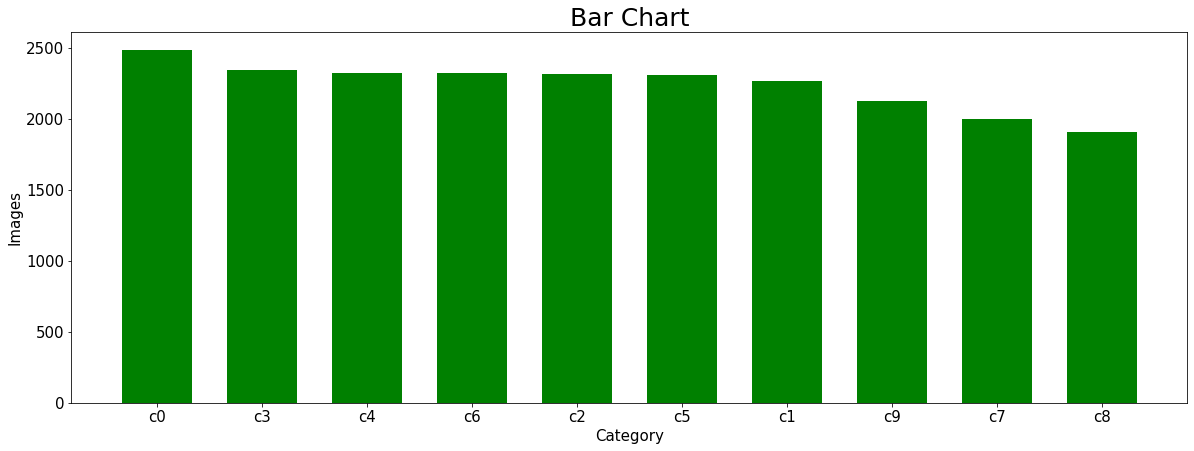

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

classes = driver_data['classname'].value_counts(sort=True)
labels = classes.index.tolist()
y = np.array(classes)
width = 1/1.5
N = len(y)
x = range(N)

fig = plt.figure(figsize=(20,15))
ay = fig.add_subplot(211)

plt.xticks(x, labels, size=15)
plt.yticks(size=15)

ay.bar(x, y, width, color="green")

plt.title('Bar Chart',size=25)
plt.xlabel('Category',size=15)
plt.ylabel('Images',size=15)

plt.show()

### Algorithms and Techniques

After analyzing the data and based on my learning from one of the earlier project about identifying the breed of the dog from the image, I believe that a CNN algorithm can help us get the good results for this problem.  We can also try to use the reansfer learning technique to our model. 

### Benchmark

For Benchmarking, our model can be compared against the top model from the [Public Leaderboard](https://www.kaggle.com/c/state-farm-distracted-driver-detection/leaderboard) for this competition. Our goal for this project would be to get into top top 50% of the public leaderboard.

<a id='step3'></a>
## Step 3: Methodology

In this section, we will pre-process the data for implementing the solution. Then we will develop our model.
Based on the results we may optimize the algorithm and fine tune the model to achieve expected results

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [5]:
from tensorflow.python.keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In the code cell below We will rescale the images by dividing every pixel in every image by 255.

In [6]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
#test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 4485/4485 [00:20<00:00, 220.78it/s]


### Implementation

### Create a CNN to predict the behavior of the driver (from Scratch)

In this step, we will create a CNN that predict the behavior of the dog.  



To architect a CNN model for image classification generally 3 basic steps are required - which is Convolution(creating or adding convolution layer to extract features from the input image), Pooling(performed to reduce the dimensionality of each feature map) and finally comes flattening to convert the matrix into a linear array for the purpose of feeding it as a input to the nodes of neural network.


In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)               

### Compile the Model

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the Model

In the code cell below, we will train our model using model checkpointing to save the model that attains the best validation loss.


In [8]:
from tensorflow.python.keras.callbacks import ModelCheckpoint  

epochs = 40

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=30, callbacks=[checkpointer], verbose=1)

Train on 17939 samples, validate on 4485 samples
Epoch 1/40
17910/17939 [============================>.] - ETA: 0s - loss: 2.3008 - accuracy: 0.1122
Epoch 00001: val_loss improved from inf to 2.29802, saving model to saved_models/weights.best.from_scratch.hdf5
17939/17939 [==============================] - 66s 4ms/sample - loss: 2.3008 - accuracy: 0.1122 - val_loss: 2.2980 - val_accuracy: 0.1135
Epoch 2/40
17910/17939 [============================>.] - ETA: 0s - loss: 2.2915 - accuracy: 0.1267
Epoch 00002: val_loss improved from 2.29802 to 2.28483, saving model to saved_models/weights.best.from_scratch.hdf5
17939/17939 [==============================] - 62s 3ms/sample - loss: 2.2915 - accuracy: 0.1268 - val_loss: 2.2848 - val_accuracy: 0.1128
Epoch 3/40
17910/17939 [============================>.] - ETA: 0s - loss: 2.2758 - accuracy: 0.1412
Epoch 00003: val_loss improved from 2.28483 to 2.27526, saving model to saved_models/weights.best.from_scratch.hdf5
17939/17939 [==================

### Load the Model with the Best Validation Loss

In [9]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out our model on the test dataset of driver images and make the predictions.

In [10]:
# get index of predicted behavior of the driver for each image in test set
driver_behavior_predictions = [model.predict(path_to_tensor(file).astype('float32')/255)[0] for file in tqdm(test_files)]


100%|██████████| 79726/79726 [3:38:52<00:00,  6.07it/s]    


### Create the prediction array.

In [11]:
test_files_names = [item_name[15:] for item_name in test_files]

predictions = np.column_stack((np.asarray(test_files_names), np.asarray(driver_behavior_predictions,dtype=np.float32)))

print(predictions[:20])

[['img_1.jpg' '0.11402403' '0.0078224735' '0.0035890867' '0.19863062'
  '0.23767951' '0.3799411' '0.0049114465' '0.00076625246' '0.0023899546'
  '0.05024558']
 ['img_10.jpg' '0.0020575158' '0.00042975493' '0.0886851' '0.0015423476'
  '0.0066707307' '0.87654' '0.003315933' '0.0029822043' '0.01446909'
  '0.0033072163']
 ['img_100.jpg' '0.24196304' '0.22115883' '0.0008192079' '0.47526452'
  '0.040150527' '5.587799e-05' '0.0022447945' '0.0014518363'
  '0.0001682109' '0.01672318']
 ['img_1000.jpg' '0.0045204232' '0.5877829' '0.0032005128' '0.022213658'
  '0.023396598' '3.8325055e-05' '0.1853934' '0.10024601' '0.038373746'
  '0.034834404']
 ['img_100000.jpg' '0.106197596' '0.062639646' '0.0024636711'
  '0.23225832' '0.4294789' '0.0078616915' '0.047895413' '0.001228099'
  '0.004936968' '0.1050398']
 ['img_100001.jpg' '0.42596167' '0.0060636727' '1.1817193e-11'
  '0.23199034' '0.00792352' '0.00011818644' '2.7737008e-06'
  '0.0001252083' '1.797448e-07' '0.32781452']
 ['img_100002.jpg' '0.030406

Create the csv file for the Kaggle submission.

In [12]:
np.savetxt('Submissions/submission1.csv',predictions, delimiter=',', comments='',  newline='\n', fmt='%s', header = 'img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9')

The first submission resulted in a public score of 1.96316 that would have ranked 1127 out of 1439 submissions on public leaderboard resulting in top 78%.

![Sample Image](Submissions/submission1.png)

### Refinement

### Train the CNN with the Transfer Learning

To reduce training time without sacrificing accuracy, we will train a CNN using transfer learning. 

In this section, we will import the pre-trained model VGG16 and use it.


In [7]:
from tensorflow.python.keras.applications.vgg16 import VGG16

#from tensorflow.python.keras.applications.resnet import ResNet50
#Resnet50_model = ResNet50(include_top = False, weights = 'imagenet')
#Resnet50_model.summary()

VGG16_model = VGG16(include_top=False, weights='imagenet')

VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Obtain Bottleneck Features

In this section, we will obtain the bottleneck features for the pre-trained VGG16 model.

In [9]:
#obtaining bottleneck features for the training data
VGG16_train_bottleneck_features = np.asarray([VGG16_model.predict(np.expand_dims(tensor, axis=0))[0] for tensor in tqdm(train_tensors)],dtype=np.float32)
np.save(open('bottleneck_features/VGG16_train_bottleneck_features.npy', 'wb'),VGG16_train_bottleneck_features)

#obtaining bottleneck features for the validation data
VGG16_valid_bottleneck_features = np.asarray([VGG16_model.predict(np.expand_dims(tensor, axis=0))[0] for tensor in tqdm(valid_tensors)],dtype=np.float32)
np.save(open('bottleneck_features/VGG16_valid_bottleneck_features.npy', 'wb'),VGG16_valid_bottleneck_features)




  5%|▍         | 886/17939 [00:39<11:42, 24.27it/s]


 10%|▉         | 1762/17939 [01:15<10:58, 24.58it/s]


 15%|█▍        | 2638/17939 [01:50<10:31, 24.23it/s]


 20%|█▉        | 3514/17939 [02:26<09:47, 24.57it/s]


 24%|██▍       | 4390/17939 [03:02<09:21, 24.15it/s]


 29%|██▉       | 5266/17939 [03:38<08:44, 24.17it/s]


 34%|███▍      | 6142/17939 [04:13<07:53, 24.93it/s]


 39%|███▉      | 7018/17939 [04:49<07:33, 24.08it/s]


 44%|████▍     | 7894/17939 [05:25<06:48, 24.61it/s]


 49%|████▉     | 8770/17939 [06:01<06:15, 24.42it/s]


 54%|█████▍    | 9646/17939 [06:36<05:32, 24.93it/s]


 59%|█████▊    | 10510/17939 [07:11<04:59, 24.81it/s]


 63%|██████▎   | 11368/17939 [07:46<04:23, 24.94it/s]


 68%|██████▊   | 12226/17939 [08:21<03:57, 24.07it/s]


 73%|███████▎  | 13084/17939 [08:56<03:17, 24.58it/s]


 78%|███████▊  | 13942/17939 [09:31<02:40, 24.89it/s]


 83%|████████▎ | 14800/17939 [10:06<02:07, 24.59it/s]


 87%|████████▋ | 15658/17939 [10:41<01:34, 24.17it/s]


 92%|█████████▏| 16516/17939 [11:16<00:57, 24.96it/s]


 97%|█████████▋| 17374/17939 [11:51<00:22, 24.63it/s]


100%|██████████| 17939/17939 [12:14<00:00, 24.42it/s]

  7%|▋         | 312/4485 [00:12<02:48, 24.81it/s]


 27%|██▋       | 1215/4485 [00:49<02:14, 24.31it/s]


 47%|████▋     | 2103/4485 [01:25<01:38, 24.22it/s]


 67%|██████▋   | 2991/4485 [02:01<01:01, 24.33it/s]


 86%|████████▋ | 3879/4485 [02:37<00:24, 24.25it/s]


100%|██████████| 4485/4485 [03:02<00:00, 24.55it/s]


In [12]:
#obtaining bottleneck features for the test data
VGG16_test_bottleneck_features = np.asarray([VGG16_model.predict(path_to_tensor(file).astype('float32')/255)[0] for file in tqdm(test_files)],dtype=np.float32)
np.save(open('bottleneck_features/VGG16_test_bottleneck_features.npy', 'wb'),VGG16_test_bottleneck_features)



  0%|          | 0/79726 [00:00<?, ?it/s]

  0%|          | 2/79726 [00:00<1:22:29, 16.11it/s]

  0%|          | 4/79726 [00:00<1:22:20, 16.14it/s]

  0%|          | 6/79726 [00:00<1:20:53, 16.42it/s]

  0%|          | 8/79726 [00:00<1:18:34, 16.91it/s]

  0%|          | 10/79726 [00:00<1:20:03, 16.59it/s]

  0%|          | 12/79726 [00:00<1:19:07, 16.79it/s]

  0%|          | 14/79726 [00:00<1:18:54, 16.84it/s]

  0%|          | 16/79726 [00:00<1:17:43, 17.09it/s]

  0%|          | 18/79726 [00:01<1:17:39, 17.11it/s]

  0%|          | 20/79726 [00:01<1:16:23, 17.39it/s]

  0%|          | 22/79726 [00:01<1:16:22, 17.39it/s]

  0%|          | 24/79726 [00:01<1:16:36, 17.34it/s]

  0%|          | 26/79726 [00:01<1:15:21, 17.63it/s]

  0%|          | 28/79726 [00:01<1:15:22, 17.62it/s]

  0%|          | 30/79726 [00:01<1:13:55, 17.97it/s]

  0%|          | 32/79726 [00:01<1:15:40, 17.55it/s]

  0%|          | 34/79726 [00:01<1:16:53, 17.27it/s]

  0%|          | 36/79726 [00:02<1:15:40,

  1%|          | 538/79726 [00:30<1:13:58, 17.84it/s]

  1%|          | 540/79726 [00:30<1:13:31, 17.95it/s]

  1%|          | 542/79726 [00:31<1:11:56, 18.35it/s]

  1%|          | 544/79726 [00:31<1:14:06, 17.81it/s]

  1%|          | 546/79726 [00:31<1:14:59, 17.60it/s]

  1%|          | 548/79726 [00:31<1:14:15, 17.77it/s]

  1%|          | 550/79726 [00:31<1:14:21, 17.74it/s]

  1%|          | 552/79726 [00:31<1:15:10, 17.55it/s]

  1%|          | 554/79726 [00:31<1:14:02, 17.82it/s]

  1%|          | 556/79726 [00:31<1:11:50, 18.37it/s]

  1%|          | 558/79726 [00:31<1:14:44, 17.65it/s]

  1%|          | 560/79726 [00:32<1:14:51, 17.63it/s]

  1%|          | 562/79726 [00:32<1:13:58, 17.83it/s]

  1%|          | 564/79726 [00:32<1:12:23, 18.23it/s]

  1%|          | 566/79726 [00:32<1:13:13, 18.02it/s]

  1%|          | 568/79726 [00:32<1:12:56, 18.09it/s]

  1%|          | 570/79726 [00:32<1:12:10, 18.28it/s]

  1%|          | 572/79726 [00:32<1:14:38, 17.68it/s]

  1%|     

  1%|▏         | 1080/79726 [01:00<1:09:46, 18.79it/s]

  1%|▏         | 1082/79726 [01:00<1:09:43, 18.80it/s]

  1%|▏         | 1084/79726 [01:01<1:09:08, 18.96it/s]

  1%|▏         | 1086/79726 [01:01<1:09:22, 18.89it/s]

  1%|▏         | 1088/79726 [01:01<1:08:14, 19.21it/s]

  1%|▏         | 1090/79726 [01:01<1:10:11, 18.67it/s]

  1%|▏         | 1092/79726 [01:01<1:10:23, 18.62it/s]

  1%|▏         | 1094/79726 [01:01<1:10:26, 18.60it/s]

  1%|▏         | 1096/79726 [01:01<1:09:00, 18.99it/s]

  1%|▏         | 1099/79726 [01:01<1:08:21, 19.17it/s]

  1%|▏         | 1101/79726 [01:01<1:08:49, 19.04it/s]

  1%|▏         | 1103/79726 [01:02<1:08:32, 19.12it/s]

  1%|▏         | 1105/79726 [01:02<1:08:55, 19.01it/s]

  1%|▏         | 1108/79726 [01:02<1:09:10, 18.94it/s]

  1%|▏         | 1110/79726 [01:02<1:09:43, 18.79it/s]

  1%|▏         | 1112/79726 [01:02<1:08:49, 19.04it/s]

  1%|▏         | 1114/79726 [01:02<1:08:31, 19.12it/s]

  1%|▏         | 1116/79726 [01:02<1:08:52, 19.0

  2%|▏         | 1620/79726 [01:30<1:14:30, 17.47it/s]

  2%|▏         | 1622/79726 [01:30<1:14:21, 17.51it/s]

  2%|▏         | 1624/79726 [01:30<1:13:16, 17.77it/s]

  2%|▏         | 1626/79726 [01:30<1:13:40, 17.67it/s]

  2%|▏         | 1628/79726 [01:30<1:14:21, 17.50it/s]

  2%|▏         | 1630/79726 [01:31<1:14:26, 17.48it/s]

  2%|▏         | 1632/79726 [01:31<1:13:31, 17.70it/s]

  2%|▏         | 1634/79726 [01:31<1:12:41, 17.90it/s]

  2%|▏         | 1636/79726 [01:31<1:11:31, 18.20it/s]

  2%|▏         | 1638/79726 [01:31<1:10:53, 18.36it/s]

  2%|▏         | 1640/79726 [01:31<1:10:10, 18.54it/s]

  2%|▏         | 1642/79726 [01:31<1:09:37, 18.69it/s]

  2%|▏         | 1645/79726 [01:31<1:08:16, 19.06it/s]

  2%|▏         | 1647/79726 [01:31<1:11:11, 18.28it/s]

  2%|▏         | 1649/79726 [01:32<1:10:02, 18.58it/s]

  2%|▏         | 1651/79726 [01:32<1:11:57, 18.08it/s]

  2%|▏         | 1653/79726 [01:32<1:11:39, 18.16it/s]

  2%|▏         | 1656/79726 [01:32<1:10:46, 18.3

  3%|▎         | 2160/79726 [01:59<1:08:57, 18.75it/s]

  3%|▎         | 2162/79726 [02:00<1:08:15, 18.94it/s]

  3%|▎         | 2165/79726 [02:00<1:07:00, 19.29it/s]

  3%|▎         | 2167/79726 [02:00<1:08:45, 18.80it/s]

  3%|▎         | 2169/79726 [02:00<1:08:53, 18.76it/s]

  3%|▎         | 2171/79726 [02:00<1:10:14, 18.40it/s]

  3%|▎         | 2173/79726 [02:00<1:10:09, 18.42it/s]

  3%|▎         | 2175/79726 [02:00<1:11:26, 18.09it/s]

  3%|▎         | 2177/79726 [02:00<1:10:42, 18.28it/s]

  3%|▎         | 2179/79726 [02:00<1:11:31, 18.07it/s]

  3%|▎         | 2181/79726 [02:01<1:10:57, 18.22it/s]

  3%|▎         | 2183/79726 [02:01<1:10:56, 18.22it/s]

  3%|▎         | 2185/79726 [02:01<1:12:51, 17.74it/s]

  3%|▎         | 2187/79726 [02:01<1:11:28, 18.08it/s]

  3%|▎         | 2189/79726 [02:01<1:09:56, 18.47it/s]

  3%|▎         | 2191/79726 [02:01<1:11:38, 18.04it/s]

  3%|▎         | 2193/79726 [02:01<1:11:55, 17.97it/s]

  3%|▎         | 2195/79726 [02:01<1:12:26, 17.8

  3%|▎         | 2701/79726 [02:29<1:07:06, 19.13it/s]

  3%|▎         | 2703/79726 [02:29<1:08:08, 18.84it/s]

  3%|▎         | 2705/79726 [02:29<1:08:15, 18.81it/s]

  3%|▎         | 2707/79726 [02:29<1:11:34, 17.94it/s]

  3%|▎         | 2709/79726 [02:29<1:10:50, 18.12it/s]

  3%|▎         | 2711/79726 [02:29<1:10:31, 18.20it/s]

  3%|▎         | 2713/79726 [02:29<1:09:17, 18.52it/s]

  3%|▎         | 2715/79726 [02:29<1:09:35, 18.44it/s]

  3%|▎         | 2717/79726 [02:29<1:09:53, 18.36it/s]

  3%|▎         | 2719/79726 [02:30<1:10:05, 18.31it/s]

  3%|▎         | 2721/79726 [02:30<1:09:32, 18.46it/s]

  3%|▎         | 2723/79726 [02:30<1:09:18, 18.52it/s]

  3%|▎         | 2725/79726 [02:30<1:08:53, 18.63it/s]

  3%|▎         | 2727/79726 [02:30<1:08:34, 18.72it/s]

  3%|▎         | 2729/79726 [02:30<1:08:09, 18.83it/s]

  3%|▎         | 2731/79726 [02:30<1:08:37, 18.70it/s]

  3%|▎         | 2733/79726 [02:30<1:09:32, 18.45it/s]

  3%|▎         | 2735/79726 [02:30<1:09:47, 18.3

  4%|▍         | 3246/79726 [02:58<1:11:22, 17.86it/s]

  4%|▍         | 3248/79726 [02:58<1:10:21, 18.11it/s]

  4%|▍         | 3250/79726 [02:58<1:10:25, 18.10it/s]

  4%|▍         | 3252/79726 [02:59<1:10:38, 18.04it/s]

  4%|▍         | 3254/79726 [02:59<1:10:25, 18.10it/s]

  4%|▍         | 3256/79726 [02:59<1:10:39, 18.04it/s]

  4%|▍         | 3258/79726 [02:59<1:10:14, 18.15it/s]

  4%|▍         | 3260/79726 [02:59<1:10:31, 18.07it/s]

  4%|▍         | 3262/79726 [02:59<1:10:44, 18.01it/s]

  4%|▍         | 3264/79726 [02:59<1:10:31, 18.07it/s]

  4%|▍         | 3266/79726 [02:59<1:10:24, 18.10it/s]

  4%|▍         | 3268/79726 [02:59<1:10:20, 18.11it/s]

  4%|▍         | 3270/79726 [03:00<1:10:12, 18.15it/s]

  4%|▍         | 3272/79726 [03:00<1:10:57, 17.96it/s]

  4%|▍         | 3274/79726 [03:00<1:11:49, 17.74it/s]

  4%|▍         | 3276/79726 [03:00<1:12:28, 17.58it/s]

  4%|▍         | 3278/79726 [03:00<1:10:35, 18.05it/s]

  4%|▍         | 3280/79726 [03:00<1:10:41, 18.0

  5%|▍         | 3792/79726 [03:28<1:11:46, 17.63it/s]

  5%|▍         | 3794/79726 [03:28<1:10:36, 17.92it/s]

  5%|▍         | 3796/79726 [03:28<1:10:37, 17.92it/s]

  5%|▍         | 3798/79726 [03:29<1:10:38, 17.91it/s]

  5%|▍         | 3800/79726 [03:29<1:10:33, 17.93it/s]

  5%|▍         | 3802/79726 [03:29<1:08:24, 18.50it/s]

  5%|▍         | 3804/79726 [03:29<1:09:52, 18.11it/s]

  5%|▍         | 3806/79726 [03:29<1:10:17, 18.00it/s]

  5%|▍         | 3808/79726 [03:29<1:10:24, 17.97it/s]

  5%|▍         | 3811/79726 [03:29<1:09:29, 18.21it/s]

  5%|▍         | 3813/79726 [03:29<1:07:38, 18.71it/s]

  5%|▍         | 3815/79726 [03:29<1:08:09, 18.56it/s]

  5%|▍         | 3817/79726 [03:30<1:08:13, 18.54it/s]

  5%|▍         | 3819/79726 [03:30<1:08:23, 18.50it/s]

  5%|▍         | 3821/79726 [03:30<1:08:30, 18.47it/s]

  5%|▍         | 3823/79726 [03:30<1:08:02, 18.59it/s]

  5%|▍         | 3825/79726 [03:30<1:09:09, 18.29it/s]

  5%|▍         | 3827/79726 [03:30<1:09:14, 18.2

  5%|▌         | 4325/79726 [03:57<1:08:09, 18.44it/s]

  5%|▌         | 4327/79726 [03:57<1:08:26, 18.36it/s]

  5%|▌         | 4329/79726 [03:57<1:08:24, 18.37it/s]

  5%|▌         | 4331/79726 [03:58<1:08:19, 18.39it/s]

  5%|▌         | 4333/79726 [03:58<1:08:58, 18.22it/s]

  5%|▌         | 4336/79726 [03:58<1:06:50, 18.80it/s]

  5%|▌         | 4338/79726 [03:58<1:07:31, 18.61it/s]

  5%|▌         | 4340/79726 [03:58<1:06:40, 18.84it/s]

  5%|▌         | 4342/79726 [03:58<1:06:36, 18.86it/s]

  5%|▌         | 4344/79726 [03:58<1:06:10, 18.99it/s]

  5%|▌         | 4346/79726 [03:58<1:06:30, 18.89it/s]

  5%|▌         | 4348/79726 [03:58<1:07:18, 18.66it/s]

  5%|▌         | 4350/79726 [03:59<1:05:59, 19.04it/s]

  5%|▌         | 4352/79726 [03:59<1:07:31, 18.60it/s]

  5%|▌         | 4355/79726 [03:59<1:06:57, 18.76it/s]

  5%|▌         | 4357/79726 [03:59<1:06:16, 18.95it/s]

  5%|▌         | 4359/79726 [03:59<1:06:42, 18.83it/s]

  5%|▌         | 4361/79726 [03:59<1:05:36, 19.1

  6%|▌         | 4868/79726 [04:27<1:07:48, 18.40it/s]

  6%|▌         | 4870/79726 [04:27<1:07:59, 18.35it/s]

  6%|▌         | 4872/79726 [04:27<1:08:18, 18.26it/s]

  6%|▌         | 4874/79726 [04:27<1:09:28, 17.96it/s]

  6%|▌         | 4876/79726 [04:27<1:08:47, 18.14it/s]

  6%|▌         | 4878/79726 [04:27<1:08:40, 18.17it/s]

  6%|▌         | 4880/79726 [04:27<1:07:37, 18.45it/s]

  6%|▌         | 4882/79726 [04:27<1:07:54, 18.37it/s]

  6%|▌         | 4884/79726 [04:28<1:08:11, 18.29it/s]

  6%|▌         | 4886/79726 [04:28<1:08:18, 18.26it/s]

  6%|▌         | 4888/79726 [04:28<1:08:22, 18.24it/s]

  6%|▌         | 4890/79726 [04:28<1:06:36, 18.73it/s]

  6%|▌         | 4892/79726 [04:28<1:09:04, 18.06it/s]

  6%|▌         | 4894/79726 [04:28<1:09:36, 17.92it/s]

  6%|▌         | 4896/79726 [04:28<1:10:23, 17.72it/s]

  6%|▌         | 4898/79726 [04:28<1:09:56, 17.83it/s]

  6%|▌         | 4900/79726 [04:28<1:12:46, 17.14it/s]

  6%|▌         | 4902/79726 [04:29<1:11:40, 17.4

  7%|▋         | 5409/79726 [04:56<1:08:23, 18.11it/s]

  7%|▋         | 5411/79726 [04:56<1:06:31, 18.62it/s]

  7%|▋         | 5413/79726 [04:56<1:06:32, 18.61it/s]

  7%|▋         | 5415/79726 [04:57<1:05:47, 18.82it/s]

  7%|▋         | 5417/79726 [04:57<1:07:33, 18.33it/s]

  7%|▋         | 5419/79726 [04:57<1:08:13, 18.15it/s]

  7%|▋         | 5421/79726 [04:57<1:07:05, 18.46it/s]

  7%|▋         | 5423/79726 [04:57<1:08:34, 18.06it/s]

  7%|▋         | 5425/79726 [04:57<1:08:08, 18.17it/s]

  7%|▋         | 5427/79726 [04:57<1:06:33, 18.60it/s]

  7%|▋         | 5429/79726 [04:57<1:08:57, 17.96it/s]

  7%|▋         | 5431/79726 [04:57<1:07:43, 18.28it/s]

  7%|▋         | 5433/79726 [04:58<1:07:13, 18.42it/s]

  7%|▋         | 5435/79726 [04:58<1:08:32, 18.06it/s]

  7%|▋         | 5437/79726 [04:58<1:08:52, 17.98it/s]

  7%|▋         | 5439/79726 [04:58<1:09:13, 17.89it/s]

  7%|▋         | 5441/79726 [04:58<1:08:48, 17.99it/s]

  7%|▋         | 5443/79726 [04:58<1:09:55, 17.7

  7%|▋         | 5954/79726 [05:26<1:07:45, 18.15it/s]

  7%|▋         | 5957/79726 [05:26<1:05:40, 18.72it/s]

  7%|▋         | 5959/79726 [05:26<1:06:29, 18.49it/s]

  7%|▋         | 5961/79726 [05:26<1:06:51, 18.39it/s]

  7%|▋         | 5963/79726 [05:26<1:06:16, 18.55it/s]

  7%|▋         | 5965/79726 [05:26<1:06:14, 18.56it/s]

  7%|▋         | 5967/79726 [05:26<1:05:51, 18.66it/s]

  7%|▋         | 5969/79726 [05:26<1:05:35, 18.74it/s]

  7%|▋         | 5971/79726 [05:26<1:05:35, 18.74it/s]

  7%|▋         | 5973/79726 [05:27<1:05:24, 18.79it/s]

  7%|▋         | 5975/79726 [05:27<1:05:49, 18.67it/s]

  7%|▋         | 5977/79726 [05:27<1:06:07, 18.59it/s]

  7%|▋         | 5979/79726 [05:27<1:06:03, 18.61it/s]

  8%|▊         | 5981/79726 [05:27<1:05:01, 18.90it/s]

  8%|▊         | 5983/79726 [05:27<1:05:03, 18.89it/s]

  8%|▊         | 5985/79726 [05:27<1:05:52, 18.66it/s]

  8%|▊         | 5987/79726 [05:27<1:08:14, 18.01it/s]

  8%|▊         | 5990/79726 [05:28<1:07:25, 18.2

  8%|▊         | 6515/79726 [05:55<1:03:02, 19.35it/s]

  8%|▊         | 6517/79726 [05:55<1:02:28, 19.53it/s]

  8%|▊         | 6519/79726 [05:56<1:03:18, 19.27it/s]

  8%|▊         | 6521/79726 [05:56<1:03:32, 19.20it/s]

  8%|▊         | 6523/79726 [05:56<1:02:58, 19.38it/s]

  8%|▊         | 6525/79726 [05:56<1:02:23, 19.55it/s]

  8%|▊         | 6527/79726 [05:56<1:03:47, 19.13it/s]

  8%|▊         | 6530/79726 [05:56<1:03:47, 19.12it/s]

  8%|▊         | 6532/79726 [05:56<1:03:42, 19.15it/s]

  8%|▊         | 6534/79726 [05:56<1:03:28, 19.22it/s]

  8%|▊         | 6536/79726 [05:56<1:03:35, 19.18it/s]

  8%|▊         | 6538/79726 [05:57<1:03:18, 19.27it/s]

  8%|▊         | 6540/79726 [05:57<1:03:28, 19.22it/s]

  8%|▊         | 6542/79726 [05:57<1:03:29, 19.21it/s]

  8%|▊         | 6545/79726 [05:57<1:03:28, 19.22it/s]

  8%|▊         | 6547/79726 [05:57<1:02:44, 19.44it/s]

  8%|▊         | 6549/79726 [05:57<1:04:59, 18.76it/s]

  8%|▊         | 6551/79726 [05:57<1:05:01, 18.7

  9%|▉         | 7062/79726 [06:25<1:09:14, 17.49it/s]

  9%|▉         | 7064/79726 [06:25<1:07:15, 18.00it/s]

  9%|▉         | 7066/79726 [06:25<1:07:06, 18.04it/s]

  9%|▉         | 7068/79726 [06:25<1:06:54, 18.10it/s]

  9%|▉         | 7070/79726 [06:25<1:05:02, 18.62it/s]

  9%|▉         | 7072/79726 [06:25<1:06:56, 18.09it/s]

  9%|▉         | 7074/79726 [06:25<1:05:05, 18.60it/s]

  9%|▉         | 7076/79726 [06:25<1:05:51, 18.38it/s]

  9%|▉         | 7078/79726 [06:25<1:06:04, 18.32it/s]

  9%|▉         | 7080/79726 [06:26<1:09:49, 17.34it/s]

  9%|▉         | 7082/79726 [06:26<1:08:51, 17.58it/s]

  9%|▉         | 7084/79726 [06:26<1:08:12, 17.75it/s]

  9%|▉         | 7086/79726 [06:26<1:07:44, 17.87it/s]

  9%|▉         | 7088/79726 [06:26<1:07:20, 17.98it/s]

  9%|▉         | 7090/79726 [06:26<1:10:44, 17.11it/s]

  9%|▉         | 7093/79726 [06:26<1:08:53, 17.57it/s]

  9%|▉         | 7095/79726 [06:26<1:06:22, 18.24it/s]

  9%|▉         | 7097/79726 [06:26<1:06:59, 18.0

 10%|▉         | 7604/79726 [06:54<1:10:47, 16.98it/s]

 10%|▉         | 7606/79726 [06:54<1:09:30, 17.29it/s]

 10%|▉         | 7608/79726 [06:54<1:07:22, 17.84it/s]

 10%|▉         | 7610/79726 [06:54<1:06:38, 18.04it/s]

 10%|▉         | 7612/79726 [06:54<1:06:16, 18.13it/s]

 10%|▉         | 7614/79726 [06:54<1:06:16, 18.13it/s]

 10%|▉         | 7616/79726 [06:55<1:05:51, 18.25it/s]

 10%|▉         | 7618/79726 [06:55<1:05:30, 18.34it/s]

 10%|▉         | 7620/79726 [06:55<1:06:53, 17.97it/s]

 10%|▉         | 7622/79726 [06:55<1:06:11, 18.15it/s]

 10%|▉         | 7624/79726 [06:55<1:04:21, 18.67it/s]

 10%|▉         | 7626/79726 [06:55<1:05:00, 18.49it/s]

 10%|▉         | 7628/79726 [06:55<1:03:53, 18.81it/s]

 10%|▉         | 7630/79726 [06:55<1:05:19, 18.40it/s]

 10%|▉         | 7632/79726 [06:55<1:04:52, 18.52it/s]

 10%|▉         | 7634/79726 [06:56<1:05:53, 18.23it/s]

 10%|▉         | 7636/79726 [06:56<1:06:47, 17.99it/s]

 10%|▉         | 7638/79726 [06:56<1:06:21, 18.1

 10%|█         | 8145/79726 [07:23<1:03:23, 18.82it/s]

 10%|█         | 8147/79726 [07:23<1:03:38, 18.75it/s]

 10%|█         | 8149/79726 [07:24<1:03:00, 18.94it/s]

 10%|█         | 8151/79726 [07:24<1:03:48, 18.70it/s]

 10%|█         | 8153/79726 [07:24<1:03:41, 18.73it/s]

 10%|█         | 8155/79726 [07:24<1:03:08, 18.89it/s]

 10%|█         | 8157/79726 [07:24<1:03:50, 18.68it/s]

 10%|█         | 8160/79726 [07:24<1:02:33, 19.07it/s]

 10%|█         | 8162/79726 [07:24<1:04:44, 18.42it/s]

 10%|█         | 8164/79726 [07:24<1:03:51, 18.68it/s]

 10%|█         | 8166/79726 [07:24<1:06:10, 18.02it/s]

 10%|█         | 8168/79726 [07:25<1:05:43, 18.15it/s]

 10%|█         | 8170/79726 [07:25<1:04:06, 18.60it/s]

 10%|█         | 8172/79726 [07:25<1:03:56, 18.65it/s]

 10%|█         | 8174/79726 [07:25<1:03:16, 18.85it/s]

 10%|█         | 8176/79726 [07:25<1:03:17, 18.84it/s]

 10%|█         | 8178/79726 [07:25<1:02:47, 18.99it/s]

 10%|█         | 8180/79726 [07:25<1:03:05, 18.9

 11%|█         | 8681/79726 [07:52<1:05:23, 18.11it/s]

 11%|█         | 8683/79726 [07:53<1:05:10, 18.17it/s]

 11%|█         | 8685/79726 [07:53<1:05:32, 18.06it/s]

 11%|█         | 8687/79726 [07:53<1:04:33, 18.34it/s]

 11%|█         | 8689/79726 [07:53<1:03:28, 18.65it/s]

 11%|█         | 8691/79726 [07:53<1:04:01, 18.49it/s]

 11%|█         | 8693/79726 [07:53<1:06:36, 17.77it/s]

 11%|█         | 8695/79726 [07:53<1:05:56, 17.96it/s]

 11%|█         | 8697/79726 [07:53<1:05:48, 17.99it/s]

 11%|█         | 8699/79726 [07:53<1:05:54, 17.96it/s]

 11%|█         | 8701/79726 [07:54<1:04:59, 18.21it/s]

 11%|█         | 8703/79726 [07:54<1:04:47, 18.27it/s]

 11%|█         | 8705/79726 [07:54<1:05:00, 18.21it/s]

 11%|█         | 8707/79726 [07:54<1:04:31, 18.34it/s]

 11%|█         | 8709/79726 [07:54<1:04:43, 18.29it/s]

 11%|█         | 8711/79726 [07:54<1:04:19, 18.40it/s]

 11%|█         | 8713/79726 [07:54<1:03:13, 18.72it/s]

 11%|█         | 8715/79726 [07:54<1:02:38, 18.8

 12%|█▏        | 9213/79726 [08:22<1:06:15, 17.73it/s]

 12%|█▏        | 9215/79726 [08:22<1:06:16, 17.73it/s]

 12%|█▏        | 9217/79726 [08:22<1:06:19, 17.72it/s]

 12%|█▏        | 9219/79726 [08:22<1:05:42, 17.89it/s]

 12%|█▏        | 9221/79726 [08:22<1:07:00, 17.54it/s]

 12%|█▏        | 9223/79726 [08:22<1:05:09, 18.03it/s]

 12%|█▏        | 9225/79726 [08:22<1:06:15, 17.73it/s]

 12%|█▏        | 9227/79726 [08:22<1:04:39, 18.17it/s]

 12%|█▏        | 9229/79726 [08:23<1:03:58, 18.37it/s]

 12%|█▏        | 9231/79726 [08:23<1:02:58, 18.66it/s]

 12%|█▏        | 9233/79726 [08:23<1:02:55, 18.67it/s]

 12%|█▏        | 9235/79726 [08:23<1:05:11, 18.02it/s]

 12%|█▏        | 9237/79726 [08:23<1:03:17, 18.56it/s]

 12%|█▏        | 9239/79726 [08:23<1:03:39, 18.45it/s]

 12%|█▏        | 9241/79726 [08:23<1:03:56, 18.37it/s]

 12%|█▏        | 9243/79726 [08:23<1:02:54, 18.67it/s]

 12%|█▏        | 9245/79726 [08:23<1:03:28, 18.51it/s]

 12%|█▏        | 9247/79726 [08:24<1:03:35, 18.4

 12%|█▏        | 9759/79726 [08:51<1:00:27, 19.29it/s]

 12%|█▏        | 9761/79726 [08:51<1:00:30, 19.27it/s]

 12%|█▏        | 9764/79726 [08:51<59:40, 19.54it/s]  

 12%|█▏        | 9766/79726 [08:51<1:01:05, 19.09it/s]

 12%|█▏        | 9768/79726 [08:51<1:00:32, 19.26it/s]

 12%|█▏        | 9770/79726 [08:51<1:01:09, 19.06it/s]

 12%|█▏        | 9772/79726 [08:51<1:00:29, 19.27it/s]

 12%|█▏        | 9774/79726 [08:52<59:54, 19.46it/s]  

 12%|█▏        | 9776/79726 [08:52<1:00:30, 19.27it/s]

 12%|█▏        | 9778/79726 [08:52<1:00:28, 19.28it/s]

 12%|█▏        | 9780/79726 [08:52<1:00:58, 19.12it/s]

 12%|█▏        | 9783/79726 [08:52<1:00:35, 19.24it/s]

 12%|█▏        | 9785/79726 [08:52<1:01:01, 19.10it/s]

 12%|█▏        | 9787/79726 [08:52<1:01:57, 18.81it/s]

 12%|█▏        | 9790/79726 [08:52<1:01:44, 18.88it/s]

 12%|█▏        | 9792/79726 [08:52<1:01:01, 19.10it/s]

 12%|█▏        | 9794/79726 [08:53<1:00:47, 19.17it/s]

 12%|█▏        | 9796/79726 [08:53<1:01:12, 19.0

 13%|█▎        | 10303/79726 [09:19<59:48, 19.35it/s]

 13%|█▎        | 10305/79726 [09:19<59:19, 19.50it/s]

 13%|█▎        | 10307/79726 [09:19<59:58, 19.29it/s]

 13%|█▎        | 10309/79726 [09:20<1:00:22, 19.16it/s]

 13%|█▎        | 10311/79726 [09:20<1:00:19, 19.18it/s]

 13%|█▎        | 10313/79726 [09:20<1:00:05, 19.25it/s]

 13%|█▎        | 10315/79726 [09:20<59:32, 19.43it/s]  

 13%|█▎        | 10317/79726 [09:20<1:02:36, 18.48it/s]

 13%|█▎        | 10319/79726 [09:20<1:02:09, 18.61it/s]

 13%|█▎        | 10321/79726 [09:20<1:01:30, 18.81it/s]

 13%|█▎        | 10323/79726 [09:20<1:01:34, 18.79it/s]

 13%|█▎        | 10325/79726 [09:20<1:01:26, 18.83it/s]

 13%|█▎        | 10327/79726 [09:21<1:01:06, 18.93it/s]

 13%|█▎        | 10329/79726 [09:21<1:01:59, 18.66it/s]

 13%|█▎        | 10331/79726 [09:21<1:01:43, 18.74it/s]

 13%|█▎        | 10333/79726 [09:21<1:01:04, 18.94it/s]

 13%|█▎        | 10335/79726 [09:21<1:00:41, 19.05it/s]

 13%|█▎        | 10337/79726 [09:21<1

 14%|█▎        | 10851/79726 [09:48<1:00:59, 18.82it/s]

 14%|█▎        | 10853/79726 [09:48<1:00:25, 19.00it/s]

 14%|█▎        | 10855/79726 [09:48<1:00:44, 18.90it/s]

 14%|█▎        | 10857/79726 [09:48<59:45, 19.21it/s]  

 14%|█▎        | 10859/79726 [09:49<1:00:41, 18.91it/s]

 14%|█▎        | 10861/79726 [09:49<1:02:05, 18.49it/s]

 14%|█▎        | 10863/79726 [09:49<1:02:15, 18.44it/s]

 14%|█▎        | 10865/79726 [09:49<1:01:36, 18.63it/s]

 14%|█▎        | 10867/79726 [09:49<1:00:42, 18.91it/s]

 14%|█▎        | 10869/79726 [09:49<1:01:27, 18.67it/s]

 14%|█▎        | 10871/79726 [09:49<1:02:17, 18.42it/s]

 14%|█▎        | 10873/79726 [09:49<1:00:51, 18.86it/s]

 14%|█▎        | 10875/79726 [09:49<1:01:41, 18.60it/s]

 14%|█▎        | 10877/79726 [09:49<1:01:49, 18.56it/s]

 14%|█▎        | 10879/79726 [09:50<1:02:49, 18.27it/s]

 14%|█▎        | 10881/79726 [09:50<1:01:57, 18.52it/s]

 14%|█▎        | 10883/79726 [09:50<1:00:38, 18.92it/s]

 14%|█▎        | 10885/79726 [0

 14%|█▍        | 11399/79726 [10:17<1:00:17, 18.89it/s]

 14%|█▍        | 11401/79726 [10:17<1:01:00, 18.67it/s]

 14%|█▍        | 11403/79726 [10:17<1:01:31, 18.51it/s]

 14%|█▍        | 11405/79726 [10:17<1:00:38, 18.78it/s]

 14%|█▍        | 11407/79726 [10:17<1:01:17, 18.58it/s]

 14%|█▍        | 11409/79726 [10:17<1:01:07, 18.63it/s]

 14%|█▍        | 11411/79726 [10:18<1:00:41, 18.76it/s]

 14%|█▍        | 11413/79726 [10:18<1:00:30, 18.82it/s]

 14%|█▍        | 11415/79726 [10:18<1:00:36, 18.78it/s]

 14%|█▍        | 11417/79726 [10:18<1:00:14, 18.90it/s]

 14%|█▍        | 11419/79726 [10:18<59:42, 19.07it/s]  

 14%|█▍        | 11421/79726 [10:18<59:30, 19.13it/s]

 14%|█▍        | 11423/79726 [10:18<59:32, 19.12it/s]

 14%|█▍        | 11425/79726 [10:18<1:00:45, 18.74it/s]

 14%|█▍        | 11427/79726 [10:18<1:00:55, 18.69it/s]

 14%|█▍        | 11429/79726 [10:18<1:00:20, 18.86it/s]

 14%|█▍        | 11431/79726 [10:19<1:00:07, 18.93it/s]

 14%|█▍        | 11433/79726 [10:19

 15%|█▍        | 11947/79726 [10:46<1:01:20, 18.41it/s]

 15%|█▍        | 11950/79726 [10:46<59:31, 18.98it/s]  

 15%|█▍        | 11952/79726 [10:46<59:49, 18.88it/s]

 15%|█▍        | 11954/79726 [10:46<59:43, 18.91it/s]

 15%|█▍        | 11956/79726 [10:46<59:53, 18.86it/s]

 15%|█▍        | 11958/79726 [10:46<1:00:00, 18.82it/s]

 15%|█▌        | 11960/79726 [10:46<1:01:05, 18.49it/s]

 15%|█▌        | 11962/79726 [10:47<1:01:41, 18.31it/s]

 15%|█▌        | 11964/79726 [10:47<1:02:06, 18.19it/s]

 15%|█▌        | 11966/79726 [10:47<1:01:32, 18.35it/s]

 15%|█▌        | 11968/79726 [10:47<1:00:20, 18.71it/s]

 15%|█▌        | 11971/79726 [10:47<59:19, 19.03it/s]  

 15%|█▌        | 11973/79726 [10:47<59:18, 19.04it/s]

 15%|█▌        | 11975/79726 [10:47<59:09, 19.09it/s]

 15%|█▌        | 11978/79726 [10:47<58:18, 19.36it/s]

 15%|█▌        | 11980/79726 [10:47<58:47, 19.21it/s]

 15%|█▌        | 11982/79726 [10:48<58:40, 19.24it/s]

 15%|█▌        | 11984/79726 [10:48<59:29, 18.9

 16%|█▌        | 12502/79726 [11:15<58:14, 19.24it/s]

 16%|█▌        | 12504/79726 [11:15<58:42, 19.09it/s]

 16%|█▌        | 12506/79726 [11:15<58:23, 19.18it/s]

 16%|█▌        | 12508/79726 [11:15<58:49, 19.04it/s]

 16%|█▌        | 12510/79726 [11:15<58:37, 19.11it/s]

 16%|█▌        | 12512/79726 [11:15<59:13, 18.91it/s]

 16%|█▌        | 12514/79726 [11:16<59:53, 18.70it/s]

 16%|█▌        | 12516/79726 [11:16<59:23, 18.86it/s]

 16%|█▌        | 12518/79726 [11:16<58:59, 18.99it/s]

 16%|█▌        | 12520/79726 [11:16<58:10, 19.25it/s]

 16%|█▌        | 12522/79726 [11:16<58:06, 19.27it/s]

 16%|█▌        | 12524/79726 [11:16<58:35, 19.12it/s]

 16%|█▌        | 12527/79726 [11:16<57:49, 19.37it/s]

 16%|█▌        | 12529/79726 [11:16<59:34, 18.80it/s]

 16%|█▌        | 12531/79726 [11:16<59:22, 18.86it/s]

 16%|█▌        | 12533/79726 [11:17<59:36, 18.79it/s]

 16%|█▌        | 12536/79726 [11:17<58:53, 19.02it/s]

 16%|█▌        | 12538/79726 [11:17<59:39, 18.77it/s]

 16%|█▌   

 16%|█▋        | 13054/79726 [11:44<57:55, 19.18it/s]

 16%|█▋        | 13056/79726 [11:44<57:49, 19.22it/s]

 16%|█▋        | 13058/79726 [11:44<58:09, 19.10it/s]

 16%|█▋        | 13060/79726 [11:44<57:59, 19.16it/s]

 16%|█▋        | 13062/79726 [11:44<1:00:36, 18.33it/s]

 16%|█▋        | 13065/79726 [11:45<59:06, 18.79it/s]  

 16%|█▋        | 13067/79726 [11:45<1:01:21, 18.11it/s]

 16%|█▋        | 13069/79726 [11:45<59:41, 18.61it/s]  

 16%|█▋        | 13071/79726 [11:45<59:24, 18.70it/s]

 16%|█▋        | 13073/79726 [11:45<58:49, 18.88it/s]

 16%|█▋        | 13076/79726 [11:45<57:52, 19.19it/s]

 16%|█▋        | 13078/79726 [11:45<58:44, 18.91it/s]

 16%|█▋        | 13080/79726 [11:45<59:27, 18.68it/s]

 16%|█▋        | 13082/79726 [11:45<59:24, 18.70it/s]

 16%|█▋        | 13084/79726 [11:46<58:44, 18.91it/s]

 16%|█▋        | 13086/79726 [11:46<58:54, 18.86it/s]

 16%|█▋        | 13088/79726 [11:46<58:29, 18.99it/s]

 16%|█▋        | 13090/79726 [11:46<57:40, 19.26it/s]

 1

 17%|█▋        | 13611/79726 [12:13<57:45, 19.08it/s]

 17%|█▋        | 13613/79726 [12:13<59:45, 18.44it/s]

 17%|█▋        | 13615/79726 [12:14<59:07, 18.64it/s]

 17%|█▋        | 13617/79726 [12:14<58:41, 18.77it/s]

 17%|█▋        | 13619/79726 [12:14<58:33, 18.82it/s]

 17%|█▋        | 13621/79726 [12:14<58:57, 18.69it/s]

 17%|█▋        | 13623/79726 [12:14<58:54, 18.70it/s]

 17%|█▋        | 13625/79726 [12:14<58:51, 18.72it/s]

 17%|█▋        | 13627/79726 [12:14<59:20, 18.57it/s]

 17%|█▋        | 13629/79726 [12:14<58:30, 18.83it/s]

 17%|█▋        | 13631/79726 [12:14<58:54, 18.70it/s]

 17%|█▋        | 13633/79726 [12:14<59:02, 18.66it/s]

 17%|█▋        | 13635/79726 [12:15<58:57, 18.68it/s]

 17%|█▋        | 13637/79726 [12:15<58:54, 18.70it/s]

 17%|█▋        | 13639/79726 [12:15<58:41, 18.77it/s]

 17%|█▋        | 13641/79726 [12:15<58:38, 18.78it/s]

 17%|█▋        | 13643/79726 [12:15<57:55, 19.02it/s]

 17%|█▋        | 13646/79726 [12:15<57:00, 19.32it/s]

 17%|█▋   

 18%|█▊        | 14170/79726 [12:43<58:06, 18.80it/s]

 18%|█▊        | 14172/79726 [12:43<58:09, 18.79it/s]

 18%|█▊        | 14174/79726 [12:43<58:21, 18.72it/s]

 18%|█▊        | 14176/79726 [12:43<58:59, 18.52it/s]

 18%|█▊        | 14178/79726 [12:43<58:15, 18.75it/s]

 18%|█▊        | 14180/79726 [12:43<57:46, 18.91it/s]

 18%|█▊        | 14182/79726 [12:43<58:18, 18.73it/s]

 18%|█▊        | 14185/79726 [12:43<57:15, 19.08it/s]

 18%|█▊        | 14187/79726 [12:44<57:36, 18.96it/s]

 18%|█▊        | 14189/79726 [12:44<57:18, 19.06it/s]

 18%|█▊        | 14192/79726 [12:44<56:14, 19.42it/s]

 18%|█▊        | 14194/79726 [12:44<57:10, 19.10it/s]

 18%|█▊        | 14196/79726 [12:44<58:01, 18.82it/s]

 18%|█▊        | 14198/79726 [12:44<58:35, 18.64it/s]

 18%|█▊        | 14200/79726 [12:44<57:56, 18.85it/s]

 18%|█▊        | 14202/79726 [12:44<58:02, 18.82it/s]

 18%|█▊        | 14204/79726 [12:44<57:31, 18.99it/s]

 18%|█▊        | 14206/79726 [12:45<56:45, 19.24it/s]

 18%|█▊   

 18%|█▊        | 14737/79726 [13:12<56:38, 19.12it/s]

 18%|█▊        | 14739/79726 [13:12<56:56, 19.02it/s]

 18%|█▊        | 14741/79726 [13:13<56:37, 19.13it/s]

 18%|█▊        | 14743/79726 [13:13<57:01, 18.99it/s]

 18%|█▊        | 14745/79726 [13:13<56:39, 19.11it/s]

 18%|█▊        | 14747/79726 [13:13<57:00, 18.99it/s]

 18%|█▊        | 14749/79726 [13:13<56:51, 19.05it/s]

 19%|█▊        | 14751/79726 [13:13<57:34, 18.81it/s]

 19%|█▊        | 14753/79726 [13:13<57:32, 18.82it/s]

 19%|█▊        | 14755/79726 [13:13<57:07, 18.96it/s]

 19%|█▊        | 14758/79726 [13:13<56:10, 19.28it/s]

 19%|█▊        | 14760/79726 [13:14<56:38, 19.11it/s]

 19%|█▊        | 14762/79726 [13:14<56:27, 19.18it/s]

 19%|█▊        | 14764/79726 [13:14<56:53, 19.03it/s]

 19%|█▊        | 14766/79726 [13:14<56:56, 19.01it/s]

 19%|█▊        | 14768/79726 [13:14<57:11, 18.93it/s]

 19%|█▊        | 14771/79726 [13:14<56:21, 19.21it/s]

 19%|█▊        | 14773/79726 [13:14<57:19, 18.88it/s]

 19%|█▊   

 19%|█▉        | 15303/79726 [13:42<57:04, 18.81it/s]

 19%|█▉        | 15306/79726 [13:42<56:01, 19.16it/s]

 19%|█▉        | 15308/79726 [13:42<56:35, 18.97it/s]

 19%|█▉        | 15310/79726 [13:42<55:58, 19.18it/s]

 19%|█▉        | 15312/79726 [13:42<57:34, 18.65it/s]

 19%|█▉        | 15314/79726 [13:43<57:19, 18.73it/s]

 19%|█▉        | 15316/79726 [13:43<56:59, 18.84it/s]

 19%|█▉        | 15318/79726 [13:43<56:54, 18.86it/s]

 19%|█▉        | 15320/79726 [13:43<56:41, 18.93it/s]

 19%|█▉        | 15322/79726 [13:43<56:23, 19.04it/s]

 19%|█▉        | 15324/79726 [13:43<56:12, 19.10it/s]

 19%|█▉        | 15326/79726 [13:43<55:46, 19.24it/s]

 19%|█▉        | 15328/79726 [13:43<56:09, 19.11it/s]

 19%|█▉        | 15331/79726 [13:43<55:15, 19.42it/s]

 19%|█▉        | 15333/79726 [13:44<56:23, 19.03it/s]

 19%|█▉        | 15335/79726 [13:44<55:41, 19.27it/s]

 19%|█▉        | 15337/79726 [13:44<56:05, 19.13it/s]

 19%|█▉        | 15339/79726 [13:44<56:13, 19.09it/s]

 19%|█▉   

 20%|█▉        | 15875/79726 [14:12<55:41, 19.11it/s]

 20%|█▉        | 15878/79726 [14:12<54:55, 19.38it/s]

 20%|█▉        | 15880/79726 [14:12<54:46, 19.43it/s]

 20%|█▉        | 15882/79726 [14:12<55:31, 19.16it/s]

 20%|█▉        | 15884/79726 [14:12<55:18, 19.24it/s]

 20%|█▉        | 15886/79726 [14:12<56:00, 19.00it/s]

 20%|█▉        | 15888/79726 [14:13<55:27, 19.19it/s]

 20%|█▉        | 15890/79726 [14:13<55:50, 19.05it/s]

 20%|█▉        | 15892/79726 [14:13<56:38, 18.78it/s]

 20%|█▉        | 15894/79726 [14:13<56:12, 18.93it/s]

 20%|█▉        | 15896/79726 [14:13<56:20, 18.88it/s]

 20%|█▉        | 15898/79726 [14:13<56:59, 18.67it/s]

 20%|█▉        | 15901/79726 [14:13<55:50, 19.05it/s]

 20%|█▉        | 15904/79726 [14:13<56:06, 18.96it/s]

 20%|█▉        | 15906/79726 [14:13<55:46, 19.07it/s]

 20%|█▉        | 15908/79726 [14:14<56:01, 18.98it/s]

 20%|█▉        | 15910/79726 [14:14<55:12, 19.27it/s]

 20%|█▉        | 15912/79726 [14:14<55:02, 19.32it/s]

 20%|█▉   

 21%|██        | 16432/79726 [14:41<56:26, 18.69it/s]

 21%|██        | 16435/79726 [14:42<55:44, 18.93it/s]

 21%|██        | 16437/79726 [14:42<56:41, 18.61it/s]

 21%|██        | 16439/79726 [14:42<57:11, 18.44it/s]

 21%|██        | 16441/79726 [14:42<57:23, 18.38it/s]

 21%|██        | 16443/79726 [14:42<57:03, 18.49it/s]

 21%|██        | 16445/79726 [14:42<57:27, 18.36it/s]

 21%|██        | 16447/79726 [14:42<57:05, 18.47it/s]

 21%|██        | 16449/79726 [14:42<57:57, 18.20it/s]

 21%|██        | 16451/79726 [14:42<57:41, 18.28it/s]

 21%|██        | 16453/79726 [14:43<58:13, 18.11it/s]

 21%|██        | 16455/79726 [14:43<57:01, 18.49it/s]

 21%|██        | 16457/79726 [14:43<56:43, 18.59it/s]

 21%|██        | 16459/79726 [14:43<56:06, 18.79it/s]

 21%|██        | 16461/79726 [14:43<56:41, 18.60it/s]

 21%|██        | 16463/79726 [14:43<56:59, 18.50it/s]

 21%|██        | 16465/79726 [14:43<56:48, 18.56it/s]

 21%|██        | 16467/79726 [14:43<56:10, 18.77it/s]

 21%|██   

 21%|██▏       | 16985/79726 [15:11<56:15, 18.59it/s]

 21%|██▏       | 16987/79726 [15:11<56:25, 18.53it/s]

 21%|██▏       | 16989/79726 [15:11<57:00, 18.34it/s]

 21%|██▏       | 16991/79726 [15:11<56:48, 18.41it/s]

 21%|██▏       | 16993/79726 [15:12<56:29, 18.51it/s]

 21%|██▏       | 16995/79726 [15:12<56:07, 18.63it/s]

 21%|██▏       | 16997/79726 [15:12<56:10, 18.61it/s]

 21%|██▏       | 16999/79726 [15:12<56:59, 18.34it/s]

 21%|██▏       | 17001/79726 [15:12<56:52, 18.38it/s]

 21%|██▏       | 17003/79726 [15:12<56:55, 18.36it/s]

 21%|██▏       | 17005/79726 [15:12<56:53, 18.37it/s]

 21%|██▏       | 17007/79726 [15:12<57:48, 18.08it/s]

 21%|██▏       | 17009/79726 [15:12<57:30, 18.18it/s]

 21%|██▏       | 17011/79726 [15:12<56:06, 18.63it/s]

 21%|██▏       | 17014/79726 [15:13<54:57, 19.02it/s]

 21%|██▏       | 17016/79726 [15:13<55:44, 18.75it/s]

 21%|██▏       | 17018/79726 [15:13<55:37, 18.79it/s]

 21%|██▏       | 17020/79726 [15:13<55:30, 18.83it/s]

 21%|██▏  

 22%|██▏       | 17540/79726 [15:40<53:01, 19.55it/s]

 22%|██▏       | 17542/79726 [15:40<53:37, 19.33it/s]

 22%|██▏       | 17544/79726 [15:40<53:37, 19.33it/s]

 22%|██▏       | 17546/79726 [15:41<54:50, 18.89it/s]

 22%|██▏       | 17548/79726 [15:41<55:14, 18.76it/s]

 22%|██▏       | 17550/79726 [15:41<54:18, 19.08it/s]

 22%|██▏       | 17552/79726 [15:41<55:31, 18.66it/s]

 22%|██▏       | 17554/79726 [15:41<54:50, 18.90it/s]

 22%|██▏       | 17556/79726 [15:41<54:30, 19.01it/s]

 22%|██▏       | 17558/79726 [15:41<54:35, 18.98it/s]

 22%|██▏       | 17560/79726 [15:41<54:19, 19.07it/s]

 22%|██▏       | 17562/79726 [15:41<55:05, 18.81it/s]

 22%|██▏       | 17564/79726 [15:41<54:49, 18.90it/s]

 22%|██▏       | 17566/79726 [15:42<54:44, 18.93it/s]

 22%|██▏       | 17568/79726 [15:42<54:12, 19.11it/s]

 22%|██▏       | 17570/79726 [15:42<54:12, 19.11it/s]

 22%|██▏       | 17572/79726 [15:42<54:02, 19.17it/s]

 22%|██▏       | 17574/79726 [15:42<54:55, 18.86it/s]

 22%|██▏  

 23%|██▎       | 18111/79726 [16:10<52:41, 19.49it/s]

 23%|██▎       | 18113/79726 [16:10<53:50, 19.07it/s]

 23%|██▎       | 18115/79726 [16:10<53:39, 19.13it/s]

 23%|██▎       | 18118/79726 [16:10<53:00, 19.37it/s]

 23%|██▎       | 18120/79726 [16:11<53:38, 19.14it/s]

 23%|██▎       | 18122/79726 [16:11<54:17, 18.91it/s]

 23%|██▎       | 18125/79726 [16:11<53:43, 19.11it/s]

 23%|██▎       | 18128/79726 [16:11<52:40, 19.49it/s]

 23%|██▎       | 18130/79726 [16:11<55:18, 18.56it/s]

 23%|██▎       | 18132/79726 [16:11<55:43, 18.42it/s]

 23%|██▎       | 18134/79726 [16:11<56:21, 18.21it/s]

 23%|██▎       | 18136/79726 [16:11<54:52, 18.71it/s]

 23%|██▎       | 18138/79726 [16:11<54:50, 18.71it/s]

 23%|██▎       | 18140/79726 [16:12<54:12, 18.94it/s]

 23%|██▎       | 18142/79726 [16:12<55:02, 18.65it/s]

 23%|██▎       | 18144/79726 [16:12<54:53, 18.70it/s]

 23%|██▎       | 18146/79726 [16:12<55:24, 18.52it/s]

 23%|██▎       | 18148/79726 [16:12<55:43, 18.42it/s]

 23%|██▎  

 23%|██▎       | 18667/79726 [16:40<54:13, 18.77it/s]

 23%|██▎       | 18669/79726 [16:40<53:52, 18.89it/s]

 23%|██▎       | 18671/79726 [16:40<53:05, 19.17it/s]

 23%|██▎       | 18673/79726 [16:40<53:48, 18.91it/s]

 23%|██▎       | 18675/79726 [16:40<54:15, 18.76it/s]

 23%|██▎       | 18677/79726 [16:40<54:45, 18.58it/s]

 23%|██▎       | 18679/79726 [16:40<54:36, 18.63it/s]

 23%|██▎       | 18681/79726 [16:40<54:48, 18.56it/s]

 23%|██▎       | 18683/79726 [16:40<55:07, 18.46it/s]

 23%|██▎       | 18685/79726 [16:41<55:19, 18.39it/s]

 23%|██▎       | 18687/79726 [16:41<54:33, 18.65it/s]

 23%|██▎       | 18689/79726 [16:41<55:25, 18.36it/s]

 23%|██▎       | 18691/79726 [16:41<55:05, 18.46it/s]

 23%|██▎       | 18693/79726 [16:41<54:21, 18.72it/s]

 23%|██▎       | 18695/79726 [16:41<54:15, 18.75it/s]

 23%|██▎       | 18697/79726 [16:41<53:57, 18.85it/s]

 23%|██▎       | 18699/79726 [16:41<53:44, 18.92it/s]

 23%|██▎       | 18701/79726 [16:41<53:53, 18.87it/s]

 23%|██▎  

 24%|██▍       | 19226/79726 [17:09<52:41, 19.13it/s]

 24%|██▍       | 19228/79726 [17:09<52:45, 19.11it/s]

 24%|██▍       | 19230/79726 [17:09<53:12, 18.95it/s]

 24%|██▍       | 19232/79726 [17:09<53:14, 18.94it/s]

 24%|██▍       | 19234/79726 [17:09<53:24, 18.88it/s]

 24%|██▍       | 19236/79726 [17:09<53:03, 19.00it/s]

 24%|██▍       | 19238/79726 [17:10<53:07, 18.97it/s]

 24%|██▍       | 19240/79726 [17:10<53:10, 18.96it/s]

 24%|██▍       | 19242/79726 [17:10<53:03, 19.00it/s]

 24%|██▍       | 19244/79726 [17:10<52:58, 19.03it/s]

 24%|██▍       | 19246/79726 [17:10<52:45, 19.10it/s]

 24%|██▍       | 19248/79726 [17:10<52:19, 19.26it/s]

 24%|██▍       | 19250/79726 [17:10<52:58, 19.02it/s]

 24%|██▍       | 19252/79726 [17:10<52:23, 19.24it/s]

 24%|██▍       | 19254/79726 [17:10<52:51, 19.07it/s]

 24%|██▍       | 19256/79726 [17:11<53:38, 18.79it/s]

 24%|██▍       | 19258/79726 [17:11<53:07, 18.97it/s]

 24%|██▍       | 19260/79726 [17:11<52:20, 19.26it/s]

 24%|██▍  

 25%|██▍       | 19792/79726 [17:39<51:43, 19.31it/s]

 25%|██▍       | 19794/79726 [17:39<52:04, 19.18it/s]

 25%|██▍       | 19796/79726 [17:39<52:36, 18.98it/s]

 25%|██▍       | 19798/79726 [17:39<52:30, 19.02it/s]

 25%|██▍       | 19801/79726 [17:39<51:29, 19.40it/s]

 25%|██▍       | 19803/79726 [17:39<53:00, 18.84it/s]

 25%|██▍       | 19806/79726 [17:39<52:05, 19.17it/s]

 25%|██▍       | 19808/79726 [17:39<53:00, 18.84it/s]

 25%|██▍       | 19811/79726 [17:40<52:05, 19.17it/s]

 25%|██▍       | 19813/79726 [17:40<52:22, 19.06it/s]

 25%|██▍       | 19815/79726 [17:40<52:09, 19.15it/s]

 25%|██▍       | 19817/79726 [17:40<52:28, 19.03it/s]

 25%|██▍       | 19819/79726 [17:40<53:12, 18.77it/s]

 25%|██▍       | 19821/79726 [17:40<52:33, 18.99it/s]

 25%|██▍       | 19823/79726 [17:40<51:57, 19.21it/s]

 25%|██▍       | 19825/79726 [17:40<52:47, 18.91it/s]

 25%|██▍       | 19827/79726 [17:40<51:56, 19.22it/s]

 25%|██▍       | 19829/79726 [17:40<52:19, 19.08it/s]

 25%|██▍  

 26%|██▌       | 20360/79726 [18:08<52:19, 18.91it/s]

 26%|██▌       | 20362/79726 [18:08<52:10, 18.96it/s]

 26%|██▌       | 20364/79726 [18:08<52:03, 19.00it/s]

 26%|██▌       | 20366/79726 [18:09<51:58, 19.03it/s]

 26%|██▌       | 20368/79726 [18:09<52:13, 18.94it/s]

 26%|██▌       | 20370/79726 [18:09<52:19, 18.91it/s]

 26%|██▌       | 20372/79726 [18:09<52:45, 18.75it/s]

 26%|██▌       | 20374/79726 [18:09<53:03, 18.64it/s]

 26%|██▌       | 20376/79726 [18:09<53:07, 18.62it/s]

 26%|██▌       | 20378/79726 [18:09<53:32, 18.47it/s]

 26%|██▌       | 20380/79726 [18:09<53:22, 18.53it/s]

 26%|██▌       | 20382/79726 [18:09<53:11, 18.60it/s]

 26%|██▌       | 20384/79726 [18:10<52:42, 18.77it/s]

 26%|██▌       | 20386/79726 [18:10<52:04, 18.99it/s]

 26%|██▌       | 20388/79726 [18:10<52:09, 18.96it/s]

 26%|██▌       | 20390/79726 [18:10<51:48, 19.09it/s]

 26%|██▌       | 20392/79726 [18:10<51:58, 19.03it/s]

 26%|██▌       | 20394/79726 [18:10<51:30, 19.20it/s]

 26%|██▌  

 26%|██▌       | 20908/79726 [18:37<52:04, 18.83it/s]

 26%|██▌       | 20910/79726 [18:38<51:51, 18.90it/s]

 26%|██▌       | 20912/79726 [18:38<51:23, 19.08it/s]

 26%|██▌       | 20914/79726 [18:38<51:42, 18.96it/s]

 26%|██▌       | 20916/79726 [18:38<51:27, 19.05it/s]

 26%|██▌       | 20918/79726 [18:38<50:44, 19.32it/s]

 26%|██▌       | 20920/79726 [18:38<52:13, 18.77it/s]

 26%|██▌       | 20922/79726 [18:38<52:41, 18.60it/s]

 26%|██▌       | 20924/79726 [18:38<52:25, 18.70it/s]

 26%|██▌       | 20926/79726 [18:38<52:40, 18.61it/s]

 26%|██▌       | 20928/79726 [18:38<52:33, 18.64it/s]

 26%|██▋       | 20930/79726 [18:39<51:44, 18.94it/s]

 26%|██▋       | 20932/79726 [18:39<51:58, 18.86it/s]

 26%|██▋       | 20934/79726 [18:39<52:55, 18.51it/s]

 26%|██▋       | 20936/79726 [18:39<52:52, 18.53it/s]

 26%|██▋       | 20938/79726 [18:39<52:46, 18.57it/s]

 26%|██▋       | 20940/79726 [18:39<52:27, 18.68it/s]

 26%|██▋       | 20942/79726 [18:39<51:53, 18.88it/s]

 26%|██▋  

 27%|██▋       | 21484/79726 [19:08<49:54, 19.45it/s]

 27%|██▋       | 21486/79726 [19:08<50:56, 19.06it/s]

 27%|██▋       | 21488/79726 [19:08<50:45, 19.13it/s]

 27%|██▋       | 21490/79726 [19:08<51:01, 19.02it/s]

 27%|██▋       | 21492/79726 [19:08<50:44, 19.13it/s]

 27%|██▋       | 21495/79726 [19:08<49:52, 19.46it/s]

 27%|██▋       | 21497/79726 [19:08<50:41, 19.15it/s]

 27%|██▋       | 21499/79726 [19:08<50:37, 19.17it/s]

 27%|██▋       | 21501/79726 [19:08<50:55, 19.05it/s]

 27%|██▋       | 21503/79726 [19:09<50:43, 19.13it/s]

 27%|██▋       | 21506/79726 [19:09<49:40, 19.54it/s]

 27%|██▋       | 21508/79726 [19:09<50:48, 19.10it/s]

 27%|██▋       | 21510/79726 [19:09<50:47, 19.10it/s]

 27%|██▋       | 21512/79726 [19:09<50:41, 19.14it/s]

 27%|██▋       | 21514/79726 [19:09<50:02, 19.39it/s]

 27%|██▋       | 21516/79726 [19:09<50:14, 19.31it/s]

 27%|██▋       | 21518/79726 [19:09<49:44, 19.50it/s]

 27%|██▋       | 21520/79726 [19:09<50:19, 19.28it/s]

 27%|██▋  

 28%|██▊       | 22045/79726 [19:37<49:44, 19.33it/s]

 28%|██▊       | 22047/79726 [19:37<50:03, 19.20it/s]

 28%|██▊       | 22049/79726 [19:37<49:59, 19.23it/s]

 28%|██▊       | 22051/79726 [19:37<49:48, 19.30it/s]

 28%|██▊       | 22053/79726 [19:37<50:06, 19.18it/s]

 28%|██▊       | 22055/79726 [19:37<50:10, 19.16it/s]

 28%|██▊       | 22057/79726 [19:38<50:26, 19.05it/s]

 28%|██▊       | 22059/79726 [19:38<50:06, 19.18it/s]

 28%|██▊       | 22061/79726 [19:38<50:19, 19.10it/s]

 28%|██▊       | 22063/79726 [19:38<50:10, 19.15it/s]

 28%|██▊       | 22065/79726 [19:38<49:56, 19.25it/s]

 28%|██▊       | 22067/79726 [19:38<50:01, 19.21it/s]

 28%|██▊       | 22070/79726 [19:38<49:25, 19.44it/s]

 28%|██▊       | 22072/79726 [19:38<50:16, 19.11it/s]

 28%|██▊       | 22074/79726 [19:38<50:35, 18.99it/s]

 28%|██▊       | 22076/79726 [19:39<50:13, 19.13it/s]

 28%|██▊       | 22078/79726 [19:39<50:15, 19.12it/s]

 28%|██▊       | 22080/79726 [19:39<50:25, 19.06it/s]

 28%|██▊  

 28%|██▊       | 22601/79726 [20:06<49:55, 19.07it/s]

 28%|██▊       | 22603/79726 [20:06<50:09, 18.98it/s]

 28%|██▊       | 22606/79726 [20:07<49:41, 19.16it/s]

 28%|██▊       | 22609/79726 [20:07<49:13, 19.34it/s]

 28%|██▊       | 22611/79726 [20:07<49:57, 19.05it/s]

 28%|██▊       | 22613/79726 [20:07<49:16, 19.32it/s]

 28%|██▊       | 22615/79726 [20:07<50:19, 18.92it/s]

 28%|██▊       | 22617/79726 [20:07<49:37, 19.18it/s]

 28%|██▊       | 22619/79726 [20:07<49:52, 19.08it/s]

 28%|██▊       | 22621/79726 [20:07<49:40, 19.16it/s]

 28%|██▊       | 22623/79726 [20:07<49:59, 19.04it/s]

 28%|██▊       | 22625/79726 [20:08<49:43, 19.14it/s]

 28%|██▊       | 22627/79726 [20:08<50:04, 19.00it/s]

 28%|██▊       | 22630/79726 [20:08<49:40, 19.15it/s]

 28%|██▊       | 22632/79726 [20:08<50:12, 18.95it/s]

 28%|██▊       | 22634/79726 [20:08<49:27, 19.24it/s]

 28%|██▊       | 22636/79726 [20:08<50:16, 18.93it/s]

 28%|██▊       | 22638/79726 [20:08<49:51, 19.08it/s]

 28%|██▊  

 29%|██▉       | 23162/79726 [20:36<49:34, 19.02it/s]

 29%|██▉       | 23164/79726 [20:36<50:05, 18.82it/s]

 29%|██▉       | 23166/79726 [20:36<50:43, 18.58it/s]

 29%|██▉       | 23168/79726 [20:36<51:05, 18.45it/s]

 29%|██▉       | 23170/79726 [20:36<50:54, 18.51it/s]

 29%|██▉       | 23172/79726 [20:36<51:17, 18.38it/s]

 29%|██▉       | 23174/79726 [20:36<50:59, 18.49it/s]

 29%|██▉       | 23176/79726 [20:37<50:38, 18.61it/s]

 29%|██▉       | 23178/79726 [20:37<50:40, 18.60it/s]

 29%|██▉       | 23180/79726 [20:37<50:37, 18.62it/s]

 29%|██▉       | 23182/79726 [20:37<51:13, 18.40it/s]

 29%|██▉       | 23184/79726 [20:37<50:26, 18.68it/s]

 29%|██▉       | 23186/79726 [20:37<50:40, 18.59it/s]

 29%|██▉       | 23188/79726 [20:37<51:24, 18.33it/s]

 29%|██▉       | 23190/79726 [20:37<51:37, 18.25it/s]

 29%|██▉       | 23192/79726 [20:37<52:07, 18.08it/s]

 29%|██▉       | 23194/79726 [20:38<52:19, 18.00it/s]

 29%|██▉       | 23196/79726 [20:38<52:35, 17.92it/s]

 29%|██▉  

 30%|██▉       | 23716/79726 [21:05<48:55, 19.08it/s]

 30%|██▉       | 23718/79726 [21:05<48:45, 19.14it/s]

 30%|██▉       | 23720/79726 [21:05<48:49, 19.12it/s]

 30%|██▉       | 23722/79726 [21:05<49:06, 19.00it/s]

 30%|██▉       | 23724/79726 [21:06<48:45, 19.14it/s]

 30%|██▉       | 23726/79726 [21:06<48:43, 19.15it/s]

 30%|██▉       | 23728/79726 [21:06<49:31, 18.84it/s]

 30%|██▉       | 23730/79726 [21:06<49:09, 18.98it/s]

 30%|██▉       | 23732/79726 [21:06<48:34, 19.21it/s]

 30%|██▉       | 23734/79726 [21:06<48:48, 19.12it/s]

 30%|██▉       | 23736/79726 [21:06<49:30, 18.85it/s]

 30%|██▉       | 23738/79726 [21:06<49:35, 18.82it/s]

 30%|██▉       | 23740/79726 [21:06<49:32, 18.83it/s]

 30%|██▉       | 23742/79726 [21:06<49:42, 18.77it/s]

 30%|██▉       | 23745/79726 [21:07<49:01, 19.03it/s]

 30%|██▉       | 23747/79726 [21:07<48:20, 19.30it/s]

 30%|██▉       | 23749/79726 [21:07<49:28, 18.86it/s]

 30%|██▉       | 23751/79726 [21:07<49:25, 18.88it/s]

 30%|██▉  

 30%|███       | 24269/79726 [21:34<49:10, 18.80it/s]

 30%|███       | 24271/79726 [21:35<48:56, 18.89it/s]

 30%|███       | 24273/79726 [21:35<49:11, 18.79it/s]

 30%|███       | 24275/79726 [21:35<49:38, 18.62it/s]

 30%|███       | 24277/79726 [21:35<48:40, 18.98it/s]

 30%|███       | 24279/79726 [21:35<48:49, 18.93it/s]

 30%|███       | 24281/79726 [21:35<48:25, 19.08it/s]

 30%|███       | 24283/79726 [21:35<48:41, 18.98it/s]

 30%|███       | 24285/79726 [21:35<49:19, 18.73it/s]

 30%|███       | 24287/79726 [21:35<49:46, 18.56it/s]

 30%|███       | 24289/79726 [21:36<49:16, 18.75it/s]

 30%|███       | 24291/79726 [21:36<49:41, 18.59it/s]

 30%|███       | 24293/79726 [21:36<52:05, 17.74it/s]

 30%|███       | 24295/79726 [21:36<51:10, 18.05it/s]

 30%|███       | 24297/79726 [21:36<50:20, 18.35it/s]

 30%|███       | 24299/79726 [21:36<50:26, 18.31it/s]

 30%|███       | 24301/79726 [21:36<50:13, 18.39it/s]

 30%|███       | 24303/79726 [21:36<50:21, 18.34it/s]

 30%|███  

 31%|███       | 24823/79726 [22:04<49:15, 18.58it/s]

 31%|███       | 24825/79726 [22:04<48:38, 18.81it/s]

 31%|███       | 24827/79726 [22:04<48:42, 18.78it/s]

 31%|███       | 24829/79726 [22:04<48:14, 18.97it/s]

 31%|███       | 24831/79726 [22:05<47:34, 19.23it/s]

 31%|███       | 24833/79726 [22:05<47:55, 19.09it/s]

 31%|███       | 24835/79726 [22:05<47:38, 19.20it/s]

 31%|███       | 24837/79726 [22:05<48:28, 18.87it/s]

 31%|███       | 24839/79726 [22:05<48:20, 18.92it/s]

 31%|███       | 24841/79726 [22:05<47:37, 19.21it/s]

 31%|███       | 24843/79726 [22:05<48:09, 19.00it/s]

 31%|███       | 24845/79726 [22:05<48:04, 19.03it/s]

 31%|███       | 24847/79726 [22:05<48:00, 19.05it/s]

 31%|███       | 24849/79726 [22:05<47:42, 19.17it/s]

 31%|███       | 24851/79726 [22:06<47:17, 19.34it/s]

 31%|███       | 24853/79726 [22:06<47:28, 19.27it/s]

 31%|███       | 24855/79726 [22:06<47:38, 19.20it/s]

 31%|███       | 24857/79726 [22:06<48:07, 19.00it/s]

 31%|███  

 32%|███▏      | 25387/79726 [22:34<48:39, 18.62it/s]

 32%|███▏      | 25389/79726 [22:34<48:33, 18.65it/s]

 32%|███▏      | 25391/79726 [22:34<49:05, 18.45it/s]

 32%|███▏      | 25393/79726 [22:34<49:11, 18.41it/s]

 32%|███▏      | 25395/79726 [22:34<50:13, 18.03it/s]

 32%|███▏      | 25397/79726 [22:34<50:11, 18.04it/s]

 32%|███▏      | 25399/79726 [22:34<49:37, 18.25it/s]

 32%|███▏      | 25401/79726 [22:34<49:46, 18.19it/s]

 32%|███▏      | 25403/79726 [22:35<49:19, 18.35it/s]

 32%|███▏      | 25405/79726 [22:35<49:25, 18.32it/s]

 32%|███▏      | 25407/79726 [22:35<49:21, 18.34it/s]

 32%|███▏      | 25409/79726 [22:35<49:47, 18.18it/s]

 32%|███▏      | 25411/79726 [22:35<49:33, 18.27it/s]

 32%|███▏      | 25413/79726 [22:35<49:26, 18.31it/s]

 32%|███▏      | 25415/79726 [22:35<49:14, 18.38it/s]

 32%|███▏      | 25417/79726 [22:35<49:25, 18.32it/s]

 32%|███▏      | 25419/79726 [22:35<48:56, 18.49it/s]

 32%|███▏      | 25421/79726 [22:35<49:01, 18.46it/s]

 32%|███▏ 

 33%|███▎      | 25942/79726 [23:03<47:22, 18.92it/s]

 33%|███▎      | 25944/79726 [23:03<46:37, 19.23it/s]

 33%|███▎      | 25947/79726 [23:03<46:24, 19.31it/s]

 33%|███▎      | 25949/79726 [23:03<46:43, 19.18it/s]

 33%|███▎      | 25951/79726 [23:03<47:13, 18.98it/s]

 33%|███▎      | 25953/79726 [23:03<46:54, 19.10it/s]

 33%|███▎      | 25955/79726 [23:04<46:25, 19.30it/s]

 33%|███▎      | 25957/79726 [23:04<47:37, 18.82it/s]

 33%|███▎      | 25959/79726 [23:04<47:29, 18.87it/s]

 33%|███▎      | 25961/79726 [23:04<47:08, 19.01it/s]

 33%|███▎      | 25963/79726 [23:04<47:18, 18.94it/s]

 33%|███▎      | 25965/79726 [23:04<49:44, 18.01it/s]

 33%|███▎      | 25967/79726 [23:04<49:08, 18.23it/s]

 33%|███▎      | 25969/79726 [23:04<48:04, 18.64it/s]

 33%|███▎      | 25971/79726 [23:04<48:39, 18.41it/s]

 33%|███▎      | 25973/79726 [23:05<48:20, 18.53it/s]

 33%|███▎      | 25975/79726 [23:05<48:39, 18.41it/s]

 33%|███▎      | 25977/79726 [23:05<47:53, 18.71it/s]

 33%|███▎ 

 33%|███▎      | 26504/79726 [23:32<45:54, 19.32it/s]

 33%|███▎      | 26506/79726 [23:32<45:26, 19.52it/s]

 33%|███▎      | 26508/79726 [23:33<46:01, 19.27it/s]

 33%|███▎      | 26510/79726 [23:33<46:47, 18.95it/s]

 33%|███▎      | 26512/79726 [23:33<46:30, 19.07it/s]

 33%|███▎      | 26514/79726 [23:33<46:49, 18.94it/s]

 33%|███▎      | 26516/79726 [23:33<47:25, 18.70it/s]

 33%|███▎      | 26518/79726 [23:33<46:30, 19.07it/s]

 33%|███▎      | 26520/79726 [23:33<47:09, 18.80it/s]

 33%|███▎      | 26522/79726 [23:33<47:37, 18.62it/s]

 33%|███▎      | 26524/79726 [23:33<47:55, 18.50it/s]

 33%|███▎      | 26526/79726 [23:34<48:15, 18.38it/s]

 33%|███▎      | 26528/79726 [23:34<48:48, 18.16it/s]

 33%|███▎      | 26531/79726 [23:34<47:28, 18.68it/s]

 33%|███▎      | 26533/79726 [23:34<47:22, 18.71it/s]

 33%|███▎      | 26535/79726 [23:34<46:54, 18.90it/s]

 33%|███▎      | 26537/79726 [23:34<46:42, 18.98it/s]

 33%|███▎      | 26539/79726 [23:34<46:38, 19.00it/s]

 33%|███▎ 

 34%|███▍      | 27057/79726 [24:02<45:50, 19.15it/s]

 34%|███▍      | 27059/79726 [24:02<45:52, 19.14it/s]

 34%|███▍      | 27061/79726 [24:02<46:06, 19.04it/s]

 34%|███▍      | 27063/79726 [24:02<45:55, 19.11it/s]

 34%|███▍      | 27066/79726 [24:02<45:10, 19.43it/s]

 34%|███▍      | 27068/79726 [24:02<46:03, 19.06it/s]

 34%|███▍      | 27070/79726 [24:02<46:28, 18.88it/s]

 34%|███▍      | 27072/79726 [24:02<46:36, 18.83it/s]

 34%|███▍      | 27074/79726 [24:03<45:59, 19.08it/s]

 34%|███▍      | 27076/79726 [24:03<46:40, 18.80it/s]

 34%|███▍      | 27078/79726 [24:03<46:37, 18.82it/s]

 34%|███▍      | 27080/79726 [24:03<48:55, 17.94it/s]

 34%|███▍      | 27082/79726 [24:03<47:58, 18.29it/s]

 34%|███▍      | 27084/79726 [24:03<47:32, 18.45it/s]

 34%|███▍      | 27086/79726 [24:03<47:32, 18.45it/s]

 34%|███▍      | 27088/79726 [24:03<47:19, 18.54it/s]

 34%|███▍      | 27090/79726 [24:03<47:09, 18.60it/s]

 34%|███▍      | 27092/79726 [24:03<47:27, 18.49it/s]

 34%|███▍ 

 35%|███▍      | 27613/79726 [24:31<46:19, 18.75it/s]

 35%|███▍      | 27615/79726 [24:31<46:04, 18.85it/s]

 35%|███▍      | 27617/79726 [24:31<45:59, 18.89it/s]

 35%|███▍      | 27619/79726 [24:31<45:57, 18.90it/s]

 35%|███▍      | 27621/79726 [24:31<46:04, 18.85it/s]

 35%|███▍      | 27623/79726 [24:32<46:28, 18.69it/s]

 35%|███▍      | 27625/79726 [24:32<46:45, 18.57it/s]

 35%|███▍      | 27627/79726 [24:32<47:24, 18.32it/s]

 35%|███▍      | 27629/79726 [24:32<47:12, 18.39it/s]

 35%|███▍      | 27631/79726 [24:32<47:04, 18.44it/s]

 35%|███▍      | 27633/79726 [24:32<46:59, 18.48it/s]

 35%|███▍      | 27635/79726 [24:32<46:47, 18.56it/s]

 35%|███▍      | 27637/79726 [24:32<46:30, 18.67it/s]

 35%|███▍      | 27639/79726 [24:32<47:37, 18.23it/s]

 35%|███▍      | 27641/79726 [24:33<46:50, 18.53it/s]

 35%|███▍      | 27643/79726 [24:33<46:17, 18.75it/s]

 35%|███▍      | 27645/79726 [24:33<46:02, 18.85it/s]

 35%|███▍      | 27647/79726 [24:33<45:48, 18.95it/s]

 35%|███▍ 

 35%|███▌      | 28175/79726 [25:01<44:05, 19.49it/s]

 35%|███▌      | 28177/79726 [25:01<44:41, 19.23it/s]

 35%|███▌      | 28179/79726 [25:01<44:36, 19.26it/s]

 35%|███▌      | 28181/79726 [25:01<44:54, 19.13it/s]

 35%|███▌      | 28183/79726 [25:01<44:49, 19.16it/s]

 35%|███▌      | 28185/79726 [25:01<45:04, 19.06it/s]

 35%|███▌      | 28187/79726 [25:01<45:12, 19.00it/s]

 35%|███▌      | 28189/79726 [25:01<45:02, 19.07it/s]

 35%|███▌      | 28191/79726 [25:01<44:50, 19.16it/s]

 35%|███▌      | 28193/79726 [25:02<45:06, 19.04it/s]

 35%|███▌      | 28195/79726 [25:02<45:10, 19.01it/s]

 35%|███▌      | 28197/79726 [25:02<45:06, 19.04it/s]

 35%|███▌      | 28199/79726 [25:02<44:53, 19.13it/s]

 35%|███▌      | 28201/79726 [25:02<45:07, 19.03it/s]

 35%|███▌      | 28203/79726 [25:02<44:58, 19.09it/s]

 35%|███▌      | 28205/79726 [25:02<44:26, 19.32it/s]

 35%|███▌      | 28207/79726 [25:02<44:46, 19.18it/s]

 35%|███▌      | 28209/79726 [25:02<44:33, 19.27it/s]

 35%|███▌ 

 36%|███▌      | 28731/79726 [25:30<43:35, 19.50it/s]

 36%|███▌      | 28734/79726 [25:30<43:17, 19.63it/s]

 36%|███▌      | 28736/79726 [25:30<43:47, 19.40it/s]

 36%|███▌      | 28738/79726 [25:30<43:53, 19.36it/s]

 36%|███▌      | 28740/79726 [25:30<44:43, 19.00it/s]

 36%|███▌      | 28742/79726 [25:30<45:17, 18.76it/s]

 36%|███▌      | 28744/79726 [25:30<45:29, 18.68it/s]

 36%|███▌      | 28746/79726 [25:31<44:50, 18.95it/s]

 36%|███▌      | 28749/79726 [25:31<43:50, 19.38it/s]

 36%|███▌      | 28751/79726 [25:31<44:41, 19.01it/s]

 36%|███▌      | 28753/79726 [25:31<44:28, 19.10it/s]

 36%|███▌      | 28756/79726 [25:31<43:52, 19.36it/s]

 36%|███▌      | 28758/79726 [25:31<44:32, 19.07it/s]

 36%|███▌      | 28761/79726 [25:31<44:00, 19.30it/s]

 36%|███▌      | 28763/79726 [25:31<44:25, 19.12it/s]

 36%|███▌      | 28765/79726 [25:32<44:14, 19.20it/s]

 36%|███▌      | 28767/79726 [25:32<44:35, 19.05it/s]

 36%|███▌      | 28769/79726 [25:32<44:21, 19.14it/s]

 36%|███▌ 

 37%|███▋      | 29300/79726 [26:00<43:48, 19.19it/s]

 37%|███▋      | 29302/79726 [26:00<44:32, 18.86it/s]

 37%|███▋      | 29304/79726 [26:00<45:01, 18.66it/s]

 37%|███▋      | 29306/79726 [26:00<44:37, 18.83it/s]

 37%|███▋      | 29308/79726 [26:00<44:37, 18.83it/s]

 37%|███▋      | 29310/79726 [26:00<43:50, 19.16it/s]

 37%|███▋      | 29312/79726 [26:00<44:40, 18.81it/s]

 37%|███▋      | 29314/79726 [26:00<44:44, 18.78it/s]

 37%|███▋      | 29316/79726 [26:00<44:54, 18.71it/s]

 37%|███▋      | 29318/79726 [26:01<45:07, 18.62it/s]

 37%|███▋      | 29320/79726 [26:01<45:51, 18.32it/s]

 37%|███▋      | 29322/79726 [26:01<45:44, 18.37it/s]

 37%|███▋      | 29324/79726 [26:01<45:50, 18.33it/s]

 37%|███▋      | 29326/79726 [26:01<45:39, 18.40it/s]

 37%|███▋      | 29328/79726 [26:01<45:46, 18.35it/s]

 37%|███▋      | 29330/79726 [26:01<45:52, 18.31it/s]

 37%|███▋      | 29332/79726 [26:01<44:56, 18.69it/s]

 37%|███▋      | 29334/79726 [26:01<45:12, 18.58it/s]

 37%|███▋ 

 37%|███▋      | 29862/79726 [26:29<44:49, 18.54it/s]

 37%|███▋      | 29864/79726 [26:29<45:02, 18.45it/s]

 37%|███▋      | 29866/79726 [26:29<44:44, 18.57it/s]

 37%|███▋      | 29868/79726 [26:29<44:29, 18.67it/s]

 37%|███▋      | 29870/79726 [26:30<44:20, 18.74it/s]

 37%|███▋      | 29872/79726 [26:30<43:56, 18.91it/s]

 37%|███▋      | 29874/79726 [26:30<44:04, 18.85it/s]

 37%|███▋      | 29876/79726 [26:30<44:09, 18.82it/s]

 37%|███▋      | 29878/79726 [26:30<44:05, 18.84it/s]

 37%|███▋      | 29880/79726 [26:30<43:54, 18.92it/s]

 37%|███▋      | 29882/79726 [26:30<43:54, 18.92it/s]

 37%|███▋      | 29884/79726 [26:30<43:59, 18.88it/s]

 37%|███▋      | 29886/79726 [26:30<43:42, 19.01it/s]

 37%|███▋      | 29888/79726 [26:31<43:55, 18.91it/s]

 37%|███▋      | 29890/79726 [26:31<43:37, 19.04it/s]

 37%|███▋      | 29892/79726 [26:31<43:49, 18.95it/s]

 37%|███▋      | 29894/79726 [26:31<43:43, 18.99it/s]

 37%|███▋      | 29896/79726 [26:31<43:54, 18.92it/s]

 38%|███▊ 

 38%|███▊      | 30420/79726 [26:59<43:08, 19.05it/s]

 38%|███▊      | 30422/79726 [26:59<43:21, 18.95it/s]

 38%|███▊      | 30424/79726 [26:59<43:09, 19.04it/s]

 38%|███▊      | 30426/79726 [26:59<43:17, 18.98it/s]

 38%|███▊      | 30428/79726 [26:59<42:56, 19.13it/s]

 38%|███▊      | 30430/79726 [26:59<43:07, 19.05it/s]

 38%|███▊      | 30433/79726 [26:59<42:55, 19.14it/s]

 38%|███▊      | 30435/79726 [26:59<44:53, 18.30it/s]

 38%|███▊      | 30437/79726 [27:00<44:29, 18.46it/s]

 38%|███▊      | 30439/79726 [27:00<44:27, 18.48it/s]

 38%|███▊      | 30441/79726 [27:00<43:53, 18.71it/s]

 38%|███▊      | 30443/79726 [27:00<43:38, 18.82it/s]

 38%|███▊      | 30445/79726 [27:00<43:35, 18.84it/s]

 38%|███▊      | 30447/79726 [27:00<43:25, 18.92it/s]

 38%|███▊      | 30449/79726 [27:00<43:17, 18.97it/s]

 38%|███▊      | 30451/79726 [27:00<43:11, 19.01it/s]

 38%|███▊      | 30453/79726 [27:00<43:13, 19.00it/s]

 38%|███▊      | 30456/79726 [27:01<42:23, 19.37it/s]

 38%|███▊ 

 39%|███▉      | 31005/79726 [27:29<42:10, 19.25it/s]

 39%|███▉      | 31007/79726 [27:29<41:43, 19.46it/s]

 39%|███▉      | 31009/79726 [27:30<41:47, 19.43it/s]

 39%|███▉      | 31011/79726 [27:30<42:41, 19.02it/s]

 39%|███▉      | 31014/79726 [27:30<43:22, 18.72it/s]

 39%|███▉      | 31016/79726 [27:30<42:58, 18.89it/s]

 39%|███▉      | 31018/79726 [27:30<43:02, 18.86it/s]

 39%|███▉      | 31020/79726 [27:30<42:40, 19.02it/s]

 39%|███▉      | 31023/79726 [27:30<41:54, 19.37it/s]

 39%|███▉      | 31025/79726 [27:30<42:35, 19.06it/s]

 39%|███▉      | 31027/79726 [27:30<43:12, 18.78it/s]

 39%|███▉      | 31029/79726 [27:31<43:34, 18.62it/s]

 39%|███▉      | 31031/79726 [27:31<43:05, 18.83it/s]

 39%|███▉      | 31033/79726 [27:31<43:31, 18.64it/s]

 39%|███▉      | 31036/79726 [27:31<43:04, 18.84it/s]

 39%|███▉      | 31039/79726 [27:31<42:27, 19.11it/s]

 39%|███▉      | 31041/79726 [27:31<42:18, 19.18it/s]

 39%|███▉      | 31043/79726 [27:31<42:35, 19.05it/s]

 39%|███▉ 

 40%|███▉      | 31567/79726 [27:59<41:57, 19.13it/s]

 40%|███▉      | 31569/79726 [27:59<42:23, 18.93it/s]

 40%|███▉      | 31571/79726 [27:59<42:13, 19.01it/s]

 40%|███▉      | 31573/79726 [27:59<41:54, 19.15it/s]

 40%|███▉      | 31575/79726 [27:59<42:13, 19.01it/s]

 40%|███▉      | 31577/79726 [27:59<42:49, 18.74it/s]

 40%|███▉      | 31579/79726 [27:59<43:05, 18.62it/s]

 40%|███▉      | 31581/79726 [28:00<43:07, 18.61it/s]

 40%|███▉      | 31583/79726 [28:00<43:01, 18.65it/s]

 40%|███▉      | 31585/79726 [28:00<42:50, 18.73it/s]

 40%|███▉      | 31587/79726 [28:00<42:32, 18.86it/s]

 40%|███▉      | 31589/79726 [28:00<42:47, 18.75it/s]

 40%|███▉      | 31591/79726 [28:00<42:55, 18.69it/s]

 40%|███▉      | 31593/79726 [28:00<43:07, 18.60it/s]

 40%|███▉      | 31595/79726 [28:00<42:28, 18.89it/s]

 40%|███▉      | 31597/79726 [28:00<42:58, 18.67it/s]

 40%|███▉      | 31600/79726 [28:01<42:43, 18.78it/s]

 40%|███▉      | 31602/79726 [28:01<42:51, 18.71it/s]

 40%|███▉ 

 40%|████      | 32125/79726 [28:28<41:57, 18.91it/s]

 40%|████      | 32128/79726 [28:28<41:26, 19.14it/s]

 40%|████      | 32130/79726 [28:28<40:55, 19.38it/s]

 40%|████      | 32132/79726 [28:29<41:09, 19.27it/s]

 40%|████      | 32134/79726 [28:29<41:13, 19.24it/s]

 40%|████      | 32136/79726 [28:29<41:34, 19.08it/s]

 40%|████      | 32138/79726 [28:29<41:49, 18.97it/s]

 40%|████      | 32140/79726 [28:29<42:12, 18.79it/s]

 40%|████      | 32142/79726 [28:29<42:14, 18.78it/s]

 40%|████      | 32144/79726 [28:29<42:34, 18.63it/s]

 40%|████      | 32146/79726 [28:29<42:48, 18.52it/s]

 40%|████      | 32148/79726 [28:29<42:50, 18.51it/s]

 40%|████      | 32150/79726 [28:30<42:59, 18.45it/s]

 40%|████      | 32152/79726 [28:30<42:50, 18.51it/s]

 40%|████      | 32154/79726 [28:30<42:33, 18.63it/s]

 40%|████      | 32156/79726 [28:30<42:36, 18.61it/s]

 40%|████      | 32158/79726 [28:30<42:30, 18.65it/s]

 40%|████      | 32160/79726 [28:30<42:05, 18.84it/s]

 40%|████ 

 41%|████      | 32681/79726 [28:58<40:49, 19.21it/s]

 41%|████      | 32683/79726 [28:58<41:21, 18.96it/s]

 41%|████      | 32685/79726 [28:58<42:05, 18.63it/s]

 41%|████      | 32687/79726 [28:58<42:17, 18.54it/s]

 41%|████      | 32689/79726 [28:58<42:12, 18.57it/s]

 41%|████      | 32691/79726 [28:58<42:05, 18.62it/s]

 41%|████      | 32693/79726 [28:58<42:29, 18.45it/s]

 41%|████      | 32695/79726 [28:58<42:24, 18.49it/s]

 41%|████      | 32697/79726 [28:58<42:06, 18.61it/s]

 41%|████      | 32699/79726 [28:59<42:59, 18.23it/s]

 41%|████      | 32702/79726 [28:59<42:08, 18.60it/s]

 41%|████      | 32704/79726 [28:59<41:57, 18.68it/s]

 41%|████      | 32706/79726 [28:59<41:09, 19.04it/s]

 41%|████      | 32708/79726 [28:59<41:41, 18.80it/s]

 41%|████      | 32710/79726 [28:59<41:38, 18.82it/s]

 41%|████      | 32712/79726 [28:59<41:48, 18.74it/s]

 41%|████      | 32714/79726 [28:59<42:02, 18.64it/s]

 41%|████      | 32716/79726 [28:59<41:58, 18.67it/s]

 41%|████ 

 42%|████▏     | 33244/79726 [29:27<40:07, 19.31it/s]

 42%|████▏     | 33247/79726 [29:27<39:48, 19.46it/s]

 42%|████▏     | 33249/79726 [29:28<40:14, 19.25it/s]

 42%|████▏     | 33251/79726 [29:28<40:02, 19.35it/s]

 42%|████▏     | 33254/79726 [29:28<39:38, 19.54it/s]

 42%|████▏     | 33256/79726 [29:28<40:29, 19.13it/s]

 42%|████▏     | 33258/79726 [29:28<40:00, 19.36it/s]

 42%|████▏     | 33261/79726 [29:28<39:46, 19.47it/s]

 42%|████▏     | 33263/79726 [29:28<40:21, 19.18it/s]

 42%|████▏     | 33266/79726 [29:28<39:51, 19.43it/s]

 42%|████▏     | 33268/79726 [29:29<39:57, 19.38it/s]

 42%|████▏     | 33270/79726 [29:29<40:44, 19.00it/s]

 42%|████▏     | 33272/79726 [29:29<41:12, 18.79it/s]

 42%|████▏     | 33274/79726 [29:29<40:28, 19.13it/s]

 42%|████▏     | 33276/79726 [29:29<40:46, 18.98it/s]

 42%|████▏     | 33278/79726 [29:29<40:21, 19.18it/s]

 42%|████▏     | 33281/79726 [29:29<39:42, 19.49it/s]

 42%|████▏     | 33283/79726 [29:29<42:51, 18.06it/s]

 42%|████▏

 42%|████▏     | 33810/79726 [29:57<39:52, 19.19it/s]

 42%|████▏     | 33812/79726 [29:57<40:31, 18.89it/s]

 42%|████▏     | 33814/79726 [29:57<40:59, 18.67it/s]

 42%|████▏     | 33816/79726 [29:57<40:36, 18.84it/s]

 42%|████▏     | 33818/79726 [29:57<40:36, 18.84it/s]

 42%|████▏     | 33820/79726 [29:58<41:03, 18.64it/s]

 42%|████▏     | 33822/79726 [29:58<40:15, 19.01it/s]

 42%|████▏     | 33824/79726 [29:58<40:01, 19.11it/s]

 42%|████▏     | 33826/79726 [29:58<40:14, 19.01it/s]

 42%|████▏     | 33828/79726 [29:58<40:39, 18.82it/s]

 42%|████▏     | 33830/79726 [29:58<40:56, 18.69it/s]

 42%|████▏     | 33832/79726 [29:58<40:56, 18.69it/s]

 42%|████▏     | 33834/79726 [29:58<40:29, 18.89it/s]

 42%|████▏     | 33836/79726 [29:58<40:57, 18.68it/s]

 42%|████▏     | 33838/79726 [29:59<40:54, 18.69it/s]

 42%|████▏     | 33840/79726 [29:59<41:03, 18.63it/s]

 42%|████▏     | 33842/79726 [29:59<40:17, 18.98it/s]

 42%|████▏     | 33844/79726 [29:59<40:46, 18.76it/s]

 42%|████▏

 43%|████▎     | 34357/79726 [30:26<40:20, 18.75it/s]

 43%|████▎     | 34359/79726 [30:26<40:47, 18.54it/s]

 43%|████▎     | 34361/79726 [30:26<40:46, 18.55it/s]

 43%|████▎     | 34363/79726 [30:26<40:58, 18.45it/s]

 43%|████▎     | 34365/79726 [30:26<40:43, 18.56it/s]

 43%|████▎     | 34367/79726 [30:27<40:43, 18.56it/s]

 43%|████▎     | 34369/79726 [30:27<40:54, 18.48it/s]

 43%|████▎     | 34371/79726 [30:27<40:50, 18.51it/s]

 43%|████▎     | 34373/79726 [30:27<40:41, 18.58it/s]

 43%|████▎     | 34375/79726 [30:27<40:48, 18.52it/s]

 43%|████▎     | 34377/79726 [30:27<41:10, 18.36it/s]

 43%|████▎     | 34379/79726 [30:27<41:08, 18.37it/s]

 43%|████▎     | 34381/79726 [30:27<41:00, 18.43it/s]

 43%|████▎     | 34383/79726 [30:27<41:01, 18.42it/s]

 43%|████▎     | 34385/79726 [30:27<40:49, 18.51it/s]

 43%|████▎     | 34387/79726 [30:28<40:39, 18.58it/s]

 43%|████▎     | 34389/79726 [30:28<40:15, 18.77it/s]

 43%|████▎     | 34391/79726 [30:28<39:32, 19.11it/s]

 43%|████▎

 44%|████▍     | 34907/79726 [30:55<40:27, 18.46it/s]

 44%|████▍     | 34909/79726 [30:55<39:56, 18.70it/s]

 44%|████▍     | 34912/79726 [30:56<38:58, 19.16it/s]

 44%|████▍     | 34914/79726 [30:56<39:27, 18.92it/s]

 44%|████▍     | 34916/79726 [30:56<40:16, 18.55it/s]

 44%|████▍     | 34918/79726 [30:56<40:24, 18.48it/s]

 44%|████▍     | 34920/79726 [30:56<40:40, 18.36it/s]

 44%|████▍     | 34922/79726 [30:56<40:40, 18.36it/s]

 44%|████▍     | 34924/79726 [30:56<40:45, 18.32it/s]

 44%|████▍     | 34926/79726 [30:56<40:55, 18.24it/s]

 44%|████▍     | 34928/79726 [30:56<40:42, 18.34it/s]

 44%|████▍     | 34930/79726 [30:57<40:40, 18.36it/s]

 44%|████▍     | 34932/79726 [30:57<40:51, 18.27it/s]

 44%|████▍     | 34934/79726 [30:57<40:46, 18.31it/s]

 44%|████▍     | 34936/79726 [30:57<40:56, 18.23it/s]

 44%|████▍     | 34938/79726 [30:57<40:29, 18.43it/s]

 44%|████▍     | 34940/79726 [30:57<40:09, 18.58it/s]

 44%|████▍     | 34942/79726 [30:57<39:42, 18.80it/s]

 44%|████▍

 44%|████▍     | 35461/79726 [31:25<38:30, 19.16it/s]

 44%|████▍     | 35463/79726 [31:25<38:12, 19.31it/s]

 44%|████▍     | 35465/79726 [31:25<38:13, 19.30it/s]

 44%|████▍     | 35467/79726 [31:25<38:27, 19.18it/s]

 44%|████▍     | 35469/79726 [31:25<38:16, 19.27it/s]

 44%|████▍     | 35472/79726 [31:25<37:46, 19.53it/s]

 44%|████▍     | 35475/79726 [31:25<37:28, 19.68it/s]

 44%|████▍     | 35477/79726 [31:25<38:25, 19.19it/s]

 45%|████▍     | 35479/79726 [31:25<37:58, 19.42it/s]

 45%|████▍     | 35481/79726 [31:26<38:44, 19.03it/s]

 45%|████▍     | 35484/79726 [31:26<38:26, 19.18it/s]

 45%|████▍     | 35487/79726 [31:26<37:58, 19.41it/s]

 45%|████▍     | 35489/79726 [31:26<38:19, 19.24it/s]

 45%|████▍     | 35491/79726 [31:26<37:53, 19.46it/s]

 45%|████▍     | 35493/79726 [31:26<39:37, 18.60it/s]

 45%|████▍     | 35495/79726 [31:26<39:10, 18.82it/s]

 45%|████▍     | 35497/79726 [31:26<38:40, 19.06it/s]

 45%|████▍     | 35499/79726 [31:27<38:47, 19.00it/s]

 45%|████▍

 45%|████▌     | 36020/79726 [31:54<38:14, 19.05it/s]

 45%|████▌     | 36022/79726 [31:54<37:59, 19.18it/s]

 45%|████▌     | 36024/79726 [31:54<38:02, 19.15it/s]

 45%|████▌     | 36026/79726 [31:54<37:57, 19.19it/s]

 45%|████▌     | 36028/79726 [31:55<37:57, 19.19it/s]

 45%|████▌     | 36030/79726 [31:55<37:49, 19.25it/s]

 45%|████▌     | 36032/79726 [31:55<37:48, 19.26it/s]

 45%|████▌     | 36034/79726 [31:55<37:57, 19.18it/s]

 45%|████▌     | 36036/79726 [31:55<38:06, 19.10it/s]

 45%|████▌     | 36038/79726 [31:55<38:06, 19.11it/s]

 45%|████▌     | 36041/79726 [31:55<37:35, 19.37it/s]

 45%|████▌     | 36043/79726 [31:55<37:33, 19.39it/s]

 45%|████▌     | 36045/79726 [31:55<37:17, 19.52it/s]

 45%|████▌     | 36047/79726 [31:56<37:42, 19.31it/s]

 45%|████▌     | 36049/79726 [31:56<37:40, 19.32it/s]

 45%|████▌     | 36051/79726 [31:56<38:03, 19.13it/s]

 45%|████▌     | 36053/79726 [31:56<37:51, 19.22it/s]

 45%|████▌     | 36055/79726 [31:56<37:25, 19.45it/s]

 45%|████▌

 46%|████▌     | 36584/79726 [32:24<38:41, 18.59it/s]

 46%|████▌     | 36586/79726 [32:24<38:38, 18.61it/s]

 46%|████▌     | 36588/79726 [32:24<38:43, 18.57it/s]

 46%|████▌     | 36590/79726 [32:24<38:43, 18.57it/s]

 46%|████▌     | 36592/79726 [32:24<38:42, 18.57it/s]

 46%|████▌     | 36594/79726 [32:24<38:42, 18.57it/s]

 46%|████▌     | 36596/79726 [32:25<38:55, 18.47it/s]

 46%|████▌     | 36598/79726 [32:25<38:45, 18.55it/s]

 46%|████▌     | 36600/79726 [32:25<38:44, 18.55it/s]

 46%|████▌     | 36602/79726 [32:25<38:27, 18.69it/s]

 46%|████▌     | 36604/79726 [32:25<38:19, 18.76it/s]

 46%|████▌     | 36606/79726 [32:25<38:25, 18.70it/s]

 46%|████▌     | 36608/79726 [32:25<37:51, 18.98it/s]

 46%|████▌     | 36610/79726 [32:25<37:57, 18.93it/s]

 46%|████▌     | 36612/79726 [32:25<38:04, 18.87it/s]

 46%|████▌     | 36614/79726 [32:25<38:24, 18.70it/s]

 46%|████▌     | 36616/79726 [32:26<38:46, 18.53it/s]

 46%|████▌     | 36618/79726 [32:26<38:44, 18.54it/s]

 46%|████▌

 47%|████▋     | 37144/79726 [32:53<38:04, 18.64it/s]

 47%|████▋     | 37146/79726 [32:53<37:54, 18.72it/s]

 47%|████▋     | 37148/79726 [32:54<37:34, 18.89it/s]

 47%|████▋     | 37150/79726 [32:54<37:33, 18.90it/s]

 47%|████▋     | 37152/79726 [32:54<37:06, 19.12it/s]

 47%|████▋     | 37154/79726 [32:54<37:20, 19.00it/s]

 47%|████▋     | 37156/79726 [32:54<36:47, 19.29it/s]

 47%|████▋     | 37158/79726 [32:54<36:47, 19.28it/s]

 47%|████▋     | 37160/79726 [32:54<37:04, 19.13it/s]

 47%|████▋     | 37162/79726 [32:54<36:36, 19.38it/s]

 47%|████▋     | 37164/79726 [32:54<37:18, 19.02it/s]

 47%|████▋     | 37166/79726 [32:54<37:07, 19.11it/s]

 47%|████▋     | 37168/79726 [32:55<37:48, 18.76it/s]

 47%|████▋     | 37170/79726 [32:55<37:57, 18.68it/s]

 47%|████▋     | 37172/79726 [32:55<37:55, 18.70it/s]

 47%|████▋     | 37174/79726 [32:55<37:47, 18.77it/s]

 47%|████▋     | 37176/79726 [32:55<38:13, 18.55it/s]

 47%|████▋     | 37178/79726 [32:55<37:49, 18.75it/s]

 47%|████▋

 47%|████▋     | 37700/79726 [33:23<37:01, 18.92it/s]

 47%|████▋     | 37702/79726 [33:23<37:01, 18.92it/s]

 47%|████▋     | 37704/79726 [33:23<37:07, 18.87it/s]

 47%|████▋     | 37706/79726 [33:23<37:18, 18.77it/s]

 47%|████▋     | 37708/79726 [33:23<37:38, 18.61it/s]

 47%|████▋     | 37710/79726 [33:23<37:48, 18.52it/s]

 47%|████▋     | 37712/79726 [33:23<38:12, 18.33it/s]

 47%|████▋     | 37714/79726 [33:24<38:15, 18.30it/s]

 47%|████▋     | 37716/79726 [33:24<38:05, 18.38it/s]

 47%|████▋     | 37718/79726 [33:24<38:17, 18.28it/s]

 47%|████▋     | 37720/79726 [33:24<38:13, 18.32it/s]

 47%|████▋     | 37722/79726 [33:24<38:16, 18.29it/s]

 47%|████▋     | 37724/79726 [33:24<37:23, 18.73it/s]

 47%|████▋     | 37726/79726 [33:24<37:22, 18.73it/s]

 47%|████▋     | 37728/79726 [33:24<37:01, 18.90it/s]

 47%|████▋     | 37731/79726 [33:24<36:25, 19.22it/s]

 47%|████▋     | 37734/79726 [33:25<35:45, 19.57it/s]

 47%|████▋     | 37736/79726 [33:25<36:50, 19.00it/s]

 47%|████▋

 48%|████▊     | 38261/79726 [33:52<35:59, 19.20it/s]

 48%|████▊     | 38263/79726 [33:52<36:34, 18.89it/s]

 48%|████▊     | 38265/79726 [33:53<36:21, 19.01it/s]

 48%|████▊     | 38267/79726 [33:53<36:50, 18.76it/s]

 48%|████▊     | 38269/79726 [33:53<36:48, 18.77it/s]

 48%|████▊     | 38271/79726 [33:53<36:28, 18.94it/s]

 48%|████▊     | 38273/79726 [33:53<36:57, 18.69it/s]

 48%|████▊     | 38276/79726 [33:53<36:14, 19.06it/s]

 48%|████▊     | 38278/79726 [33:53<36:24, 18.97it/s]

 48%|████▊     | 38280/79726 [33:53<36:10, 19.10it/s]

 48%|████▊     | 38282/79726 [33:53<36:23, 18.98it/s]

 48%|████▊     | 38284/79726 [33:54<36:08, 19.11it/s]

 48%|████▊     | 38286/79726 [33:54<35:40, 19.36it/s]

 48%|████▊     | 38288/79726 [33:54<36:01, 19.17it/s]

 48%|████▊     | 38290/79726 [33:54<35:47, 19.29it/s]

 48%|████▊     | 38292/79726 [33:54<36:02, 19.16it/s]

 48%|████▊     | 38294/79726 [33:54<36:49, 18.75it/s]

 48%|████▊     | 38296/79726 [33:54<36:22, 18.98it/s]

 48%|████▊

 49%|████▊     | 38836/79726 [34:23<35:46, 19.05it/s]

 49%|████▊     | 38838/79726 [34:23<35:44, 19.06it/s]

 49%|████▊     | 38840/79726 [34:23<35:43, 19.07it/s]

 49%|████▊     | 38842/79726 [34:23<35:57, 18.95it/s]

 49%|████▊     | 38844/79726 [34:23<35:32, 19.17it/s]

 49%|████▊     | 38846/79726 [34:23<36:06, 18.87it/s]

 49%|████▊     | 38848/79726 [34:23<35:40, 19.10it/s]

 49%|████▊     | 38850/79726 [34:23<35:59, 18.93it/s]

 49%|████▊     | 38852/79726 [34:23<35:49, 19.01it/s]

 49%|████▊     | 38854/79726 [34:24<35:50, 19.01it/s]

 49%|████▊     | 38856/79726 [34:24<36:24, 18.71it/s]

 49%|████▊     | 38858/79726 [34:24<36:16, 18.77it/s]

 49%|████▊     | 38860/79726 [34:24<36:17, 18.76it/s]

 49%|████▊     | 38862/79726 [34:24<36:30, 18.65it/s]

 49%|████▊     | 38864/79726 [34:24<36:21, 18.73it/s]

 49%|████▊     | 38866/79726 [34:24<36:45, 18.53it/s]

 49%|████▉     | 38868/79726 [34:24<38:28, 17.70it/s]

 49%|████▉     | 38870/79726 [34:24<37:55, 17.96it/s]

 49%|████▉

 49%|████▉     | 39401/79726 [34:52<35:12, 19.08it/s]

 49%|████▉     | 39404/79726 [34:53<34:43, 19.35it/s]

 49%|████▉     | 39406/79726 [34:53<35:21, 19.00it/s]

 49%|████▉     | 39408/79726 [34:53<35:28, 18.94it/s]

 49%|████▉     | 39410/79726 [34:53<34:55, 19.24it/s]

 49%|████▉     | 39412/79726 [34:53<35:54, 18.71it/s]

 49%|████▉     | 39414/79726 [34:53<35:52, 18.73it/s]

 49%|████▉     | 39416/79726 [34:53<35:28, 18.94it/s]

 49%|████▉     | 39418/79726 [34:53<35:37, 18.85it/s]

 49%|████▉     | 39420/79726 [34:53<35:23, 18.98it/s]

 49%|████▉     | 39422/79726 [34:54<35:26, 18.95it/s]

 49%|████▉     | 39424/79726 [34:54<35:13, 19.07it/s]

 49%|████▉     | 39426/79726 [34:54<34:45, 19.33it/s]

 49%|████▉     | 39428/79726 [34:54<35:20, 19.00it/s]

 49%|████▉     | 39430/79726 [34:54<35:23, 18.98it/s]

 49%|████▉     | 39433/79726 [34:54<34:56, 19.22it/s]

 49%|████▉     | 39435/79726 [34:54<34:52, 19.26it/s]

 49%|████▉     | 39437/79726 [34:54<36:10, 18.56it/s]

 49%|████▉

 50%|█████     | 39960/79726 [35:22<34:11, 19.39it/s]

 50%|█████     | 39962/79726 [35:22<34:41, 19.10it/s]

 50%|█████     | 39964/79726 [35:22<34:28, 19.23it/s]

 50%|█████     | 39966/79726 [35:22<34:47, 19.05it/s]

 50%|█████     | 39968/79726 [35:22<35:17, 18.77it/s]

 50%|█████     | 39970/79726 [35:22<34:56, 18.96it/s]

 50%|█████     | 39972/79726 [35:22<35:06, 18.87it/s]

 50%|█████     | 39974/79726 [35:23<35:52, 18.47it/s]

 50%|█████     | 39976/79726 [35:23<35:39, 18.58it/s]

 50%|█████     | 39978/79726 [35:23<35:12, 18.81it/s]

 50%|█████     | 39980/79726 [35:23<35:34, 18.62it/s]

 50%|█████     | 39982/79726 [35:23<34:52, 19.00it/s]

 50%|█████     | 39984/79726 [35:23<35:17, 18.77it/s]

 50%|█████     | 39986/79726 [35:23<35:19, 18.75it/s]

 50%|█████     | 39988/79726 [35:23<34:41, 19.09it/s]

 50%|█████     | 39990/79726 [35:23<35:29, 18.66it/s]

 50%|█████     | 39992/79726 [35:23<35:29, 18.66it/s]

 50%|█████     | 39995/79726 [35:24<35:05, 18.87it/s]

 50%|█████

 51%|█████     | 40522/79726 [35:51<34:18, 19.05it/s]

 51%|█████     | 40524/79726 [35:51<33:49, 19.32it/s]

 51%|█████     | 40526/79726 [35:52<33:52, 19.29it/s]

 51%|█████     | 40528/79726 [35:52<34:06, 19.15it/s]

 51%|█████     | 40530/79726 [35:52<34:01, 19.20it/s]

 51%|█████     | 40533/79726 [35:52<33:35, 19.44it/s]

 51%|█████     | 40536/79726 [35:52<33:05, 19.73it/s]

 51%|█████     | 40538/79726 [35:52<33:56, 19.25it/s]

 51%|█████     | 40540/79726 [35:52<33:53, 19.27it/s]

 51%|█████     | 40542/79726 [35:52<34:10, 19.11it/s]

 51%|█████     | 40544/79726 [35:52<34:00, 19.20it/s]

 51%|█████     | 40546/79726 [35:53<34:17, 19.04it/s]

 51%|█████     | 40548/79726 [35:53<34:05, 19.15it/s]

 51%|█████     | 40550/79726 [35:53<34:38, 18.85it/s]

 51%|█████     | 40552/79726 [35:53<34:04, 19.16it/s]

 51%|█████     | 40554/79726 [35:53<34:17, 19.04it/s]

 51%|█████     | 40556/79726 [35:53<34:06, 19.14it/s]

 51%|█████     | 40558/79726 [35:53<34:38, 18.84it/s]

 51%|█████

 52%|█████▏    | 41099/79726 [36:21<34:15, 18.79it/s]

 52%|█████▏    | 41101/79726 [36:21<33:39, 19.13it/s]

 52%|█████▏    | 41103/79726 [36:22<34:27, 18.68it/s]

 52%|█████▏    | 41105/79726 [36:22<33:49, 19.03it/s]

 52%|█████▏    | 41107/79726 [36:22<34:19, 18.75it/s]

 52%|█████▏    | 41109/79726 [36:22<34:16, 18.78it/s]

 52%|█████▏    | 41111/79726 [36:22<33:38, 19.13it/s]

 52%|█████▏    | 41113/79726 [36:22<33:58, 18.94it/s]

 52%|█████▏    | 41115/79726 [36:22<34:02, 18.90it/s]

 52%|█████▏    | 41117/79726 [36:22<33:50, 19.02it/s]

 52%|█████▏    | 41119/79726 [36:22<33:41, 19.09it/s]

 52%|█████▏    | 41121/79726 [36:22<33:35, 19.15it/s]

 52%|█████▏    | 41123/79726 [36:23<33:25, 19.25it/s]

 52%|█████▏    | 41125/79726 [36:23<33:24, 19.26it/s]

 52%|█████▏    | 41127/79726 [36:23<33:23, 19.26it/s]

 52%|█████▏    | 41129/79726 [36:23<33:46, 19.05it/s]

 52%|█████▏    | 41131/79726 [36:23<33:38, 19.12it/s]

 52%|█████▏    | 41133/79726 [36:23<33:30, 19.19it/s]

 52%|█████

 52%|█████▏    | 41667/79726 [36:52<32:36, 19.45it/s]

 52%|█████▏    | 41669/79726 [36:52<32:39, 19.42it/s]

 52%|█████▏    | 41671/79726 [36:52<33:00, 19.21it/s]

 52%|█████▏    | 41673/79726 [36:52<33:15, 19.07it/s]

 52%|█████▏    | 41675/79726 [36:52<32:55, 19.26it/s]

 52%|█████▏    | 41677/79726 [36:52<33:39, 18.84it/s]

 52%|█████▏    | 41679/79726 [36:52<33:23, 18.99it/s]

 52%|█████▏    | 41681/79726 [36:52<33:32, 18.90it/s]

 52%|█████▏    | 41683/79726 [36:52<33:19, 19.03it/s]

 52%|█████▏    | 41685/79726 [36:52<33:26, 18.96it/s]

 52%|█████▏    | 41687/79726 [36:53<33:15, 19.06it/s]

 52%|█████▏    | 41689/79726 [36:53<33:23, 18.98it/s]

 52%|█████▏    | 41691/79726 [36:53<33:12, 19.09it/s]

 52%|█████▏    | 41693/79726 [36:53<33:23, 18.98it/s]

 52%|█████▏    | 41696/79726 [36:53<32:54, 19.26it/s]

 52%|█████▏    | 41698/79726 [36:53<33:25, 18.97it/s]

 52%|█████▏    | 41700/79726 [36:53<33:52, 18.71it/s]

 52%|█████▏    | 41703/79726 [36:53<33:13, 19.08it/s]

 52%|█████

 53%|█████▎    | 42233/79726 [37:21<33:12, 18.82it/s]

 53%|█████▎    | 42235/79726 [37:21<33:23, 18.71it/s]

 53%|█████▎    | 42237/79726 [37:21<32:45, 19.08it/s]

 53%|█████▎    | 42239/79726 [37:21<32:55, 18.97it/s]

 53%|█████▎    | 42241/79726 [37:21<32:51, 19.01it/s]

 53%|█████▎    | 42243/79726 [37:22<33:00, 18.93it/s]

 53%|█████▎    | 42245/79726 [37:22<32:38, 19.14it/s]

 53%|█████▎    | 42247/79726 [37:22<32:15, 19.36it/s]

 53%|█████▎    | 42249/79726 [37:22<32:42, 19.10it/s]

 53%|█████▎    | 42251/79726 [37:22<32:32, 19.20it/s]

 53%|█████▎    | 42253/79726 [37:22<32:47, 19.04it/s]

 53%|█████▎    | 42256/79726 [37:22<32:33, 19.18it/s]

 53%|█████▎    | 42258/79726 [37:22<33:02, 18.90it/s]

 53%|█████▎    | 42260/79726 [37:22<32:57, 18.95it/s]

 53%|█████▎    | 42262/79726 [37:23<32:29, 19.22it/s]

 53%|█████▎    | 42264/79726 [37:23<32:32, 19.18it/s]

 53%|█████▎    | 42266/79726 [37:23<32:45, 19.06it/s]

 53%|█████▎    | 42268/79726 [37:23<32:36, 19.15it/s]

 53%|█████

 54%|█████▎    | 42801/79726 [37:51<31:48, 19.35it/s]

 54%|█████▎    | 42803/79726 [37:51<31:44, 19.38it/s]

 54%|█████▎    | 42805/79726 [37:51<32:04, 19.19it/s]

 54%|█████▎    | 42807/79726 [37:51<32:05, 19.17it/s]

 54%|█████▎    | 42809/79726 [37:51<32:11, 19.11it/s]

 54%|█████▎    | 42811/79726 [37:51<32:41, 18.82it/s]

 54%|█████▎    | 42813/79726 [37:51<32:08, 19.14it/s]

 54%|█████▎    | 42815/79726 [37:51<32:38, 18.85it/s]

 54%|█████▎    | 42817/79726 [37:52<32:23, 18.99it/s]

 54%|█████▎    | 42820/79726 [37:52<31:55, 19.27it/s]

 54%|█████▎    | 42822/79726 [37:52<32:07, 19.14it/s]

 54%|█████▎    | 42824/79726 [37:52<31:57, 19.24it/s]

 54%|█████▎    | 42826/79726 [37:52<32:08, 19.14it/s]

 54%|█████▎    | 42828/79726 [37:52<32:07, 19.14it/s]

 54%|█████▎    | 42830/79726 [37:52<32:33, 18.88it/s]

 54%|█████▎    | 42833/79726 [37:52<32:04, 19.17it/s]

 54%|█████▎    | 42835/79726 [37:52<32:19, 19.02it/s]

 54%|█████▎    | 42838/79726 [37:53<31:50, 19.31it/s]

 54%|█████

 54%|█████▍    | 43363/79726 [38:20<31:37, 19.17it/s]

 54%|█████▍    | 43365/79726 [38:20<31:15, 19.39it/s]

 54%|█████▍    | 43367/79726 [38:20<31:52, 19.01it/s]

 54%|█████▍    | 43369/79726 [38:20<31:39, 19.14it/s]

 54%|█████▍    | 43371/79726 [38:20<31:42, 19.11it/s]

 54%|█████▍    | 43373/79726 [38:21<31:59, 18.94it/s]

 54%|█████▍    | 43375/79726 [38:21<32:05, 18.88it/s]

 54%|█████▍    | 43377/79726 [38:21<32:14, 18.79it/s]

 54%|█████▍    | 43379/79726 [38:21<32:26, 18.67it/s]

 54%|█████▍    | 43381/79726 [38:21<32:57, 18.38it/s]

 54%|█████▍    | 43383/79726 [38:21<33:02, 18.34it/s]

 54%|█████▍    | 43385/79726 [38:21<32:59, 18.35it/s]

 54%|█████▍    | 43387/79726 [38:21<32:55, 18.39it/s]

 54%|█████▍    | 43389/79726 [38:21<32:44, 18.50it/s]

 54%|█████▍    | 43391/79726 [38:22<32:47, 18.47it/s]

 54%|█████▍    | 43393/79726 [38:22<32:38, 18.55it/s]

 54%|█████▍    | 43395/79726 [38:22<32:22, 18.71it/s]

 54%|█████▍    | 43397/79726 [38:22<32:10, 18.82it/s]

 54%|█████

 55%|█████▌    | 43920/79726 [38:49<30:50, 19.35it/s]

 55%|█████▌    | 43922/79726 [38:50<30:53, 19.32it/s]

 55%|█████▌    | 43924/79726 [38:50<31:12, 19.12it/s]

 55%|█████▌    | 43926/79726 [38:50<31:13, 19.11it/s]

 55%|█████▌    | 43928/79726 [38:50<31:18, 19.05it/s]

 55%|█████▌    | 43930/79726 [38:50<31:33, 18.90it/s]

 55%|█████▌    | 43932/79726 [38:50<31:54, 18.70it/s]

 55%|█████▌    | 43934/79726 [38:50<32:09, 18.55it/s]

 55%|█████▌    | 43936/79726 [38:50<32:13, 18.51it/s]

 55%|█████▌    | 43938/79726 [38:50<32:33, 18.32it/s]

 55%|█████▌    | 43940/79726 [38:50<32:35, 18.30it/s]

 55%|█████▌    | 43942/79726 [38:51<32:32, 18.33it/s]

 55%|█████▌    | 43944/79726 [38:51<32:19, 18.45it/s]

 55%|█████▌    | 43946/79726 [38:51<32:23, 18.41it/s]

 55%|█████▌    | 43948/79726 [38:51<31:38, 18.85it/s]

 55%|█████▌    | 43950/79726 [38:51<31:39, 18.83it/s]

 55%|█████▌    | 43952/79726 [38:51<32:15, 18.49it/s]

 55%|█████▌    | 43954/79726 [38:51<32:12, 18.51it/s]

 55%|█████

 56%|█████▌    | 44474/79726 [39:19<31:26, 18.69it/s]

 56%|█████▌    | 44476/79726 [39:19<31:44, 18.50it/s]

 56%|█████▌    | 44478/79726 [39:19<31:44, 18.51it/s]

 56%|█████▌    | 44480/79726 [39:19<31:56, 18.39it/s]

 56%|█████▌    | 44482/79726 [39:19<32:09, 18.26it/s]

 56%|█████▌    | 44484/79726 [39:19<31:45, 18.50it/s]

 56%|█████▌    | 44486/79726 [39:19<31:37, 18.57it/s]

 56%|█████▌    | 44488/79726 [39:20<31:27, 18.67it/s]

 56%|█████▌    | 44490/79726 [39:20<31:31, 18.63it/s]

 56%|█████▌    | 44492/79726 [39:20<31:49, 18.46it/s]

 56%|█████▌    | 44494/79726 [39:20<31:50, 18.44it/s]

 56%|█████▌    | 44496/79726 [39:20<31:46, 18.48it/s]

 56%|█████▌    | 44498/79726 [39:20<31:54, 18.40it/s]

 56%|█████▌    | 44500/79726 [39:20<32:04, 18.30it/s]

 56%|█████▌    | 44502/79726 [39:20<31:56, 18.38it/s]

 56%|█████▌    | 44504/79726 [39:20<31:39, 18.54it/s]

 56%|█████▌    | 44506/79726 [39:20<31:28, 18.65it/s]

 56%|█████▌    | 44508/79726 [39:21<31:17, 18.76it/s]

 56%|█████

 56%|█████▋    | 45030/79726 [39:48<30:18, 19.07it/s]

 56%|█████▋    | 45032/79726 [39:48<30:23, 19.03it/s]

 56%|█████▋    | 45034/79726 [39:48<30:26, 18.99it/s]

 56%|█████▋    | 45036/79726 [39:48<30:01, 19.25it/s]

 56%|█████▋    | 45038/79726 [39:48<30:32, 18.93it/s]

 56%|█████▋    | 45040/79726 [39:49<30:21, 19.04it/s]

 56%|█████▋    | 45042/79726 [39:49<30:28, 18.97it/s]

 56%|█████▋    | 45044/79726 [39:49<30:16, 19.09it/s]

 57%|█████▋    | 45046/79726 [39:49<30:29, 18.96it/s]

 57%|█████▋    | 45048/79726 [39:49<31:02, 18.62it/s]

 57%|█████▋    | 45050/79726 [39:49<31:19, 18.45it/s]

 57%|█████▋    | 45052/79726 [39:49<30:54, 18.69it/s]

 57%|█████▋    | 45054/79726 [39:49<30:56, 18.67it/s]

 57%|█████▋    | 45056/79726 [39:49<30:55, 18.68it/s]

 57%|█████▋    | 45058/79726 [39:50<30:44, 18.80it/s]

 57%|█████▋    | 45060/79726 [39:50<30:43, 18.81it/s]

 57%|█████▋    | 45062/79726 [39:50<30:41, 18.82it/s]

 57%|█████▋    | 45064/79726 [39:50<30:38, 18.85it/s]

 57%|█████

 57%|█████▋    | 45591/79726 [40:17<29:34, 19.23it/s]

 57%|█████▋    | 45593/79726 [40:18<29:48, 19.09it/s]

 57%|█████▋    | 45595/79726 [40:18<29:35, 19.22it/s]

 57%|█████▋    | 45597/79726 [40:18<29:47, 19.10it/s]

 57%|█████▋    | 45599/79726 [40:18<29:22, 19.36it/s]

 57%|█████▋    | 45601/79726 [40:18<29:30, 19.27it/s]

 57%|█████▋    | 45603/79726 [40:18<29:53, 19.03it/s]

 57%|█████▋    | 45605/79726 [40:18<29:29, 19.28it/s]

 57%|█████▋    | 45608/79726 [40:18<29:15, 19.43it/s]

 57%|█████▋    | 45610/79726 [40:18<29:52, 19.03it/s]

 57%|█████▋    | 45613/79726 [40:19<29:48, 19.08it/s]

 57%|█████▋    | 45615/79726 [40:19<29:23, 19.34it/s]

 57%|█████▋    | 45617/79726 [40:19<30:11, 18.83it/s]

 57%|█████▋    | 45619/79726 [40:19<30:15, 18.79it/s]

 57%|█████▋    | 45621/79726 [40:19<29:59, 18.95it/s]

 57%|█████▋    | 45623/79726 [40:19<30:06, 18.88it/s]

 57%|█████▋    | 45625/79726 [40:19<29:51, 19.03it/s]

 57%|█████▋    | 45627/79726 [40:19<30:00, 18.94it/s]

 57%|█████

 58%|█████▊    | 46152/79726 [40:47<29:18, 19.09it/s]

 58%|█████▊    | 46155/79726 [40:47<28:47, 19.43it/s]

 58%|█████▊    | 46157/79726 [40:47<29:22, 19.05it/s]

 58%|█████▊    | 46159/79726 [40:47<29:13, 19.14it/s]

 58%|█████▊    | 46161/79726 [40:48<29:40, 18.85it/s]

 58%|█████▊    | 46163/79726 [40:48<29:44, 18.80it/s]

 58%|█████▊    | 46165/79726 [40:48<29:30, 18.95it/s]

 58%|█████▊    | 46167/79726 [40:48<29:33, 18.93it/s]

 58%|█████▊    | 46169/79726 [40:48<29:22, 19.04it/s]

 58%|█████▊    | 46171/79726 [40:48<29:31, 18.94it/s]

 58%|█████▊    | 46173/79726 [40:48<29:17, 19.09it/s]

 58%|█████▊    | 46175/79726 [40:48<29:28, 18.97it/s]

 58%|█████▊    | 46177/79726 [40:48<30:42, 18.21it/s]

 58%|█████▊    | 46179/79726 [40:48<30:10, 18.53it/s]

 58%|█████▊    | 46182/79726 [40:49<29:28, 18.96it/s]

 58%|█████▊    | 46184/79726 [40:49<29:35, 18.90it/s]

 58%|█████▊    | 46186/79726 [40:49<29:20, 19.05it/s]

 58%|█████▊    | 46188/79726 [40:49<29:31, 18.93it/s]

 58%|█████

 59%|█████▊    | 46709/79726 [41:17<29:29, 18.66it/s]

 59%|█████▊    | 46711/79726 [41:17<30:26, 18.08it/s]

 59%|█████▊    | 46713/79726 [41:17<30:16, 18.17it/s]

 59%|█████▊    | 46715/79726 [41:17<29:27, 18.67it/s]

 59%|█████▊    | 46717/79726 [41:17<29:21, 18.74it/s]

 59%|█████▊    | 46720/79726 [41:17<28:59, 18.98it/s]

 59%|█████▊    | 46722/79726 [41:17<29:03, 18.93it/s]

 59%|█████▊    | 46724/79726 [41:17<29:25, 18.69it/s]

 59%|█████▊    | 46726/79726 [41:17<28:52, 19.05it/s]

 59%|█████▊    | 46728/79726 [41:18<29:15, 18.80it/s]

 59%|█████▊    | 46730/79726 [41:18<29:04, 18.92it/s]

 59%|█████▊    | 46732/79726 [41:18<29:20, 18.74it/s]

 59%|█████▊    | 46735/79726 [41:18<28:48, 19.09it/s]

 59%|█████▊    | 46737/79726 [41:18<28:25, 19.34it/s]

 59%|█████▊    | 46739/79726 [41:18<30:19, 18.13it/s]

 59%|█████▊    | 46741/79726 [41:18<29:29, 18.64it/s]

 59%|█████▊    | 46743/79726 [41:18<29:06, 18.89it/s]

 59%|█████▊    | 46745/79726 [41:18<29:10, 18.85it/s]

 59%|█████

 59%|█████▉    | 47268/79726 [41:46<28:01, 19.30it/s]

 59%|█████▉    | 47270/79726 [41:46<28:02, 19.29it/s]

 59%|█████▉    | 47272/79726 [41:46<28:12, 19.18it/s]

 59%|█████▉    | 47274/79726 [41:46<28:24, 19.04it/s]

 59%|█████▉    | 47276/79726 [41:46<28:17, 19.11it/s]

 59%|█████▉    | 47278/79726 [41:46<28:20, 19.08it/s]

 59%|█████▉    | 47280/79726 [41:47<28:22, 19.06it/s]

 59%|█████▉    | 47282/79726 [41:47<28:16, 19.13it/s]

 59%|█████▉    | 47284/79726 [41:47<28:12, 19.17it/s]

 59%|█████▉    | 47286/79726 [41:47<28:14, 19.15it/s]

 59%|█████▉    | 47288/79726 [41:47<28:05, 19.24it/s]

 59%|█████▉    | 47290/79726 [41:47<27:49, 19.42it/s]

 59%|█████▉    | 47292/79726 [41:47<28:07, 19.22it/s]

 59%|█████▉    | 47294/79726 [41:47<28:37, 18.88it/s]

 59%|█████▉    | 47296/79726 [41:47<28:26, 19.01it/s]

 59%|█████▉    | 47299/79726 [41:48<27:58, 19.32it/s]

 59%|█████▉    | 47301/79726 [41:48<28:15, 19.12it/s]

 59%|█████▉    | 47303/79726 [41:48<28:11, 19.16it/s]

 59%|█████

 60%|█████▉    | 47824/79726 [42:15<28:06, 18.92it/s]

 60%|█████▉    | 47826/79726 [42:15<28:15, 18.81it/s]

 60%|█████▉    | 47828/79726 [42:15<28:27, 18.69it/s]

 60%|█████▉    | 47830/79726 [42:16<28:12, 18.85it/s]

 60%|█████▉    | 47832/79726 [42:16<28:07, 18.90it/s]

 60%|█████▉    | 47834/79726 [42:16<27:56, 19.02it/s]

 60%|██████    | 47836/79726 [42:16<28:02, 18.96it/s]

 60%|██████    | 47838/79726 [42:16<28:02, 18.95it/s]

 60%|██████    | 47840/79726 [42:16<27:58, 18.99it/s]

 60%|██████    | 47842/79726 [42:16<28:15, 18.81it/s]

 60%|██████    | 47844/79726 [42:16<28:16, 18.79it/s]

 60%|██████    | 47846/79726 [42:16<28:31, 18.62it/s]

 60%|██████    | 47848/79726 [42:16<28:38, 18.55it/s]

 60%|██████    | 47850/79726 [42:17<29:06, 18.25it/s]

 60%|██████    | 47852/79726 [42:17<29:02, 18.30it/s]

 60%|██████    | 47854/79726 [42:17<28:59, 18.33it/s]

 60%|██████    | 47856/79726 [42:17<28:56, 18.35it/s]

 60%|██████    | 47858/79726 [42:17<29:00, 18.31it/s]

 60%|█████

 61%|██████    | 48371/79726 [42:44<27:44, 18.84it/s]

 61%|██████    | 48373/79726 [42:44<28:02, 18.63it/s]

 61%|██████    | 48375/79726 [42:45<27:28, 19.02it/s]

 61%|██████    | 48377/79726 [42:45<27:17, 19.14it/s]

 61%|██████    | 48379/79726 [42:45<27:29, 19.00it/s]

 61%|██████    | 48381/79726 [42:45<27:51, 18.76it/s]

 61%|██████    | 48383/79726 [42:45<28:11, 18.53it/s]

 61%|██████    | 48385/79726 [42:45<28:33, 18.29it/s]

 61%|██████    | 48387/79726 [42:45<28:59, 18.02it/s]

 61%|██████    | 48389/79726 [42:45<28:50, 18.11it/s]

 61%|██████    | 48391/79726 [42:45<29:14, 17.86it/s]

 61%|██████    | 48393/79726 [42:46<28:51, 18.10it/s]

 61%|██████    | 48395/79726 [42:46<28:16, 18.47it/s]

 61%|██████    | 48397/79726 [42:46<28:17, 18.45it/s]

 61%|██████    | 48399/79726 [42:46<28:19, 18.44it/s]

 61%|██████    | 48401/79726 [42:46<28:34, 18.27it/s]

 61%|██████    | 48403/79726 [42:46<28:30, 18.31it/s]

 61%|██████    | 48405/79726 [42:46<28:08, 18.55it/s]

 61%|█████

 61%|██████▏   | 48920/79726 [43:14<27:05, 18.96it/s]

 61%|██████▏   | 48922/79726 [43:14<27:17, 18.81it/s]

 61%|██████▏   | 48924/79726 [43:14<27:21, 18.76it/s]

 61%|██████▏   | 48926/79726 [43:14<27:31, 18.65it/s]

 61%|██████▏   | 48928/79726 [43:14<27:31, 18.65it/s]

 61%|██████▏   | 48930/79726 [43:14<27:17, 18.81it/s]

 61%|██████▏   | 48932/79726 [43:14<27:03, 18.97it/s]

 61%|██████▏   | 48934/79726 [43:14<27:13, 18.85it/s]

 61%|██████▏   | 48937/79726 [43:14<26:52, 19.09it/s]

 61%|██████▏   | 48939/79726 [43:15<26:31, 19.35it/s]

 61%|██████▏   | 48941/79726 [43:15<26:53, 19.08it/s]

 61%|██████▏   | 48943/79726 [43:15<27:08, 18.90it/s]

 61%|██████▏   | 48945/79726 [43:15<26:59, 19.01it/s]

 61%|██████▏   | 48947/79726 [43:15<27:02, 18.97it/s]

 61%|██████▏   | 48949/79726 [43:15<26:52, 19.08it/s]

 61%|██████▏   | 48951/79726 [43:15<26:31, 19.34it/s]

 61%|██████▏   | 48953/79726 [43:15<26:46, 19.16it/s]

 61%|██████▏   | 48955/79726 [43:15<26:26, 19.40it/s]

 61%|█████

 62%|██████▏   | 49469/79726 [43:43<26:44, 18.86it/s]

 62%|██████▏   | 49472/79726 [43:43<26:27, 19.06it/s]

 62%|██████▏   | 49474/79726 [43:43<26:20, 19.14it/s]

 62%|██████▏   | 49476/79726 [43:43<26:01, 19.37it/s]

 62%|██████▏   | 49478/79726 [43:43<26:28, 19.04it/s]

 62%|██████▏   | 49480/79726 [43:43<27:16, 18.48it/s]

 62%|██████▏   | 49482/79726 [43:43<27:34, 18.28it/s]

 62%|██████▏   | 49484/79726 [43:44<27:40, 18.22it/s]

 62%|██████▏   | 49486/79726 [43:44<27:48, 18.12it/s]

 62%|██████▏   | 49488/79726 [43:44<27:32, 18.30it/s]

 62%|██████▏   | 49490/79726 [43:44<27:24, 18.38it/s]

 62%|██████▏   | 49492/79726 [43:44<27:24, 18.39it/s]

 62%|██████▏   | 49494/79726 [43:44<27:42, 18.19it/s]

 62%|██████▏   | 49496/79726 [43:44<27:32, 18.30it/s]

 62%|██████▏   | 49498/79726 [43:44<27:29, 18.33it/s]

 62%|██████▏   | 49500/79726 [43:44<27:22, 18.40it/s]

 62%|██████▏   | 49502/79726 [43:45<27:04, 18.60it/s]

 62%|██████▏   | 49504/79726 [43:45<26:56, 18.70it/s]

 62%|█████

 63%|██████▎   | 50023/79726 [44:12<26:26, 18.72it/s]

 63%|██████▎   | 50025/79726 [44:12<26:25, 18.73it/s]

 63%|██████▎   | 50027/79726 [44:12<26:04, 18.98it/s]

 63%|██████▎   | 50029/79726 [44:12<25:41, 19.26it/s]

 63%|██████▎   | 50031/79726 [44:12<25:32, 19.37it/s]

 63%|██████▎   | 50033/79726 [44:12<25:23, 19.48it/s]

 63%|██████▎   | 50035/79726 [44:13<25:12, 19.63it/s]

 63%|██████▎   | 50038/79726 [44:13<25:04, 19.73it/s]

 63%|██████▎   | 50040/79726 [44:13<25:27, 19.43it/s]

 63%|██████▎   | 50043/79726 [44:13<25:13, 19.61it/s]

 63%|██████▎   | 50045/79726 [44:13<25:27, 19.43it/s]

 63%|██████▎   | 50047/79726 [44:13<25:31, 19.38it/s]

 63%|██████▎   | 50049/79726 [44:13<25:46, 19.19it/s]

 63%|██████▎   | 50051/79726 [44:13<25:55, 19.08it/s]

 63%|██████▎   | 50053/79726 [44:13<25:52, 19.11it/s]

 63%|██████▎   | 50055/79726 [44:14<26:10, 18.89it/s]

 63%|██████▎   | 50057/79726 [44:14<26:14, 18.85it/s]

 63%|██████▎   | 50059/79726 [44:14<26:25, 18.71it/s]

 63%|█████

 63%|██████▎   | 50612/79726 [44:42<25:22, 19.12it/s]

 63%|██████▎   | 50614/79726 [44:42<25:04, 19.35it/s]

 63%|██████▎   | 50616/79726 [44:42<25:01, 19.39it/s]

 63%|██████▎   | 50619/79726 [44:43<24:39, 19.68it/s]

 63%|██████▎   | 50621/79726 [44:43<24:46, 19.58it/s]

 63%|██████▎   | 50623/79726 [44:43<24:37, 19.70it/s]

 63%|██████▎   | 50625/79726 [44:43<24:58, 19.42it/s]

 64%|██████▎   | 50627/79726 [44:43<24:58, 19.42it/s]

 64%|██████▎   | 50629/79726 [44:43<25:15, 19.19it/s]

 64%|██████▎   | 50631/79726 [44:43<25:42, 18.87it/s]

 64%|██████▎   | 50634/79726 [44:43<25:23, 19.09it/s]

 64%|██████▎   | 50636/79726 [44:44<25:32, 18.98it/s]

 64%|██████▎   | 50638/79726 [44:44<25:09, 19.27it/s]

 64%|██████▎   | 50640/79726 [44:44<25:06, 19.31it/s]

 64%|██████▎   | 50642/79726 [44:44<25:21, 19.11it/s]

 64%|██████▎   | 50644/79726 [44:44<25:22, 19.10it/s]

 64%|██████▎   | 50646/79726 [44:44<25:35, 18.94it/s]

 64%|██████▎   | 50648/79726 [44:44<25:46, 18.80it/s]

 64%|█████

 64%|██████▍   | 51201/79726 [45:13<24:45, 19.20it/s]

 64%|██████▍   | 51203/79726 [45:13<24:43, 19.23it/s]

 64%|██████▍   | 51205/79726 [45:13<24:46, 19.19it/s]

 64%|██████▍   | 51207/79726 [45:13<24:39, 19.27it/s]

 64%|██████▍   | 51209/79726 [45:13<24:56, 19.06it/s]

 64%|██████▍   | 51211/79726 [45:13<24:42, 19.23it/s]

 64%|██████▍   | 51213/79726 [45:13<24:41, 19.25it/s]

 64%|██████▍   | 51215/79726 [45:14<24:41, 19.25it/s]

 64%|██████▍   | 51217/79726 [45:14<24:46, 19.18it/s]

 64%|██████▍   | 51219/79726 [45:14<25:00, 18.99it/s]

 64%|██████▍   | 51221/79726 [45:14<24:55, 19.06it/s]

 64%|██████▍   | 51223/79726 [45:14<24:41, 19.23it/s]

 64%|██████▍   | 51225/79726 [45:14<24:38, 19.28it/s]

 64%|██████▍   | 51227/79726 [45:14<24:29, 19.39it/s]

 64%|██████▍   | 51230/79726 [45:14<24:02, 19.76it/s]

 64%|██████▍   | 51232/79726 [45:14<24:11, 19.63it/s]

 64%|██████▍   | 51235/79726 [45:15<23:53, 19.87it/s]

 64%|██████▍   | 51237/79726 [45:15<24:32, 19.35it/s]

 64%|█████

 65%|██████▍   | 51783/79726 [45:43<25:37, 18.17it/s]

 65%|██████▍   | 51785/79726 [45:43<25:44, 18.09it/s]

 65%|██████▍   | 51787/79726 [45:43<25:36, 18.18it/s]

 65%|██████▍   | 51789/79726 [45:43<25:24, 18.33it/s]

 65%|██████▍   | 51791/79726 [45:43<25:12, 18.47it/s]

 65%|██████▍   | 51793/79726 [45:44<24:39, 18.88it/s]

 65%|██████▍   | 51795/79726 [45:44<25:41, 18.11it/s]

 65%|██████▍   | 51797/79726 [45:44<25:49, 18.03it/s]

 65%|██████▍   | 51800/79726 [45:44<25:04, 18.56it/s]

 65%|██████▍   | 51802/79726 [45:44<24:59, 18.62it/s]

 65%|██████▍   | 51804/79726 [45:44<25:22, 18.34it/s]

 65%|██████▍   | 51806/79726 [45:44<25:27, 18.28it/s]

 65%|██████▍   | 51808/79726 [45:44<25:16, 18.41it/s]

 65%|██████▍   | 51810/79726 [45:44<25:22, 18.34it/s]

 65%|██████▍   | 51812/79726 [45:45<26:46, 17.37it/s]

 65%|██████▍   | 51814/79726 [45:45<26:25, 17.61it/s]

 65%|██████▍   | 51816/79726 [45:45<26:18, 17.68it/s]

 65%|██████▍   | 51818/79726 [45:45<26:18, 17.68it/s]

 65%|█████

 66%|██████▌   | 52429/79726 [46:16<23:01, 19.76it/s]

 66%|██████▌   | 52431/79726 [46:16<23:02, 19.74it/s]

 66%|██████▌   | 52434/79726 [46:16<22:54, 19.86it/s]

 66%|██████▌   | 52436/79726 [46:16<22:51, 19.89it/s]

 66%|██████▌   | 52439/79726 [46:16<22:30, 20.21it/s]

 66%|██████▌   | 52442/79726 [46:17<22:33, 20.16it/s]

 66%|██████▌   | 52445/79726 [46:17<22:37, 20.09it/s]

 66%|██████▌   | 52448/79726 [46:17<23:08, 19.64it/s]

 66%|██████▌   | 52450/79726 [46:17<23:04, 19.70it/s]

 66%|██████▌   | 52452/79726 [46:17<23:01, 19.75it/s]

 66%|██████▌   | 52454/79726 [46:17<23:06, 19.66it/s]

 66%|██████▌   | 52457/79726 [46:17<23:28, 19.36it/s]

 66%|██████▌   | 52459/79726 [46:17<23:17, 19.51it/s]

 66%|██████▌   | 52461/79726 [46:18<23:10, 19.61it/s]

 66%|██████▌   | 52464/79726 [46:18<22:58, 19.78it/s]

 66%|██████▌   | 52466/79726 [46:18<23:02, 19.71it/s]

 66%|██████▌   | 52468/79726 [46:18<23:32, 19.30it/s]

 66%|██████▌   | 52471/79726 [46:18<23:13, 19.56it/s]

 66%|█████

 67%|██████▋   | 53130/79726 [46:51<22:33, 19.66it/s]

 67%|██████▋   | 53132/79726 [46:51<22:27, 19.74it/s]

 67%|██████▋   | 53135/79726 [46:51<22:11, 19.96it/s]

 67%|██████▋   | 53137/79726 [46:51<22:11, 19.97it/s]

 67%|██████▋   | 53140/79726 [46:52<21:52, 20.25it/s]

 67%|██████▋   | 53143/79726 [46:52<21:57, 20.17it/s]

 67%|██████▋   | 53146/79726 [46:52<21:52, 20.26it/s]

 67%|██████▋   | 53149/79726 [46:52<22:06, 20.04it/s]

 67%|██████▋   | 53152/79726 [46:52<21:58, 20.16it/s]

 67%|██████▋   | 53155/79726 [46:52<22:00, 20.12it/s]

 67%|██████▋   | 53158/79726 [46:53<22:02, 20.09it/s]

 67%|██████▋   | 53161/79726 [46:53<21:47, 20.31it/s]

 67%|██████▋   | 53164/79726 [46:53<22:06, 20.02it/s]

 67%|██████▋   | 53167/79726 [46:53<22:20, 19.81it/s]

 67%|██████▋   | 53169/79726 [46:53<22:48, 19.41it/s]

 67%|██████▋   | 53171/79726 [46:53<23:10, 19.09it/s]

 67%|██████▋   | 53173/79726 [46:53<23:02, 19.20it/s]

 67%|██████▋   | 53175/79726 [46:53<22:49, 19.39it/s]

 67%|█████

 67%|██████▋   | 53770/79726 [47:24<21:34, 20.05it/s]

 67%|██████▋   | 53773/79726 [47:24<21:29, 20.13it/s]

 67%|██████▋   | 53776/79726 [47:24<21:25, 20.18it/s]

 67%|██████▋   | 53779/79726 [47:24<21:38, 19.98it/s]

 67%|██████▋   | 53781/79726 [47:24<21:38, 19.97it/s]

 67%|██████▋   | 53784/79726 [47:24<21:36, 20.01it/s]

 67%|██████▋   | 53787/79726 [47:25<21:55, 19.72it/s]

 67%|██████▋   | 53790/79726 [47:25<21:32, 20.06it/s]

 67%|██████▋   | 53793/79726 [47:25<21:23, 20.20it/s]

 67%|██████▋   | 53796/79726 [47:25<21:27, 20.14it/s]

 67%|██████▋   | 53799/79726 [47:25<21:29, 20.10it/s]

 67%|██████▋   | 53802/79726 [47:25<21:31, 20.07it/s]

 67%|██████▋   | 53805/79726 [47:25<21:16, 20.30it/s]

 67%|██████▋   | 53808/79726 [47:26<21:21, 20.22it/s]

 67%|██████▋   | 53811/79726 [47:26<21:17, 20.28it/s]

 67%|██████▋   | 53814/79726 [47:26<21:30, 20.07it/s]

 68%|██████▊   | 53817/79726 [47:26<21:50, 19.78it/s]

 68%|██████▊   | 53820/79726 [47:26<21:45, 19.85it/s]

 68%|█████

 68%|██████▊   | 54394/79726 [47:56<21:50, 19.34it/s]

 68%|██████▊   | 54396/79726 [47:56<21:51, 19.32it/s]

 68%|██████▊   | 54398/79726 [47:56<21:55, 19.25it/s]

 68%|██████▊   | 54400/79726 [47:56<21:54, 19.27it/s]

 68%|██████▊   | 54402/79726 [47:56<21:41, 19.46it/s]

 68%|██████▊   | 54405/79726 [47:56<21:20, 19.78it/s]

 68%|██████▊   | 54407/79726 [47:56<21:31, 19.61it/s]

 68%|██████▊   | 54410/79726 [47:56<21:14, 19.86it/s]

 68%|██████▊   | 54412/79726 [47:57<22:01, 19.16it/s]

 68%|██████▊   | 54415/79726 [47:57<21:36, 19.52it/s]

 68%|██████▊   | 54418/79726 [47:57<21:27, 19.66it/s]

 68%|██████▊   | 54420/79726 [47:57<21:29, 19.62it/s]

 68%|██████▊   | 54422/79726 [47:57<21:36, 19.52it/s]

 68%|██████▊   | 54424/79726 [47:57<21:52, 19.28it/s]

 68%|██████▊   | 54426/79726 [47:57<21:59, 19.17it/s]

 68%|██████▊   | 54428/79726 [47:57<22:08, 19.04it/s]

 68%|██████▊   | 54430/79726 [47:57<22:07, 19.06it/s]

 68%|██████▊   | 54432/79726 [47:58<21:48, 19.33it/s]

 68%|█████

 69%|██████▉   | 54984/79726 [48:27<21:41, 19.01it/s]

 69%|██████▉   | 54986/79726 [48:27<21:50, 18.88it/s]

 69%|██████▉   | 54988/79726 [48:27<21:43, 18.98it/s]

 69%|██████▉   | 54990/79726 [48:27<21:57, 18.77it/s]

 69%|██████▉   | 54992/79726 [48:27<21:45, 18.94it/s]

 69%|██████▉   | 54994/79726 [48:27<21:44, 18.96it/s]

 69%|██████▉   | 54996/79726 [48:28<21:41, 19.00it/s]

 69%|██████▉   | 54998/79726 [48:28<21:50, 18.87it/s]

 69%|██████▉   | 55000/79726 [48:28<21:38, 19.05it/s]

 69%|██████▉   | 55002/79726 [48:28<21:40, 19.01it/s]

 69%|██████▉   | 55004/79726 [48:28<21:35, 19.09it/s]

 69%|██████▉   | 55006/79726 [48:28<21:45, 18.93it/s]

 69%|██████▉   | 55008/79726 [48:28<21:27, 19.20it/s]

 69%|██████▉   | 55010/79726 [48:28<21:29, 19.17it/s]

 69%|██████▉   | 55012/79726 [48:28<21:34, 19.09it/s]

 69%|██████▉   | 55014/79726 [48:28<21:39, 19.02it/s]

 69%|██████▉   | 55016/79726 [48:29<21:39, 19.02it/s]

 69%|██████▉   | 55018/79726 [48:29<21:43, 18.96it/s]

 69%|█████

 70%|██████▉   | 55520/79726 [48:55<22:00, 18.33it/s]

 70%|██████▉   | 55522/79726 [48:55<21:59, 18.35it/s]

 70%|██████▉   | 55524/79726 [48:56<21:36, 18.67it/s]

 70%|██████▉   | 55526/79726 [48:56<21:27, 18.80it/s]

 70%|██████▉   | 55528/79726 [48:56<21:06, 19.10it/s]

 70%|██████▉   | 55530/79726 [48:56<21:01, 19.18it/s]

 70%|██████▉   | 55532/79726 [48:56<20:55, 19.27it/s]

 70%|██████▉   | 55534/79726 [48:56<20:51, 19.33it/s]

 70%|██████▉   | 55536/79726 [48:56<21:13, 19.00it/s]

 70%|██████▉   | 55538/79726 [48:56<21:29, 18.76it/s]

 70%|██████▉   | 55540/79726 [48:56<21:33, 18.70it/s]

 70%|██████▉   | 55542/79726 [48:57<22:55, 17.58it/s]

 70%|██████▉   | 55544/79726 [48:57<23:45, 16.96it/s]

 70%|██████▉   | 55546/79726 [48:57<23:15, 17.32it/s]

 70%|██████▉   | 55548/79726 [48:57<22:54, 17.59it/s]

 70%|██████▉   | 55550/79726 [48:57<23:38, 17.05it/s]

 70%|██████▉   | 55552/79726 [48:57<23:17, 17.30it/s]

 70%|██████▉   | 55554/79726 [48:57<22:41, 17.75it/s]

 70%|█████

 70%|███████   | 56085/79726 [49:25<20:18, 19.41it/s]

 70%|███████   | 56087/79726 [49:25<20:41, 19.04it/s]

 70%|███████   | 56089/79726 [49:25<20:43, 19.00it/s]

 70%|███████   | 56091/79726 [49:25<22:17, 17.67it/s]

 70%|███████   | 56093/79726 [49:25<22:04, 17.84it/s]

 70%|███████   | 56095/79726 [49:25<21:35, 18.25it/s]

 70%|███████   | 56097/79726 [49:25<21:24, 18.39it/s]

 70%|███████   | 56099/79726 [49:25<20:59, 18.75it/s]

 70%|███████   | 56101/79726 [49:26<20:47, 18.94it/s]

 70%|███████   | 56103/79726 [49:26<20:58, 18.77it/s]

 70%|███████   | 56105/79726 [49:26<20:51, 18.87it/s]

 70%|███████   | 56107/79726 [49:26<20:33, 19.16it/s]

 70%|███████   | 56109/79726 [49:26<20:21, 19.33it/s]

 70%|███████   | 56111/79726 [49:26<20:17, 19.39it/s]

 70%|███████   | 56113/79726 [49:26<20:40, 19.03it/s]

 70%|███████   | 56115/79726 [49:26<20:57, 18.78it/s]

 70%|███████   | 56117/79726 [49:26<20:43, 18.98it/s]

 70%|███████   | 56119/79726 [49:27<21:02, 18.70it/s]

 70%|█████

 71%|███████   | 56628/79726 [49:54<20:27, 18.82it/s]

 71%|███████   | 56630/79726 [49:54<20:18, 18.95it/s]

 71%|███████   | 56632/79726 [49:54<20:07, 19.13it/s]

 71%|███████   | 56635/79726 [49:54<19:48, 19.43it/s]

 71%|███████   | 56637/79726 [49:54<19:40, 19.56it/s]

 71%|███████   | 56639/79726 [49:54<19:42, 19.53it/s]

 71%|███████   | 56642/79726 [49:54<19:28, 19.75it/s]

 71%|███████   | 56644/79726 [49:54<19:28, 19.75it/s]

 71%|███████   | 56646/79726 [49:55<19:32, 19.69it/s]

 71%|███████   | 56649/79726 [49:55<19:23, 19.83it/s]

 71%|███████   | 56651/79726 [49:55<19:26, 19.78it/s]

 71%|███████   | 56653/79726 [49:55<19:31, 19.69it/s]

 71%|███████   | 56655/79726 [49:55<19:42, 19.51it/s]

 71%|███████   | 56657/79726 [49:55<19:36, 19.61it/s]

 71%|███████   | 56659/79726 [49:55<19:38, 19.57it/s]

 71%|███████   | 56661/79726 [49:55<19:35, 19.62it/s]

 71%|███████   | 56663/79726 [49:55<19:29, 19.72it/s]

 71%|███████   | 56666/79726 [49:56<19:21, 19.86it/s]

 71%|█████

 72%|███████▏  | 57214/79726 [50:24<19:06, 19.64it/s]

 72%|███████▏  | 57216/79726 [50:24<19:05, 19.64it/s]

 72%|███████▏  | 57218/79726 [50:24<19:02, 19.71it/s]

 72%|███████▏  | 57221/79726 [50:24<18:53, 19.85it/s]

 72%|███████▏  | 57223/79726 [50:24<18:53, 19.85it/s]

 72%|███████▏  | 57225/79726 [50:24<19:32, 19.19it/s]

 72%|███████▏  | 57227/79726 [50:24<20:00, 18.73it/s]

 72%|███████▏  | 57229/79726 [50:25<19:52, 18.87it/s]

 72%|███████▏  | 57231/79726 [50:25<19:54, 18.83it/s]

 72%|███████▏  | 57233/79726 [50:25<19:49, 18.92it/s]

 72%|███████▏  | 57235/79726 [50:25<19:56, 18.80it/s]

 72%|███████▏  | 57237/79726 [50:25<19:58, 18.76it/s]

 72%|███████▏  | 57239/79726 [50:25<19:42, 19.02it/s]

 72%|███████▏  | 57241/79726 [50:25<19:33, 19.15it/s]

 72%|███████▏  | 57243/79726 [50:25<19:28, 19.25it/s]

 72%|███████▏  | 57245/79726 [50:25<19:34, 19.15it/s]

 72%|███████▏  | 57247/79726 [50:25<19:24, 19.30it/s]

 72%|███████▏  | 57249/79726 [50:26<19:21, 19.35it/s]

 72%|█████

 72%|███████▏  | 57784/79726 [50:53<18:53, 19.36it/s]

 72%|███████▏  | 57787/79726 [50:53<18:39, 19.60it/s]

 72%|███████▏  | 57789/79726 [50:54<19:01, 19.22it/s]

 72%|███████▏  | 57792/79726 [50:54<18:42, 19.54it/s]

 72%|███████▏  | 57794/79726 [50:54<18:36, 19.64it/s]

 72%|███████▏  | 57796/79726 [50:54<18:38, 19.61it/s]

 72%|███████▏  | 57798/79726 [50:54<18:40, 19.57it/s]

 72%|███████▏  | 57800/79726 [50:54<18:58, 19.26it/s]

 73%|███████▎  | 57802/79726 [50:54<19:14, 18.99it/s]

 73%|███████▎  | 57805/79726 [50:54<19:27, 18.77it/s]

 73%|███████▎  | 57807/79726 [50:54<19:24, 18.82it/s]

 73%|███████▎  | 57810/79726 [50:55<19:01, 19.21it/s]

 73%|███████▎  | 57813/79726 [50:55<18:44, 19.49it/s]

 73%|███████▎  | 57815/79726 [50:55<18:47, 19.43it/s]

 73%|███████▎  | 57817/79726 [50:55<18:46, 19.44it/s]

 73%|███████▎  | 57819/79726 [50:55<18:43, 19.51it/s]

 73%|███████▎  | 57821/79726 [50:55<18:53, 19.33it/s]

 73%|███████▎  | 57824/79726 [50:55<18:38, 19.58it/s]

 73%|█████

 73%|███████▎  | 58349/79726 [51:23<18:01, 19.76it/s]

 73%|███████▎  | 58351/79726 [51:23<18:06, 19.67it/s]

 73%|███████▎  | 58354/79726 [51:23<17:58, 19.82it/s]

 73%|███████▎  | 58356/79726 [51:23<18:00, 19.77it/s]

 73%|███████▎  | 58359/79726 [51:23<17:53, 19.90it/s]

 73%|███████▎  | 58361/79726 [51:23<17:57, 19.82it/s]

 73%|███████▎  | 58363/79726 [51:23<17:57, 19.84it/s]

 73%|███████▎  | 58366/79726 [51:23<17:48, 20.00it/s]

 73%|███████▎  | 58369/79726 [51:24<17:42, 20.09it/s]

 73%|███████▎  | 58372/79726 [51:24<17:47, 20.00it/s]

 73%|███████▎  | 58375/79726 [51:24<17:50, 19.94it/s]

 73%|███████▎  | 58378/79726 [51:24<17:46, 20.01it/s]

 73%|███████▎  | 58381/79726 [51:24<18:00, 19.75it/s]

 73%|███████▎  | 58384/79726 [51:24<17:53, 19.88it/s]

 73%|███████▎  | 58386/79726 [51:24<17:53, 19.87it/s]

 73%|███████▎  | 58388/79726 [51:25<18:03, 19.69it/s]

 73%|███████▎  | 58390/79726 [51:25<18:07, 19.62it/s]

 73%|███████▎  | 58392/79726 [51:25<18:06, 19.64it/s]

 73%|█████

 74%|███████▍  | 58920/79726 [51:52<17:59, 19.28it/s]

 74%|███████▍  | 58922/79726 [51:52<17:58, 19.28it/s]

 74%|███████▍  | 58924/79726 [51:52<17:55, 19.34it/s]

 74%|███████▍  | 58926/79726 [51:52<17:53, 19.38it/s]

 74%|███████▍  | 58928/79726 [51:52<17:54, 19.35it/s]

 74%|███████▍  | 58930/79726 [51:53<17:59, 19.27it/s]

 74%|███████▍  | 58932/79726 [51:53<17:55, 19.33it/s]

 74%|███████▍  | 58934/79726 [51:53<18:05, 19.15it/s]

 74%|███████▍  | 58936/79726 [51:53<18:04, 19.16it/s]

 74%|███████▍  | 58938/79726 [51:53<18:07, 19.12it/s]

 74%|███████▍  | 58940/79726 [51:53<17:57, 19.30it/s]

 74%|███████▍  | 58943/79726 [51:53<17:44, 19.53it/s]

 74%|███████▍  | 58945/79726 [51:53<17:38, 19.63it/s]

 74%|███████▍  | 58948/79726 [51:54<17:29, 19.79it/s]

 74%|███████▍  | 58950/79726 [51:54<17:34, 19.69it/s]

 74%|███████▍  | 58952/79726 [51:54<17:50, 19.40it/s]

 74%|███████▍  | 58954/79726 [51:54<17:58, 19.25it/s]

 74%|███████▍  | 58956/79726 [51:54<18:04, 19.15it/s]

 74%|█████

 75%|███████▍  | 59499/79726 [52:22<17:43, 19.02it/s]

 75%|███████▍  | 59501/79726 [52:22<17:45, 18.99it/s]

 75%|███████▍  | 59503/79726 [52:22<17:31, 19.24it/s]

 75%|███████▍  | 59506/79726 [52:22<17:20, 19.44it/s]

 75%|███████▍  | 59508/79726 [52:22<17:16, 19.50it/s]

 75%|███████▍  | 59510/79726 [52:22<17:16, 19.49it/s]

 75%|███████▍  | 59512/79726 [52:22<17:11, 19.60it/s]

 75%|███████▍  | 59514/79726 [52:23<17:10, 19.62it/s]

 75%|███████▍  | 59516/79726 [52:23<17:18, 19.46it/s]

 75%|███████▍  | 59518/79726 [52:23<17:18, 19.46it/s]

 75%|███████▍  | 59520/79726 [52:23<17:30, 19.24it/s]

 75%|███████▍  | 59523/79726 [52:23<17:12, 19.57it/s]

 75%|███████▍  | 59526/79726 [52:23<17:03, 19.73it/s]

 75%|███████▍  | 59528/79726 [52:23<17:25, 19.31it/s]

 75%|███████▍  | 59530/79726 [52:23<17:20, 19.42it/s]

 75%|███████▍  | 59533/79726 [52:24<17:08, 19.64it/s]

 75%|███████▍  | 59535/79726 [52:24<17:19, 19.42it/s]

 75%|███████▍  | 59537/79726 [52:24<17:12, 19.55it/s]

 75%|█████

 75%|███████▌  | 60063/79726 [52:51<16:47, 19.51it/s]

 75%|███████▌  | 60065/79726 [52:51<16:45, 19.55it/s]

 75%|███████▌  | 60067/79726 [52:51<16:38, 19.68it/s]

 75%|███████▌  | 60069/79726 [52:51<16:36, 19.73it/s]

 75%|███████▌  | 60071/79726 [52:51<16:37, 19.71it/s]

 75%|███████▌  | 60073/79726 [52:52<16:43, 19.58it/s]

 75%|███████▌  | 60075/79726 [52:52<16:39, 19.66it/s]

 75%|███████▌  | 60078/79726 [52:52<16:47, 19.51it/s]

 75%|███████▌  | 60080/79726 [52:52<17:05, 19.16it/s]

 75%|███████▌  | 60082/79726 [52:52<17:09, 19.09it/s]

 75%|███████▌  | 60084/79726 [52:52<17:14, 18.98it/s]

 75%|███████▌  | 60086/79726 [52:52<18:05, 18.09it/s]

 75%|███████▌  | 60088/79726 [52:52<17:54, 18.28it/s]

 75%|███████▌  | 60090/79726 [52:52<18:15, 17.92it/s]

 75%|███████▌  | 60092/79726 [52:53<17:55, 18.26it/s]

 75%|███████▌  | 60094/79726 [52:53<17:40, 18.50it/s]

 75%|███████▌  | 60096/79726 [52:53<17:36, 18.57it/s]

 75%|███████▌  | 60098/79726 [52:53<17:22, 18.83it/s]

 75%|█████

 76%|███████▌  | 60620/79726 [53:20<16:33, 19.23it/s]

 76%|███████▌  | 60622/79726 [53:20<16:25, 19.38it/s]

 76%|███████▌  | 60624/79726 [53:20<16:21, 19.46it/s]

 76%|███████▌  | 60626/79726 [53:20<16:21, 19.47it/s]

 76%|███████▌  | 60628/79726 [53:20<16:38, 19.13it/s]

 76%|███████▌  | 60630/79726 [53:21<16:27, 19.34it/s]

 76%|███████▌  | 60632/79726 [53:21<16:18, 19.52it/s]

 76%|███████▌  | 60634/79726 [53:21<16:14, 19.58it/s]

 76%|███████▌  | 60636/79726 [53:21<16:13, 19.61it/s]

 76%|███████▌  | 60638/79726 [53:21<16:27, 19.34it/s]

 76%|███████▌  | 60640/79726 [53:21<16:27, 19.32it/s]

 76%|███████▌  | 60642/79726 [53:21<16:25, 19.37it/s]

 76%|███████▌  | 60644/79726 [53:21<16:29, 19.28it/s]

 76%|███████▌  | 60646/79726 [53:21<16:20, 19.45it/s]

 76%|███████▌  | 60648/79726 [53:22<16:14, 19.57it/s]

 76%|███████▌  | 60650/79726 [53:22<16:13, 19.60it/s]

 76%|███████▌  | 60652/79726 [53:22<16:22, 19.41it/s]

 76%|███████▌  | 60654/79726 [53:22<16:21, 19.43it/s]

 76%|█████

 77%|███████▋  | 61182/79726 [53:49<15:52, 19.48it/s]

 77%|███████▋  | 61184/79726 [53:49<15:57, 19.36it/s]

 77%|███████▋  | 61186/79726 [53:49<16:04, 19.23it/s]

 77%|███████▋  | 61188/79726 [53:50<16:08, 19.13it/s]

 77%|███████▋  | 61190/79726 [53:50<16:09, 19.12it/s]

 77%|███████▋  | 61192/79726 [53:50<16:15, 19.01it/s]

 77%|███████▋  | 61194/79726 [53:50<16:08, 19.14it/s]

 77%|███████▋  | 61196/79726 [53:50<16:11, 19.07it/s]

 77%|███████▋  | 61198/79726 [53:50<16:29, 18.73it/s]

 77%|███████▋  | 61200/79726 [53:50<16:35, 18.60it/s]

 77%|███████▋  | 61202/79726 [53:50<16:18, 18.93it/s]

 77%|███████▋  | 61204/79726 [53:50<16:03, 19.22it/s]

 77%|███████▋  | 61206/79726 [53:50<15:54, 19.41it/s]

 77%|███████▋  | 61208/79726 [53:51<15:53, 19.43it/s]

 77%|███████▋  | 61210/79726 [53:51<15:52, 19.44it/s]

 77%|███████▋  | 61212/79726 [53:51<15:54, 19.39it/s]

 77%|███████▋  | 61214/79726 [53:51<16:10, 19.08it/s]

 77%|███████▋  | 61216/79726 [53:51<16:06, 19.14it/s]

 77%|█████

 77%|███████▋  | 61768/79726 [54:19<15:12, 19.68it/s]

 77%|███████▋  | 61770/79726 [54:20<15:10, 19.73it/s]

 77%|███████▋  | 61772/79726 [54:20<15:08, 19.77it/s]

 77%|███████▋  | 61774/79726 [54:20<15:09, 19.73it/s]

 77%|███████▋  | 61776/79726 [54:20<15:10, 19.71it/s]

 77%|███████▋  | 61778/79726 [54:20<15:13, 19.64it/s]

 77%|███████▋  | 61780/79726 [54:20<15:23, 19.43it/s]

 77%|███████▋  | 61782/79726 [54:20<15:30, 19.28it/s]

 77%|███████▋  | 61784/79726 [54:20<15:33, 19.22it/s]

 77%|███████▋  | 61786/79726 [54:20<16:04, 18.60it/s]

 78%|███████▊  | 61788/79726 [54:20<16:07, 18.54it/s]

 78%|███████▊  | 61790/79726 [54:21<16:04, 18.60it/s]

 78%|███████▊  | 61792/79726 [54:21<15:51, 18.85it/s]

 78%|███████▊  | 61794/79726 [54:21<15:44, 18.98it/s]

 78%|███████▊  | 61796/79726 [54:21<16:00, 18.66it/s]

 78%|███████▊  | 61798/79726 [54:21<15:45, 18.95it/s]

 78%|███████▊  | 61800/79726 [54:21<15:33, 19.21it/s]

 78%|███████▊  | 61802/79726 [54:21<15:23, 19.40it/s]

 78%|█████

 78%|███████▊  | 62357/79726 [54:50<14:34, 19.86it/s]

 78%|███████▊  | 62359/79726 [54:50<15:05, 19.18it/s]

 78%|███████▊  | 62362/79726 [54:50<14:51, 19.47it/s]

 78%|███████▊  | 62364/79726 [54:50<14:45, 19.61it/s]

 78%|███████▊  | 62366/79726 [54:50<14:44, 19.62it/s]

 78%|███████▊  | 62369/79726 [54:50<14:34, 19.85it/s]

 78%|███████▊  | 62371/79726 [54:50<14:33, 19.87it/s]

 78%|███████▊  | 62373/79726 [54:50<14:42, 19.66it/s]

 78%|███████▊  | 62376/79726 [54:51<14:33, 19.86it/s]

 78%|███████▊  | 62378/79726 [54:51<14:33, 19.85it/s]

 78%|███████▊  | 62380/79726 [54:51<14:54, 19.40it/s]

 78%|███████▊  | 62382/79726 [54:51<14:53, 19.42it/s]

 78%|███████▊  | 62384/79726 [54:51<14:49, 19.49it/s]

 78%|███████▊  | 62386/79726 [54:51<14:47, 19.54it/s]

 78%|███████▊  | 62389/79726 [54:51<14:37, 19.75it/s]

 78%|███████▊  | 62391/79726 [54:51<15:20, 18.83it/s]

 78%|███████▊  | 62393/79726 [54:51<15:11, 19.02it/s]

 78%|███████▊  | 62395/79726 [54:52<14:59, 19.26it/s]

 78%|█████

 79%|███████▉  | 62925/79726 [55:19<14:19, 19.55it/s]

 79%|███████▉  | 62927/79726 [55:19<14:15, 19.64it/s]

 79%|███████▉  | 62929/79726 [55:19<14:17, 19.59it/s]

 79%|███████▉  | 62931/79726 [55:19<14:21, 19.50it/s]

 79%|███████▉  | 62933/79726 [55:19<14:21, 19.49it/s]

 79%|███████▉  | 62935/79726 [55:19<14:29, 19.31it/s]

 79%|███████▉  | 62937/79726 [55:20<14:32, 19.25it/s]

 79%|███████▉  | 62939/79726 [55:20<14:29, 19.31it/s]

 79%|███████▉  | 62941/79726 [55:20<14:27, 19.34it/s]

 79%|███████▉  | 62943/79726 [55:20<14:28, 19.32it/s]

 79%|███████▉  | 62945/79726 [55:20<14:29, 19.31it/s]

 79%|███████▉  | 62947/79726 [55:20<14:29, 19.30it/s]

 79%|███████▉  | 62949/79726 [55:20<14:33, 19.21it/s]

 79%|███████▉  | 62951/79726 [55:20<14:31, 19.25it/s]

 79%|███████▉  | 62953/79726 [55:20<14:34, 19.18it/s]

 79%|███████▉  | 62955/79726 [55:20<14:40, 19.05it/s]

 79%|███████▉  | 62957/79726 [55:21<14:42, 19.01it/s]

 79%|███████▉  | 62959/79726 [55:21<14:35, 19.15it/s]

 79%|█████

 80%|███████▉  | 63467/79726 [55:47<14:13, 19.06it/s]

 80%|███████▉  | 63469/79726 [55:47<14:09, 19.13it/s]

 80%|███████▉  | 63471/79726 [55:47<14:12, 19.06it/s]

 80%|███████▉  | 63473/79726 [55:47<14:10, 19.11it/s]

 80%|███████▉  | 63475/79726 [55:47<14:12, 19.05it/s]

 80%|███████▉  | 63477/79726 [55:47<14:14, 19.01it/s]

 80%|███████▉  | 63479/79726 [55:48<14:21, 18.85it/s]

 80%|███████▉  | 63481/79726 [55:48<14:12, 19.06it/s]

 80%|███████▉  | 63483/79726 [55:48<14:09, 19.13it/s]

 80%|███████▉  | 63485/79726 [55:48<14:04, 19.23it/s]

 80%|███████▉  | 63487/79726 [55:48<13:58, 19.36it/s]

 80%|███████▉  | 63489/79726 [55:48<13:59, 19.33it/s]

 80%|███████▉  | 63491/79726 [55:48<13:57, 19.37it/s]

 80%|███████▉  | 63493/79726 [55:48<13:54, 19.46it/s]

 80%|███████▉  | 63495/79726 [55:48<13:58, 19.35it/s]

 80%|███████▉  | 63497/79726 [55:49<14:00, 19.30it/s]

 80%|███████▉  | 63499/79726 [55:49<14:04, 19.20it/s]

 80%|███████▉  | 63501/79726 [55:49<14:01, 19.28it/s]

 80%|█████

 80%|████████  | 64012/79726 [56:15<13:19, 19.66it/s]

 80%|████████  | 64014/79726 [56:15<13:20, 19.63it/s]

 80%|████████  | 64016/79726 [56:15<13:21, 19.61it/s]

 80%|████████  | 64018/79726 [56:15<13:25, 19.51it/s]

 80%|████████  | 64020/79726 [56:16<13:42, 19.11it/s]

 80%|████████  | 64022/79726 [56:16<13:39, 19.16it/s]

 80%|████████  | 64024/79726 [56:16<13:40, 19.14it/s]

 80%|████████  | 64026/79726 [56:16<13:40, 19.13it/s]

 80%|████████  | 64028/79726 [56:16<13:36, 19.23it/s]

 80%|████████  | 64030/79726 [56:16<13:37, 19.19it/s]

 80%|████████  | 64032/79726 [56:16<13:38, 19.16it/s]

 80%|████████  | 64034/79726 [56:16<13:35, 19.25it/s]

 80%|████████  | 64036/79726 [56:16<13:32, 19.32it/s]

 80%|████████  | 64038/79726 [56:16<13:31, 19.34it/s]

 80%|████████  | 64040/79726 [56:17<13:28, 19.40it/s]

 80%|████████  | 64042/79726 [56:17<13:26, 19.45it/s]

 80%|████████  | 64044/79726 [56:17<13:21, 19.57it/s]

 80%|████████  | 64046/79726 [56:17<13:27, 19.42it/s]

 80%|█████

 81%|████████  | 64552/79726 [56:43<12:48, 19.75it/s]

 81%|████████  | 64554/79726 [56:43<12:53, 19.61it/s]

 81%|████████  | 64556/79726 [56:43<13:04, 19.34it/s]

 81%|████████  | 64558/79726 [56:43<13:00, 19.43it/s]

 81%|████████  | 64560/79726 [56:43<13:00, 19.44it/s]

 81%|████████  | 64562/79726 [56:43<13:01, 19.39it/s]

 81%|████████  | 64564/79726 [56:44<13:05, 19.31it/s]

 81%|████████  | 64566/79726 [56:44<13:07, 19.24it/s]

 81%|████████  | 64568/79726 [56:44<13:02, 19.36it/s]

 81%|████████  | 64570/79726 [56:44<13:03, 19.34it/s]

 81%|████████  | 64572/79726 [56:44<12:59, 19.44it/s]

 81%|████████  | 64574/79726 [56:44<12:59, 19.45it/s]

 81%|████████  | 64576/79726 [56:44<12:59, 19.42it/s]

 81%|████████  | 64578/79726 [56:44<12:58, 19.46it/s]

 81%|████████  | 64580/79726 [56:44<12:57, 19.49it/s]

 81%|████████  | 64582/79726 [56:45<12:57, 19.48it/s]

 81%|████████  | 64584/79726 [56:45<12:57, 19.48it/s]

 81%|████████  | 64586/79726 [56:45<13:01, 19.36it/s]

 81%|█████

 82%|████████▏ | 65092/79726 [57:11<12:27, 19.58it/s]

 82%|████████▏ | 65094/79726 [57:11<12:28, 19.55it/s]

 82%|████████▏ | 65096/79726 [57:11<12:40, 19.24it/s]

 82%|████████▏ | 65098/79726 [57:11<12:40, 19.24it/s]

 82%|████████▏ | 65100/79726 [57:11<12:38, 19.28it/s]

 82%|████████▏ | 65102/79726 [57:11<12:36, 19.34it/s]

 82%|████████▏ | 65104/79726 [57:11<12:34, 19.38it/s]

 82%|████████▏ | 65106/79726 [57:12<12:33, 19.41it/s]

 82%|████████▏ | 65108/79726 [57:12<13:00, 18.72it/s]

 82%|████████▏ | 65110/79726 [57:12<12:54, 18.88it/s]

 82%|████████▏ | 65112/79726 [57:12<12:53, 18.90it/s]

 82%|████████▏ | 65114/79726 [57:12<12:49, 19.00it/s]

 82%|████████▏ | 65116/79726 [57:12<12:46, 19.07it/s]

 82%|████████▏ | 65118/79726 [57:12<12:45, 19.08it/s]

 82%|████████▏ | 65120/79726 [57:12<12:39, 19.22it/s]

 82%|████████▏ | 65122/79726 [57:12<12:34, 19.35it/s]

 82%|████████▏ | 65124/79726 [57:12<12:28, 19.50it/s]

 82%|████████▏ | 65126/79726 [57:13<12:33, 19.38it/s]

 82%|█████

 82%|████████▏ | 65643/79726 [57:39<12:11, 19.26it/s]

 82%|████████▏ | 65645/79726 [57:39<12:13, 19.19it/s]

 82%|████████▏ | 65647/79726 [57:39<12:10, 19.27it/s]

 82%|████████▏ | 65649/79726 [57:39<12:08, 19.33it/s]

 82%|████████▏ | 65651/79726 [57:40<12:04, 19.43it/s]

 82%|████████▏ | 65653/79726 [57:40<12:06, 19.38it/s]

 82%|████████▏ | 65655/79726 [57:40<12:05, 19.40it/s]

 82%|████████▏ | 65657/79726 [57:40<12:25, 18.87it/s]

 82%|████████▏ | 65659/79726 [57:40<12:16, 19.10it/s]

 82%|████████▏ | 65661/79726 [57:40<12:14, 19.15it/s]

 82%|████████▏ | 65663/79726 [57:40<12:10, 19.25it/s]

 82%|████████▏ | 65665/79726 [57:40<12:10, 19.26it/s]

 82%|████████▏ | 65667/79726 [57:40<12:05, 19.38it/s]

 82%|████████▏ | 65669/79726 [57:40<12:04, 19.41it/s]

 82%|████████▏ | 65671/79726 [57:41<12:01, 19.48it/s]

 82%|████████▏ | 65673/79726 [57:41<12:00, 19.50it/s]

 82%|████████▏ | 65675/79726 [57:41<12:02, 19.44it/s]

 82%|████████▏ | 65677/79726 [57:41<12:06, 19.33it/s]

 82%|█████

 83%|████████▎ | 66187/79726 [58:07<11:28, 19.67it/s]

 83%|████████▎ | 66189/79726 [58:07<11:30, 19.61it/s]

 83%|████████▎ | 66191/79726 [58:07<11:29, 19.63it/s]

 83%|████████▎ | 66193/79726 [58:07<11:33, 19.52it/s]

 83%|████████▎ | 66195/79726 [58:08<11:33, 19.50it/s]

 83%|████████▎ | 66197/79726 [58:08<11:33, 19.50it/s]

 83%|████████▎ | 66199/79726 [58:08<11:34, 19.49it/s]

 83%|████████▎ | 66201/79726 [58:08<11:35, 19.45it/s]

 83%|████████▎ | 66203/79726 [58:08<11:37, 19.40it/s]

 83%|████████▎ | 66205/79726 [58:08<11:42, 19.25it/s]

 83%|████████▎ | 66207/79726 [58:08<11:46, 19.13it/s]

 83%|████████▎ | 66209/79726 [58:08<11:46, 19.14it/s]

 83%|████████▎ | 66211/79726 [58:08<11:46, 19.12it/s]

 83%|████████▎ | 66213/79726 [58:09<11:46, 19.14it/s]

 83%|████████▎ | 66215/79726 [58:09<11:40, 19.29it/s]

 83%|████████▎ | 66217/79726 [58:09<11:38, 19.34it/s]

 83%|████████▎ | 66219/79726 [58:09<11:38, 19.33it/s]

 83%|████████▎ | 66221/79726 [58:09<11:35, 19.43it/s]

 83%|█████

 84%|████████▎ | 66730/79726 [58:35<11:19, 19.12it/s]

 84%|████████▎ | 66732/79726 [58:35<11:29, 18.85it/s]

 84%|████████▎ | 66734/79726 [58:35<11:22, 19.03it/s]

 84%|████████▎ | 66736/79726 [58:35<11:18, 19.16it/s]

 84%|████████▎ | 66738/79726 [58:36<11:20, 19.09it/s]

 84%|████████▎ | 66740/79726 [58:36<11:16, 19.20it/s]

 84%|████████▎ | 66742/79726 [58:36<11:17, 19.16it/s]

 84%|████████▎ | 66744/79726 [58:36<11:14, 19.26it/s]

 84%|████████▎ | 66746/79726 [58:36<11:11, 19.32it/s]

 84%|████████▎ | 66748/79726 [58:36<11:08, 19.40it/s]

 84%|████████▎ | 66750/79726 [58:36<11:09, 19.39it/s]

 84%|████████▎ | 66752/79726 [58:36<11:06, 19.47it/s]

 84%|████████▎ | 66754/79726 [58:36<11:10, 19.36it/s]

 84%|████████▎ | 66756/79726 [58:36<11:06, 19.45it/s]

 84%|████████▎ | 66758/79726 [58:37<11:08, 19.40it/s]

 84%|████████▎ | 66760/79726 [58:37<11:07, 19.42it/s]

 84%|████████▎ | 66762/79726 [58:37<11:07, 19.43it/s]

 84%|████████▎ | 66764/79726 [58:37<11:06, 19.44it/s]

 84%|█████

 84%|████████▍ | 67269/79726 [59:03<10:37, 19.55it/s]

 84%|████████▍ | 67271/79726 [59:03<10:37, 19.52it/s]

 84%|████████▍ | 67273/79726 [59:03<10:39, 19.46it/s]

 84%|████████▍ | 67275/79726 [59:03<10:36, 19.55it/s]

 84%|████████▍ | 67277/79726 [59:03<10:43, 19.36it/s]

 84%|████████▍ | 67279/79726 [59:03<10:43, 19.33it/s]

 84%|████████▍ | 67281/79726 [59:04<10:40, 19.43it/s]

 84%|████████▍ | 67283/79726 [59:04<11:00, 18.84it/s]

 84%|████████▍ | 67285/79726 [59:04<10:55, 18.97it/s]

 84%|████████▍ | 67287/79726 [59:04<10:54, 19.01it/s]

 84%|████████▍ | 67289/79726 [59:04<10:55, 18.98it/s]

 84%|████████▍ | 67291/79726 [59:04<10:56, 18.93it/s]

 84%|████████▍ | 67293/79726 [59:04<10:49, 19.15it/s]

 84%|████████▍ | 67295/79726 [59:04<10:46, 19.24it/s]

 84%|████████▍ | 67297/79726 [59:04<10:43, 19.31it/s]

 84%|████████▍ | 67299/79726 [59:04<10:42, 19.35it/s]

 84%|████████▍ | 67301/79726 [59:05<10:37, 19.50it/s]

 84%|████████▍ | 67303/79726 [59:05<10:39, 19.43it/s]

 84%|█████

 85%|████████▌ | 67806/79726 [59:31<10:14, 19.39it/s]

 85%|████████▌ | 67808/79726 [59:31<10:14, 19.39it/s]

 85%|████████▌ | 67810/79726 [59:31<10:18, 19.28it/s]

 85%|████████▌ | 67812/79726 [59:31<10:17, 19.28it/s]

 85%|████████▌ | 67814/79726 [59:31<10:19, 19.22it/s]

 85%|████████▌ | 67816/79726 [59:31<10:24, 19.08it/s]

 85%|████████▌ | 67818/79726 [59:31<10:20, 19.19it/s]

 85%|████████▌ | 67820/79726 [59:31<10:23, 19.11it/s]

 85%|████████▌ | 67822/79726 [59:32<10:30, 18.89it/s]

 85%|████████▌ | 67824/79726 [59:32<10:31, 18.84it/s]

 85%|████████▌ | 67826/79726 [59:32<10:27, 18.97it/s]

 85%|████████▌ | 67828/79726 [59:32<10:25, 19.01it/s]

 85%|████████▌ | 67830/79726 [59:32<10:23, 19.09it/s]

 85%|████████▌ | 67832/79726 [59:32<10:24, 19.04it/s]

 85%|████████▌ | 67834/79726 [59:32<10:28, 18.93it/s]

 85%|████████▌ | 67836/79726 [59:32<10:23, 19.06it/s]

 85%|████████▌ | 67838/79726 [59:32<10:26, 18.96it/s]

 85%|████████▌ | 67840/79726 [59:33<10:23, 19.06it/s]

 85%|█████

 86%|████████▌ | 68342/79726 [59:59<09:54, 19.16it/s]

 86%|████████▌ | 68344/79726 [59:59<09:56, 19.09it/s]

 86%|████████▌ | 68346/79726 [59:59<09:54, 19.14it/s]

 86%|████████▌ | 68348/79726 [59:59<09:58, 19.02it/s]

 86%|████████▌ | 68350/79726 [59:59<09:57, 19.05it/s]

 86%|████████▌ | 68352/79726 [59:59<09:55, 19.10it/s]

 86%|████████▌ | 68354/79726 [59:59<09:52, 19.18it/s]

 86%|████████▌ | 68356/79726 [59:59<09:57, 19.04it/s]

 86%|████████▌ | 68358/79726 [1:00:00<09:54, 19.14it/s]

 86%|████████▌ | 68360/79726 [1:00:00<09:53, 19.16it/s]

 86%|████████▌ | 68362/79726 [1:00:00<09:54, 19.11it/s]

 86%|████████▌ | 68364/79726 [1:00:00<09:51, 19.22it/s]

 86%|████████▌ | 68366/79726 [1:00:00<09:50, 19.24it/s]

 86%|████████▌ | 68368/79726 [1:00:00<09:58, 18.98it/s]

 86%|████████▌ | 68370/79726 [1:00:00<09:57, 19.01it/s]

 86%|████████▌ | 68372/79726 [1:00:00<09:56, 19.04it/s]

 86%|████████▌ | 68374/79726 [1:00:00<09:57, 19.00it/s]

 86%|████████▌ | 68376/79726 [1:00:01<09:52, 19

 86%|████████▋ | 68862/79726 [1:00:26<09:20, 19.38it/s]

 86%|████████▋ | 68864/79726 [1:00:26<09:18, 19.46it/s]

 86%|████████▋ | 68866/79726 [1:00:26<09:20, 19.38it/s]

 86%|████████▋ | 68868/79726 [1:00:26<09:19, 19.40it/s]

 86%|████████▋ | 68870/79726 [1:00:26<09:23, 19.26it/s]

 86%|████████▋ | 68872/79726 [1:00:26<09:23, 19.26it/s]

 86%|████████▋ | 68874/79726 [1:00:26<09:23, 19.27it/s]

 86%|████████▋ | 68876/79726 [1:00:27<09:23, 19.27it/s]

 86%|████████▋ | 68878/79726 [1:00:27<09:21, 19.33it/s]

 86%|████████▋ | 68880/79726 [1:00:27<09:19, 19.37it/s]

 86%|████████▋ | 68882/79726 [1:00:27<09:22, 19.29it/s]

 86%|████████▋ | 68884/79726 [1:00:27<09:27, 19.12it/s]

 86%|████████▋ | 68886/79726 [1:00:27<09:25, 19.17it/s]

 86%|████████▋ | 68888/79726 [1:00:27<09:22, 19.26it/s]

 86%|████████▋ | 68890/79726 [1:00:27<09:24, 19.21it/s]

 86%|████████▋ | 68892/79726 [1:00:27<09:27, 19.09it/s]

 86%|████████▋ | 68894/79726 [1:00:27<09:28, 19.04it/s]

 86%|████████▋ | 68896/79726 [1

 87%|████████▋ | 69389/79726 [1:00:53<08:58, 19.19it/s]

 87%|████████▋ | 69391/79726 [1:00:53<09:00, 19.14it/s]

 87%|████████▋ | 69393/79726 [1:00:53<08:54, 19.32it/s]

 87%|████████▋ | 69395/79726 [1:00:53<08:55, 19.31it/s]

 87%|████████▋ | 69397/79726 [1:00:54<08:56, 19.24it/s]

 87%|████████▋ | 69399/79726 [1:00:54<08:59, 19.14it/s]

 87%|████████▋ | 69401/79726 [1:00:54<08:56, 19.24it/s]

 87%|████████▋ | 69403/79726 [1:00:54<08:54, 19.31it/s]

 87%|████████▋ | 69405/79726 [1:00:54<08:51, 19.41it/s]

 87%|████████▋ | 69407/79726 [1:00:54<08:49, 19.49it/s]

 87%|████████▋ | 69409/79726 [1:00:54<08:52, 19.37it/s]

 87%|████████▋ | 69411/79726 [1:00:54<08:51, 19.40it/s]

 87%|████████▋ | 69413/79726 [1:00:54<08:49, 19.47it/s]

 87%|████████▋ | 69415/79726 [1:00:54<08:48, 19.50it/s]

 87%|████████▋ | 69417/79726 [1:00:55<08:48, 19.52it/s]

 87%|████████▋ | 69419/79726 [1:00:55<08:49, 19.47it/s]

 87%|████████▋ | 69421/79726 [1:00:55<08:47, 19.53it/s]

 87%|████████▋ | 69423/79726 [1

 88%|████████▊ | 69926/79726 [1:01:21<08:20, 19.59it/s]

 88%|████████▊ | 69928/79726 [1:01:21<08:19, 19.61it/s]

 88%|████████▊ | 69930/79726 [1:01:21<08:19, 19.63it/s]

 88%|████████▊ | 69932/79726 [1:01:21<08:20, 19.58it/s]

 88%|████████▊ | 69934/79726 [1:01:21<08:23, 19.43it/s]

 88%|████████▊ | 69936/79726 [1:01:21<08:23, 19.44it/s]

 88%|████████▊ | 69938/79726 [1:01:21<08:23, 19.45it/s]

 88%|████████▊ | 69940/79726 [1:01:21<08:22, 19.46it/s]

 88%|████████▊ | 69942/79726 [1:01:21<08:25, 19.35it/s]

 88%|████████▊ | 69944/79726 [1:01:22<08:22, 19.47it/s]

 88%|████████▊ | 69946/79726 [1:01:22<08:23, 19.41it/s]

 88%|████████▊ | 69948/79726 [1:01:22<08:23, 19.43it/s]

 88%|████████▊ | 69950/79726 [1:01:22<08:22, 19.44it/s]

 88%|████████▊ | 69952/79726 [1:01:22<08:24, 19.39it/s]

 88%|████████▊ | 69954/79726 [1:01:22<08:25, 19.33it/s]

 88%|████████▊ | 69956/79726 [1:01:22<08:25, 19.34it/s]

 88%|████████▊ | 69958/79726 [1:01:22<08:23, 19.41it/s]

 88%|████████▊ | 69960/79726 [1

 88%|████████▊ | 70456/79726 [1:01:48<07:53, 19.58it/s]

 88%|████████▊ | 70458/79726 [1:01:48<07:54, 19.51it/s]

 88%|████████▊ | 70460/79726 [1:01:48<07:57, 19.42it/s]

 88%|████████▊ | 70462/79726 [1:01:48<07:57, 19.40it/s]

 88%|████████▊ | 70464/79726 [1:01:48<07:58, 19.36it/s]

 88%|████████▊ | 70466/79726 [1:01:48<08:00, 19.28it/s]

 88%|████████▊ | 70468/79726 [1:01:48<07:57, 19.39it/s]

 88%|████████▊ | 70470/79726 [1:01:49<07:56, 19.42it/s]

 88%|████████▊ | 70472/79726 [1:01:49<07:56, 19.43it/s]

 88%|████████▊ | 70474/79726 [1:01:49<07:55, 19.44it/s]

 88%|████████▊ | 70476/79726 [1:01:49<08:01, 19.23it/s]

 88%|████████▊ | 70478/79726 [1:01:49<08:01, 19.22it/s]

 88%|████████▊ | 70480/79726 [1:01:49<07:57, 19.35it/s]

 88%|████████▊ | 70482/79726 [1:01:49<07:56, 19.39it/s]

 88%|████████▊ | 70484/79726 [1:01:49<07:58, 19.30it/s]

 88%|████████▊ | 70486/79726 [1:01:49<07:57, 19.35it/s]

 88%|████████▊ | 70488/79726 [1:01:49<07:57, 19.36it/s]

 88%|████████▊ | 70490/79726 [1

 89%|████████▉ | 70986/79726 [1:02:15<07:22, 19.76it/s]

 89%|████████▉ | 70988/79726 [1:02:15<07:22, 19.73it/s]

 89%|████████▉ | 70990/79726 [1:02:15<07:24, 19.65it/s]

 89%|████████▉ | 70992/79726 [1:02:15<07:24, 19.65it/s]

 89%|████████▉ | 70994/79726 [1:02:15<07:25, 19.60it/s]

 89%|████████▉ | 70996/79726 [1:02:16<07:25, 19.58it/s]

 89%|████████▉ | 70998/79726 [1:02:16<07:27, 19.52it/s]

 89%|████████▉ | 71000/79726 [1:02:16<07:26, 19.53it/s]

 89%|████████▉ | 71002/79726 [1:02:16<07:27, 19.49it/s]

 89%|████████▉ | 71004/79726 [1:02:16<07:27, 19.51it/s]

 89%|████████▉ | 71006/79726 [1:02:16<07:29, 19.38it/s]

 89%|████████▉ | 71008/79726 [1:02:16<07:31, 19.30it/s]

 89%|████████▉ | 71010/79726 [1:02:16<07:30, 19.35it/s]

 89%|████████▉ | 71012/79726 [1:02:16<07:29, 19.38it/s]

 89%|████████▉ | 71014/79726 [1:02:16<07:31, 19.30it/s]

 89%|████████▉ | 71016/79726 [1:02:17<07:30, 19.35it/s]

 89%|████████▉ | 71018/79726 [1:02:17<07:27, 19.44it/s]

 89%|████████▉ | 71020/79726 [1

 90%|████████▉ | 71517/79726 [1:02:42<06:55, 19.76it/s]

 90%|████████▉ | 71519/79726 [1:02:42<07:08, 19.13it/s]

 90%|████████▉ | 71521/79726 [1:02:42<07:07, 19.20it/s]

 90%|████████▉ | 71523/79726 [1:02:43<07:05, 19.28it/s]

 90%|████████▉ | 71525/79726 [1:02:43<07:02, 19.39it/s]

 90%|████████▉ | 71527/79726 [1:02:43<07:03, 19.36it/s]

 90%|████████▉ | 71529/79726 [1:02:43<07:02, 19.39it/s]

 90%|████████▉ | 71531/79726 [1:02:43<07:02, 19.42it/s]

 90%|████████▉ | 71533/79726 [1:02:43<07:08, 19.10it/s]

 90%|████████▉ | 71535/79726 [1:02:43<07:12, 18.94it/s]

 90%|████████▉ | 71537/79726 [1:02:43<07:08, 19.09it/s]

 90%|████████▉ | 71539/79726 [1:02:43<07:05, 19.26it/s]

 90%|████████▉ | 71541/79726 [1:02:44<07:03, 19.32it/s]

 90%|████████▉ | 71543/79726 [1:02:44<07:02, 19.37it/s]

 90%|████████▉ | 71545/79726 [1:02:44<07:02, 19.37it/s]

 90%|████████▉ | 71547/79726 [1:02:44<07:01, 19.42it/s]

 90%|████████▉ | 71549/79726 [1:02:44<07:00, 19.46it/s]

 90%|████████▉ | 71551/79726 [1

 90%|█████████ | 72051/79726 [1:03:10<06:33, 19.50it/s]

 90%|█████████ | 72053/79726 [1:03:10<06:32, 19.55it/s]

 90%|█████████ | 72055/79726 [1:03:10<06:31, 19.58it/s]

 90%|█████████ | 72057/79726 [1:03:10<06:31, 19.60it/s]

 90%|█████████ | 72059/79726 [1:03:10<06:33, 19.47it/s]

 90%|█████████ | 72061/79726 [1:03:10<06:32, 19.53it/s]

 90%|█████████ | 72063/79726 [1:03:10<06:33, 19.48it/s]

 90%|█████████ | 72065/79726 [1:03:10<06:35, 19.36it/s]

 90%|█████████ | 72067/79726 [1:03:10<06:34, 19.39it/s]

 90%|█████████ | 72069/79726 [1:03:11<06:34, 19.42it/s]

 90%|█████████ | 72071/79726 [1:03:11<06:34, 19.38it/s]

 90%|█████████ | 72073/79726 [1:03:11<06:35, 19.35it/s]

 90%|█████████ | 72075/79726 [1:03:11<06:35, 19.35it/s]

 90%|█████████ | 72077/79726 [1:03:11<06:33, 19.42it/s]

 90%|█████████ | 72079/79726 [1:03:11<06:34, 19.38it/s]

 90%|█████████ | 72081/79726 [1:03:11<06:34, 19.40it/s]

 90%|█████████ | 72083/79726 [1:03:11<06:33, 19.42it/s]

 90%|█████████ | 72085/79726 [1

 91%|█████████ | 72577/79726 [1:03:37<06:08, 19.40it/s]

 91%|█████████ | 72579/79726 [1:03:37<06:08, 19.42it/s]

 91%|█████████ | 72581/79726 [1:03:37<06:08, 19.38it/s]

 91%|█████████ | 72583/79726 [1:03:37<06:13, 19.13it/s]

 91%|█████████ | 72585/79726 [1:03:37<06:14, 19.07it/s]

 91%|█████████ | 72587/79726 [1:03:37<06:14, 19.07it/s]

 91%|█████████ | 72589/79726 [1:03:37<06:19, 18.81it/s]

 91%|█████████ | 72591/79726 [1:03:38<06:17, 18.90it/s]

 91%|█████████ | 72593/79726 [1:03:38<06:16, 18.96it/s]

 91%|█████████ | 72595/79726 [1:03:38<06:15, 19.00it/s]

 91%|█████████ | 72597/79726 [1:03:38<06:14, 19.03it/s]

 91%|█████████ | 72599/79726 [1:03:38<06:14, 19.05it/s]

 91%|█████████ | 72601/79726 [1:03:38<06:13, 19.09it/s]

 91%|█████████ | 72603/79726 [1:03:38<06:12, 19.12it/s]

 91%|█████████ | 72605/79726 [1:03:38<06:12, 19.13it/s]

 91%|█████████ | 72607/79726 [1:03:38<06:29, 18.29it/s]

 91%|█████████ | 72609/79726 [1:03:38<06:24, 18.52it/s]

 91%|█████████ | 72611/79726 [1

 92%|█████████▏| 73097/79726 [1:04:04<05:46, 19.11it/s]

 92%|█████████▏| 73099/79726 [1:04:04<05:43, 19.27it/s]

 92%|█████████▏| 73101/79726 [1:04:04<05:45, 19.19it/s]

 92%|█████████▏| 73103/79726 [1:04:04<05:45, 19.19it/s]

 92%|█████████▏| 73105/79726 [1:04:04<05:45, 19.16it/s]

 92%|█████████▏| 73107/79726 [1:04:05<05:45, 19.14it/s]

 92%|█████████▏| 73109/79726 [1:04:05<05:46, 19.07it/s]

 92%|█████████▏| 73111/79726 [1:04:05<05:46, 19.08it/s]

 92%|█████████▏| 73113/79726 [1:04:05<05:46, 19.09it/s]

 92%|█████████▏| 73115/79726 [1:04:05<05:45, 19.15it/s]

 92%|█████████▏| 73117/79726 [1:04:05<05:49, 18.91it/s]

 92%|█████████▏| 73119/79726 [1:04:05<05:49, 18.90it/s]

 92%|█████████▏| 73121/79726 [1:04:05<05:49, 18.90it/s]

 92%|█████████▏| 73123/79726 [1:04:05<05:50, 18.86it/s]

 92%|█████████▏| 73125/79726 [1:04:05<05:48, 18.93it/s]

 92%|█████████▏| 73127/79726 [1:04:06<05:49, 18.87it/s]

 92%|█████████▏| 73129/79726 [1:04:06<05:49, 18.86it/s]

 92%|█████████▏| 73131/79726 [1

 92%|█████████▏| 73617/79726 [1:04:31<05:16, 19.27it/s]

 92%|█████████▏| 73619/79726 [1:04:31<05:16, 19.28it/s]

 92%|█████████▏| 73621/79726 [1:04:32<05:18, 19.17it/s]

 92%|█████████▏| 73623/79726 [1:04:32<05:19, 19.09it/s]

 92%|█████████▏| 73625/79726 [1:04:32<05:20, 19.04it/s]

 92%|█████████▏| 73627/79726 [1:04:32<05:20, 19.05it/s]

 92%|█████████▏| 73629/79726 [1:04:32<05:20, 19.01it/s]

 92%|█████████▏| 73631/79726 [1:04:32<05:21, 18.98it/s]

 92%|█████████▏| 73633/79726 [1:04:32<05:22, 18.91it/s]

 92%|█████████▏| 73635/79726 [1:04:32<05:22, 18.91it/s]

 92%|█████████▏| 73637/79726 [1:04:32<05:21, 18.94it/s]

 92%|█████████▏| 73639/79726 [1:04:32<05:20, 19.01it/s]

 92%|█████████▏| 73641/79726 [1:04:33<05:20, 19.01it/s]

 92%|█████████▏| 73643/79726 [1:04:33<05:21, 18.95it/s]

 92%|█████████▏| 73645/79726 [1:04:33<05:21, 18.94it/s]

 92%|█████████▏| 73647/79726 [1:04:33<05:21, 18.93it/s]

 92%|█████████▏| 73649/79726 [1:04:33<05:20, 18.98it/s]

 92%|█████████▏| 73651/79726 [1

 93%|█████████▎| 74137/79726 [1:04:59<04:50, 19.25it/s]

 93%|█████████▎| 74139/79726 [1:04:59<04:49, 19.32it/s]

 93%|█████████▎| 74141/79726 [1:04:59<04:50, 19.20it/s]

 93%|█████████▎| 74143/79726 [1:04:59<04:51, 19.17it/s]

 93%|█████████▎| 74145/79726 [1:04:59<04:51, 19.15it/s]

 93%|█████████▎| 74147/79726 [1:04:59<04:51, 19.13it/s]

 93%|█████████▎| 74149/79726 [1:04:59<04:54, 18.91it/s]

 93%|█████████▎| 74151/79726 [1:04:59<04:53, 18.96it/s]

 93%|█████████▎| 74153/79726 [1:04:59<04:53, 19.00it/s]

 93%|█████████▎| 74155/79726 [1:05:00<04:52, 19.03it/s]

 93%|█████████▎| 74157/79726 [1:05:00<04:52, 19.01it/s]

 93%|█████████▎| 74159/79726 [1:05:00<04:53, 18.96it/s]

 93%|█████████▎| 74161/79726 [1:05:00<04:53, 18.97it/s]

 93%|█████████▎| 74163/79726 [1:05:00<04:53, 18.95it/s]

 93%|█████████▎| 74165/79726 [1:05:00<04:52, 19.00it/s]

 93%|█████████▎| 74167/79726 [1:05:00<04:52, 19.03it/s]

 93%|█████████▎| 74169/79726 [1:05:00<04:52, 18.99it/s]

 93%|█████████▎| 74171/79726 [1

 94%|█████████▎| 74657/79726 [1:05:26<04:24, 19.17it/s]

 94%|█████████▎| 74659/79726 [1:05:26<04:24, 19.17it/s]

 94%|█████████▎| 74661/79726 [1:05:26<04:27, 18.96it/s]

 94%|█████████▎| 74663/79726 [1:05:26<04:27, 18.95it/s]

 94%|█████████▎| 74665/79726 [1:05:26<04:26, 18.99it/s]

 94%|█████████▎| 74667/79726 [1:05:26<04:25, 19.08it/s]

 94%|█████████▎| 74669/79726 [1:05:27<04:24, 19.08it/s]

 94%|█████████▎| 74671/79726 [1:05:27<04:25, 19.03it/s]

 94%|█████████▎| 74673/79726 [1:05:27<04:24, 19.11it/s]

 94%|█████████▎| 74675/79726 [1:05:27<04:24, 19.11it/s]

 94%|█████████▎| 74677/79726 [1:05:27<04:24, 19.10it/s]

 94%|█████████▎| 74679/79726 [1:05:27<04:27, 18.89it/s]

 94%|█████████▎| 74681/79726 [1:05:27<04:26, 18.95it/s]

 94%|█████████▎| 74683/79726 [1:05:27<04:25, 18.99it/s]

 94%|█████████▎| 74685/79726 [1:05:27<04:25, 18.99it/s]

 94%|█████████▎| 74687/79726 [1:05:27<04:24, 19.05it/s]

 94%|█████████▎| 74689/79726 [1:05:28<04:24, 19.03it/s]

 94%|█████████▎| 74691/79726 [1

 94%|█████████▍| 75177/79726 [1:05:53<03:55, 19.33it/s]

 94%|█████████▍| 75179/79726 [1:05:53<03:55, 19.31it/s]

 94%|█████████▍| 75181/79726 [1:05:54<03:56, 19.19it/s]

 94%|█████████▍| 75183/79726 [1:05:54<03:56, 19.18it/s]

 94%|█████████▍| 75185/79726 [1:05:54<03:56, 19.18it/s]

 94%|█████████▍| 75187/79726 [1:05:54<03:57, 19.07it/s]

 94%|█████████▍| 75189/79726 [1:05:54<03:57, 19.14it/s]

 94%|█████████▍| 75191/79726 [1:05:54<03:57, 19.12it/s]

 94%|█████████▍| 75193/79726 [1:05:54<03:57, 19.12it/s]

 94%|█████████▍| 75195/79726 [1:05:54<03:59, 18.95it/s]

 94%|█████████▍| 75197/79726 [1:05:54<03:58, 18.99it/s]

 94%|█████████▍| 75199/79726 [1:05:54<03:57, 19.03it/s]

 94%|█████████▍| 75201/79726 [1:05:55<03:56, 19.10it/s]

 94%|█████████▍| 75203/79726 [1:05:55<03:57, 19.07it/s]

 94%|█████████▍| 75205/79726 [1:05:55<03:56, 19.08it/s]

 94%|█████████▍| 75207/79726 [1:05:55<03:56, 19.09it/s]

 94%|█████████▍| 75209/79726 [1:05:55<03:57, 19.06it/s]

 94%|█████████▍| 75211/79726 [1

 95%|█████████▍| 75697/79726 [1:06:20<03:27, 19.40it/s]

 95%|█████████▍| 75699/79726 [1:06:21<03:27, 19.39it/s]

 95%|█████████▍| 75701/79726 [1:06:21<03:28, 19.29it/s]

 95%|█████████▍| 75703/79726 [1:06:21<03:29, 19.18it/s]

 95%|█████████▍| 75705/79726 [1:06:21<03:30, 19.10it/s]

 95%|█████████▍| 75707/79726 [1:06:21<03:31, 19.05it/s]

 95%|█████████▍| 75709/79726 [1:06:21<03:30, 19.11it/s]

 95%|█████████▍| 75711/79726 [1:06:21<03:30, 19.11it/s]

 95%|█████████▍| 75713/79726 [1:06:21<03:30, 19.11it/s]

 95%|█████████▍| 75715/79726 [1:06:21<03:38, 18.32it/s]

 95%|█████████▍| 75717/79726 [1:06:22<03:36, 18.50it/s]

 95%|█████████▍| 75719/79726 [1:06:22<03:35, 18.62it/s]

 95%|█████████▍| 75721/79726 [1:06:22<03:32, 18.81it/s]

 95%|█████████▍| 75723/79726 [1:06:22<03:31, 18.90it/s]

 95%|█████████▍| 75725/79726 [1:06:22<03:31, 18.96it/s]

 95%|█████████▍| 75727/79726 [1:06:22<03:30, 18.97it/s]

 95%|█████████▍| 75729/79726 [1:06:22<03:30, 19.03it/s]

 95%|█████████▍| 75731/79726 [1

 96%|█████████▌| 76217/79726 [1:06:48<03:01, 19.32it/s]

 96%|█████████▌| 76219/79726 [1:06:48<03:01, 19.34it/s]

 96%|█████████▌| 76221/79726 [1:06:48<03:01, 19.26it/s]

 96%|█████████▌| 76223/79726 [1:06:48<03:03, 19.10it/s]

 96%|█████████▌| 76225/79726 [1:06:48<03:02, 19.15it/s]

 96%|█████████▌| 76227/79726 [1:06:48<03:02, 19.14it/s]

 96%|█████████▌| 76229/79726 [1:06:48<03:03, 19.10it/s]

 96%|█████████▌| 76231/79726 [1:06:48<03:03, 19.04it/s]

 96%|█████████▌| 76233/79726 [1:06:49<03:03, 19.02it/s]

 96%|█████████▌| 76235/79726 [1:06:49<03:03, 19.01it/s]

 96%|█████████▌| 76237/79726 [1:06:49<03:02, 19.12it/s]

 96%|█████████▌| 76239/79726 [1:06:49<03:04, 18.89it/s]

 96%|█████████▌| 76241/79726 [1:06:49<03:03, 19.01it/s]

 96%|█████████▌| 76243/79726 [1:06:49<03:02, 19.04it/s]

 96%|█████████▌| 76245/79726 [1:06:49<03:03, 18.95it/s]

 96%|█████████▌| 76247/79726 [1:06:49<03:03, 18.99it/s]

 96%|█████████▌| 76249/79726 [1:06:49<03:02, 19.08it/s]

 96%|█████████▌| 76251/79726 [1

 96%|█████████▋| 76737/79726 [1:07:15<02:34, 19.38it/s]

 96%|█████████▋| 76739/79726 [1:07:15<02:33, 19.44it/s]

 96%|█████████▋| 76741/79726 [1:07:15<02:34, 19.33it/s]

 96%|█████████▋| 76743/79726 [1:07:15<02:34, 19.26it/s]

 96%|█████████▋| 76745/79726 [1:07:15<02:34, 19.26it/s]

 96%|█████████▋| 76747/79726 [1:07:15<02:35, 19.10it/s]

 96%|█████████▋| 76749/79726 [1:07:16<02:36, 19.01it/s]

 96%|█████████▋| 76751/79726 [1:07:16<02:36, 19.01it/s]

 96%|█████████▋| 76753/79726 [1:07:16<02:36, 19.04it/s]

 96%|█████████▋| 76755/79726 [1:07:16<02:35, 19.11it/s]

 96%|█████████▋| 76757/79726 [1:07:16<02:35, 19.05it/s]

 96%|█████████▋| 76759/79726 [1:07:16<02:36, 19.01it/s]

 96%|█████████▋| 76761/79726 [1:07:16<02:35, 19.04it/s]

 96%|█████████▋| 76763/79726 [1:07:16<02:35, 19.00it/s]

 96%|█████████▋| 76765/79726 [1:07:16<02:35, 19.03it/s]

 96%|█████████▋| 76767/79726 [1:07:16<02:35, 19.05it/s]

 96%|█████████▋| 76769/79726 [1:07:17<02:35, 19.07it/s]

 96%|█████████▋| 76771/79726 [1

 97%|█████████▋| 77257/79726 [1:07:43<02:20, 17.62it/s]

 97%|█████████▋| 77259/79726 [1:07:43<02:16, 18.04it/s]

 97%|█████████▋| 77261/79726 [1:07:43<02:15, 18.24it/s]

 97%|█████████▋| 77263/79726 [1:07:43<02:15, 18.24it/s]

 97%|█████████▋| 77265/79726 [1:07:43<02:16, 17.99it/s]

 97%|█████████▋| 77267/79726 [1:07:43<02:15, 18.18it/s]

 97%|█████████▋| 77269/79726 [1:07:43<02:13, 18.42it/s]

 97%|█████████▋| 77271/79726 [1:07:44<02:13, 18.41it/s]

 97%|█████████▋| 77273/79726 [1:07:44<02:12, 18.51it/s]

 97%|█████████▋| 77275/79726 [1:07:44<02:11, 18.58it/s]

 97%|█████████▋| 77277/79726 [1:07:44<02:11, 18.63it/s]

 97%|█████████▋| 77279/79726 [1:07:44<02:10, 18.71it/s]

 97%|█████████▋| 77281/79726 [1:07:44<02:09, 18.84it/s]

 97%|█████████▋| 77283/79726 [1:07:44<02:10, 18.70it/s]

 97%|█████████▋| 77285/79726 [1:07:44<02:11, 18.61it/s]

 97%|█████████▋| 77287/79726 [1:07:44<02:11, 18.50it/s]

 97%|█████████▋| 77289/79726 [1:07:45<02:11, 18.47it/s]

 97%|█████████▋| 77291/79726 [1

 98%|█████████▊| 77814/79726 [1:08:12<01:40, 19.11it/s]

 98%|█████████▊| 77816/79726 [1:08:12<01:39, 19.24it/s]

 98%|█████████▊| 77818/79726 [1:08:12<01:39, 19.20it/s]

 98%|█████████▊| 77820/79726 [1:08:12<01:39, 19.22it/s]

 98%|█████████▊| 77822/79726 [1:08:12<01:38, 19.35it/s]

 98%|█████████▊| 77824/79726 [1:08:12<01:37, 19.45it/s]

 98%|█████████▊| 77826/79726 [1:08:13<01:37, 19.45it/s]

 98%|█████████▊| 77828/79726 [1:08:13<01:37, 19.48it/s]

 98%|█████████▊| 77830/79726 [1:08:13<01:37, 19.48it/s]

 98%|█████████▊| 77832/79726 [1:08:13<01:37, 19.48it/s]

 98%|█████████▊| 77834/79726 [1:08:13<01:37, 19.48it/s]

 98%|█████████▊| 77836/79726 [1:08:13<01:37, 19.40it/s]

 98%|█████████▊| 77838/79726 [1:08:13<01:37, 19.40it/s]

 98%|█████████▊| 77840/79726 [1:08:13<01:41, 18.61it/s]

 98%|█████████▊| 77842/79726 [1:08:13<01:44, 18.00it/s]

 98%|█████████▊| 77844/79726 [1:08:14<01:48, 17.27it/s]

 98%|█████████▊| 77846/79726 [1:08:14<01:48, 17.30it/s]

 98%|█████████▊| 77848/79726 [1

 98%|█████████▊| 78378/79726 [1:08:41<01:09, 19.28it/s]

 98%|█████████▊| 78380/79726 [1:08:41<01:09, 19.45it/s]

 98%|█████████▊| 78383/79726 [1:08:42<01:08, 19.61it/s]

 98%|█████████▊| 78385/79726 [1:08:42<01:09, 19.39it/s]

 98%|█████████▊| 78388/79726 [1:08:42<01:08, 19.56it/s]

 98%|█████████▊| 78391/79726 [1:08:42<01:07, 19.63it/s]

 98%|█████████▊| 78393/79726 [1:08:42<01:07, 19.63it/s]

 98%|█████████▊| 78395/79726 [1:08:42<01:07, 19.66it/s]

 98%|█████████▊| 78398/79726 [1:08:42<01:07, 19.81it/s]

 98%|█████████▊| 78400/79726 [1:08:42<01:06, 19.84it/s]

 98%|█████████▊| 78402/79726 [1:08:43<01:07, 19.55it/s]

 98%|█████████▊| 78404/79726 [1:08:43<01:07, 19.66it/s]

 98%|█████████▊| 78406/79726 [1:08:43<01:07, 19.59it/s]

 98%|█████████▊| 78408/79726 [1:08:43<01:06, 19.67it/s]

 98%|█████████▊| 78410/79726 [1:08:43<01:08, 19.21it/s]

 98%|█████████▊| 78412/79726 [1:08:43<01:08, 19.11it/s]

 98%|█████████▊| 78414/79726 [1:08:43<01:07, 19.33it/s]

 98%|█████████▊| 78416/79726 [1

 99%|█████████▉| 78955/79726 [1:09:11<00:39, 19.30it/s]

 99%|█████████▉| 78958/79726 [1:09:11<00:38, 19.74it/s]

 99%|█████████▉| 78960/79726 [1:09:11<00:39, 19.26it/s]

 99%|█████████▉| 78962/79726 [1:09:11<00:39, 19.47it/s]

 99%|█████████▉| 78965/79726 [1:09:12<00:39, 19.51it/s]

 99%|█████████▉| 78968/79726 [1:09:12<00:38, 19.77it/s]

 99%|█████████▉| 78971/79726 [1:09:12<00:38, 19.72it/s]

 99%|█████████▉| 78974/79726 [1:09:12<00:37, 19.94it/s]

 99%|█████████▉| 78976/79726 [1:09:12<00:38, 19.68it/s]

 99%|█████████▉| 78978/79726 [1:09:12<00:40, 18.69it/s]

 99%|█████████▉| 78981/79726 [1:09:12<00:38, 19.13it/s]

 99%|█████████▉| 78983/79726 [1:09:12<00:38, 19.33it/s]

 99%|█████████▉| 78986/79726 [1:09:13<00:37, 19.53it/s]

 99%|█████████▉| 78988/79726 [1:09:13<00:37, 19.65it/s]

 99%|█████████▉| 78991/79726 [1:09:13<00:37, 19.72it/s]

 99%|█████████▉| 78994/79726 [1:09:13<00:36, 19.86it/s]

 99%|█████████▉| 78996/79726 [1:09:13<00:37, 19.31it/s]

 99%|█████████▉| 78998/79726 [1

100%|█████████▉| 79541/79726 [1:09:41<00:09, 19.58it/s]

100%|█████████▉| 79543/79726 [1:09:41<00:09, 18.63it/s]

100%|█████████▉| 79546/79726 [1:09:41<00:09, 19.12it/s]

100%|█████████▉| 79548/79726 [1:09:41<00:09, 19.00it/s]

100%|█████████▉| 79550/79726 [1:09:41<00:09, 19.14it/s]

100%|█████████▉| 79552/79726 [1:09:42<00:09, 18.99it/s]

100%|█████████▉| 79554/79726 [1:09:42<00:09, 19.10it/s]

100%|█████████▉| 79557/79726 [1:09:42<00:08, 19.38it/s]

100%|█████████▉| 79559/79726 [1:09:42<00:08, 19.53it/s]

100%|█████████▉| 79561/79726 [1:09:42<00:08, 19.34it/s]

100%|█████████▉| 79563/79726 [1:09:42<00:08, 19.49it/s]

100%|█████████▉| 79565/79726 [1:09:42<00:08, 19.63it/s]

100%|█████████▉| 79567/79726 [1:09:42<00:08, 19.63it/s]

100%|█████████▉| 79569/79726 [1:09:42<00:07, 19.74it/s]

100%|█████████▉| 79572/79726 [1:09:43<00:07, 19.76it/s]

100%|█████████▉| 79574/79726 [1:09:43<00:07, 19.81it/s]

100%|█████████▉| 79577/79726 [1:09:43<00:07, 19.96it/s]

100%|█████████▉| 79579/79726 [1

### Model 1

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [17]:
VGG16_model_1 = Sequential()
VGG16_model_1.add(GlobalAveragePooling2D(input_shape=VGG16_train_bottleneck_features.shape[1:]))
VGG16_model_1.add(Dense(10, activation='softmax'))

VGG16_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 5,130
Trainable params: 5,130
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [18]:
VGG16_model_1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [20]:
from tensorflow.python.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16_1.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model_1.fit(VGG16_train_bottleneck_features, train_targets, 
          validation_data=(VGG16_valid_bottleneck_features, valid_targets),
          epochs=50, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 17939 samples, validate on 4485 samples
Epoch 1/50
17920/17939 [============================>.] - ETA: 0s - loss: 2.0849 - accuracy: 0.3414
Epoch 00001: val_loss improved from inf to 1.88090, saving model to saved_models/weights.best.VGG16_1.hdf5
17939/17939 [==============================] - 54s 3ms/sample - loss: 2.0846 - accuracy: 0.3417 - val_loss: 1.8809 - val_accuracy: 0.4731
Epoch 2/50
17900/17939 [============================>.] - ETA: 0s - loss: 1.7255 - accuracy: 0.5898
Epoch 00002: val_loss improved from 1.88090 to 1.59444, saving model to saved_models/weights.best.VGG16_1.hdf5
17939/17939 [==============================] - 62s 3ms/sample - loss: 1.7253 - accuracy: 0.5901 - val_loss: 1.5944 - val_accuracy: 0.6243
Epoch 3/50
17840/17939 [============================>.] - ETA: 0s - loss: 1.4725 - accuracy: 0.6844
Epoch 00003: val_loss improved from 1.59444 to 1.36854, saving model to saved_models/weights.best.VGG16_1.hdf5
17939/17939 [==============================] -

Epoch 48/50
17880/17939 [============================>.] - ETA: 0s - loss: 0.2008 - accuracy: 0.9596
Epoch 00048: val_loss improved from 0.20946 to 0.20015, saving model to saved_models/weights.best.VGG16_1.hdf5
17939/17939 [==============================] - 53s 3ms/sample - loss: 0.2008 - accuracy: 0.9596 - val_loss: 0.2002 - val_accuracy: 0.9599
Epoch 49/50
17920/17939 [============================>.] - ETA: 0s - loss: 0.1975 - accuracy: 0.9607
Epoch 00049: val_loss improved from 0.20015 to 0.19803, saving model to saved_models/weights.best.VGG16_1.hdf5
17939/17939 [==============================] - 56s 3ms/sample - loss: 0.1978 - accuracy: 0.9606 - val_loss: 0.1980 - val_accuracy: 0.9605
Epoch 50/50
17840/17939 [============================>.] - ETA: 0s - loss: 0.1941 - accuracy: 0.9626
Epoch 00050: val_loss improved from 0.19803 to 0.19390, saving model to saved_models/weights.best.VGG16_1.hdf5
17939/17939 [==============================] - 57s 3ms/sample - loss: 0.1941 - accuracy:

### Load the Model with the Best Validation Loss

In [21]:
VGG16_model_1.load_weights('saved_models/weights.best.VGG16_1.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies driver bahvior within our dataset of test images.

In [22]:
# get index of predicted behavior of the driver for each image in test set using model with transfer learning
VGG16_model_1_driver_behavior_predictions = [VGG16_model_1.predict(np.expand_dims(feature, axis=0))[0] for feature in VGG16_test_bottleneck_features]


#### Create the Submission file for Kaggle

In [23]:
test_files_names1 = [item_name[15:] for item_name in test_files]
VGG16_model_1_predictions = np.column_stack((np.asarray(test_files_names1), np.asarray(VGG16_model_1_driver_behavior_predictions,dtype=np.float32)))

np.savetxt('Submissions/TransferLearningSubmission1.csv',VGG16_model_1_predictions, delimiter=',', comments='',  newline='\n', fmt='%s', header = 'img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9')

The submission with transfer learning resulted in a public score of 1.24440 that would have ranked 612 out of 1439 submissions on public leaderboard resulting in top 42.5%.

With this result we get in top 50% of the public leaderboard which was the benchmark of our project.
![Sample Image](Submissions/submissionTransferLearning.png)

<a id='step4'></a>
## Step 4: Results

### Model Evaluation and Validation
Final model where CNN trained with a pre-trained VGG16 model using transfer learning gave us the expected results. First bottleneck features were obtained for the train, validation and test data using the pre-trained VGG16 model. Model has been developed using VGG16 where BGG16 has been used as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model. We only added a global avarage pooling layer to get our fianl model.

Model has been traing using the Train and Validation bottleneck features against the respective targets and the model with the best validation loss has been saved offline. Model with best validation loss has been tested against the test data.

The predictions from the final model places us in the top 42% of the public leadership board of Kaggle which is better than our expectation of being in top 50%.
Test dataset has huge amount of test images and our model has been tested against all of them and hence we can claim that the results from this model are both convincing and reliable.

### Justification

Since our expectation were to rank amoung top 50% of the public leadership board, our model was required to obtain the score of 1.507 or better for a public score. Our final solution obtained the score of 1.24440 and ranked among the top 42%. 

Transfer Learning and bottleneck features have helped reducing the training time by a significant factor making the model getting trained in the reasonable time. Model VGG16 has been used for the transfer leaning which has been trained on millions of images of the imagenet dataset. Combining this robustness of VGG16 with the thorough testing of our model on huge test dataset makes our model robust and trustworthy. Results from our model are significant enough to help detect a driver getting involved in the distracted behavior during the driving and this might help in alarming the driver to prevent any accidents that might happen due to the distracted behavior.




<a id='step5'></a>
## Step 5: Conclusion

### Reflection

As mentioned in the project report and as we know from the other image classification projects, a CNN model can produce great results for such kind of tasks. Even a basic CNN was good enough to get the rank among top 78% of the public leadership board. Since our benchmark was to rank amount the top 50% we needed to improve the performance of the model.
This performance improvement was achieved using the Transfer Learning from the well know VGG16 model and obtaining the bottleneck features for the datasets.

One very interesting aspect of this project was the large amount of data provided with it. Specially the test dataset which consisted of approximately 80,000 images of drivers. Testing the model against such a big dataset provides a great sense of reliability towards the performance of the model. Reasonable amount of training time along with the good prediction results makes our model a good fit to solve the problem.

One aspect of the project which made it very difficult to implement the model was non other than the interesting aspect of this project, yes the data itself. While initially chosing this problem to solve in my capstone project, i didn't realized that with such a big amount of data, the model will require huge amount of computing and storage resource for it to run, especially when making predictions. To provide some insight just assigning a array of tensor for the train, validation and test data made my RAM of 32GBs looked very small. Just the array for the test data itself required 41 GBs of RAM. I had to literally make additional 70 GBs available for the virtual memory apart from my 32 GBs of RAM so that the memory requirements of this model can be fulfilled. Bottlenect features for just the test data ended up taking 8 Gbs of disk data. To add more to this both interesting and difficult aspect of the project, just running the predictions for the basic CNN took around 12-14 hours to run fro my syastem's powerful Intel Xeon processor. It actually became very annoying at a point when after running for the model for 12 hours you have to realize that you will need to run the whole code again (sometimes due to some required coding improvement and other times due to storage capacity). In fact, while trying to obtain the bottlenect features for the training, validation and the test dataset, I relaized that it would take almost a month's (actually more than that) continuous run of the program. It is then it became impossible to move ahead in my project without enabling the GPU computability of my system, luckily my system has the kind of hardware that's required. Obviously enabling the tensorflow-GPU was also not a smooth road for me. For known or unknown reasons and issues it ended up taking almost 10 days(millions of time installing and uninstalling Anaconda and other softwares and packages) of mine to successfully establish the enviroment where I can run my model using the GPU capabilities. Yes, thanks to this project, it made me a troubleshooting expert too for Anaconda and Tensorflow and also get to learn a lot of new things. I can keep writing about my this experience/struggle/learning but I think this should be enough to explain why this project was both difficult and interesting at the same time.

### Improvement

If I get a chance I would definitely like to try more combination of fine-tuning the model to improve the performance of the model but since I am already working on it for more than a month for now I will convince myself by performance of the model better than the expected benchmark. Long runs for training and prediction made it difficult to try various combinations of parameters. I was specifically interested in trying different type of optimizers with different value of paramaters to find the optimal one. 

One other technique that I can think of to improve the model is to use the Functional Model capability from Keras which provides a more flexible way for defining modelsand specifically allows you to define multiple input or output models as well as models that share layers. 

I believe that this model can certainly be used as the new benchmark and at the same time I do believe that a better solution can be implemented if provided with enough and powerful computing and storage resources.

